<a href="https://colab.research.google.com/github/TatsianaPoto/m_test/blob/main/m_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Описание данных:
Вам предоставлен архив с 1000 статей на спортивную тематику в формате .txt .

Задачи:
1. Обзор данных:
Исследуйте статьи, применяя методы работы с текстом в Python.
Дайте краткий обзор набора данных.
2. Разметка и обучение:
Разметьте выборочное количество статей (50-100) по тональности (положительное, отрицательное, нейтральное).
Обучите модель классификации на определение тональности текста на основе вашей разметки.
Проанализируйте качество модели с помощью соответствующих метрик (accuracy, F1-score и др. на ваш выбор).
3. Дополнительно (по желанию):
Определите, какие слова или фразы наиболее важны при определении тональности текста.
Проведите анализ ошибок вашей модели: какие типы ошибок модель чаще всего совершает и предложите способы их устранения.
Ожидаемые результаты:
Код, выполненный на Python в Jupyter Notebook, предпочтительно с использованием библиотек для обработки данных и текста. Например: pandas, nltk, spacy, scikit-learn или аналогичных.
Размеченные вами статьи.
Отчет, содержащий краткое описание того, как вы подошли к решению каждой задачи, а также анализ результатов.
Удачи в выполнении задания, будем рады увидеть ваши решения!

План:

Обзор данных

1. Загрузите текстовые файлы из архива.
2. Прочитать и проведите предварительную обработку текстов (удаление стоп-слов, пунктуации, приведение к нижнему регистру и т.д.).
3. Использовать методы для изучения общего контекста статей: самые часто встречающиеся слова, средняя длина статей и т.д.

Разметка и обучение

1. Выбрать определенное количество статей (50-100) для разметки.
2. Разметьте статьи по тональности, создав соответствующий набор данных.
3. Применить векторизацию текстовых данных (например, TF-IDF) и разделите набор данных на тренировочную и тестовую выборки.
4. Обучить модель классификации (например, Logistic Regression, Naive Bayes, SVM, или использование нейросетей).
5. Оценить качество модели на тестовой выборке с помощью выбранных метрик (accuracy, F1-score и т.д.). Добавить матрицу истинности и r,p

Дополнительный анализ

1. Проанализировать веса признаков в модели, чтобы определить наиболее важные слова или фразы при определении тональности текста.
2. Провести анализ ошибок модели: определите типы ошибок (ложноположительные, ложноотрицательные) и предложите способы их устранения.
3. Можно реализовать визуализации, чтобы проиллюстрировать важность слов, распределение классов и т.д.



In [56]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
import chardet

from collections import Counter
from textblob import TextBlob
import spacy
from spacy import displacy

import torch
from transformers import BertTokenizer, BertForSequenceClassification, XLNetForSequenceClassification

In [57]:
# Загрузка ресурсов stopwords и punkt из NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Путь к папке с текстовыми файлами
data_folder = '/content/articles'

# Получаем список имен файлов
file_names = [f for f in os.listdir(data_folder) if f.endswith('.txt')]

# Список для хранения текстов статей
articles = []

# Загрузка текстов статей с автоматическим определением кодировки
for file_name in file_names:
    with open(os.path.join(data_folder, file_name), 'rb') as file:
        raw_data = file.read()
        detected_encoding = chardet.detect(raw_data)['encoding']
        article_text = raw_data.decode(detected_encoding)
        articles.append(article_text)

# Создание DataFrame для хранения данных
data = pd.DataFrame({'text': articles})

# Токенизация и удаление стоп-слов
stop_words = set(stopwords.words('english'))
data['tokenized_text'] = data['text'].apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words])

# Пример подсчета частот слов с помощью CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['text'])

# Преобразование результатов в DataFrame
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Вывод первых нескольких строк данных
print(word_counts.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   000  10  100  11  12  13  14  15  16  17  ...  yard  yards  year  years  \
0    0   1    0   6   2   0   1   0   2   3  ...     0      0     0      2   
1    0   2    0   2   2   3   1   2   3   0  ...     0      0     0      0   
2    0   0    0   1   0   1   0   0   1   0  ...     0      0     2      0   
3    0   1    0   0   0   0   0   0   0   0  ...     0      0     1      0   
4    1   0    1   0   0   0   0   0   0   0  ...     0      0     1      2   

   yes  yet  york  you  young  your  
0    0    0     0    2      0     0  
1    0    0     0    0      0     0  
2    0    0     0    0      0     0  
3    1    0     0    0      0     0  
4    0    1     0    1      0     1  

[5 rows x 1000 columns]


Матрица частот слов в статьях после токенизации и удаления стоп-слов. Эта матрица представляет собой таблицу, в которой строки представляют статьи, а столбцы представляют отдельные слова (термины), которые были выделены в тексте. Значения в ячейках матрицы показывают, сколько раз каждое слово встречается в каждой статье.

Каждая строка в вашем выводе соответствует одной статье, а каждый столбец соответствует одному из 1000 наиболее частых слов. Значение в ячейке (i, j) показывает, сколько раз слово j встречается в статье i.

В первой статье, слово "10" встретилось 1 раз, слово "100" - 0 раз, слово "11" - 6 раз и так далее. Во второй статье, слово "10" встретилось 2 раза, слово "100" - 0 раз, слово "11" - 2 раза и так далее.

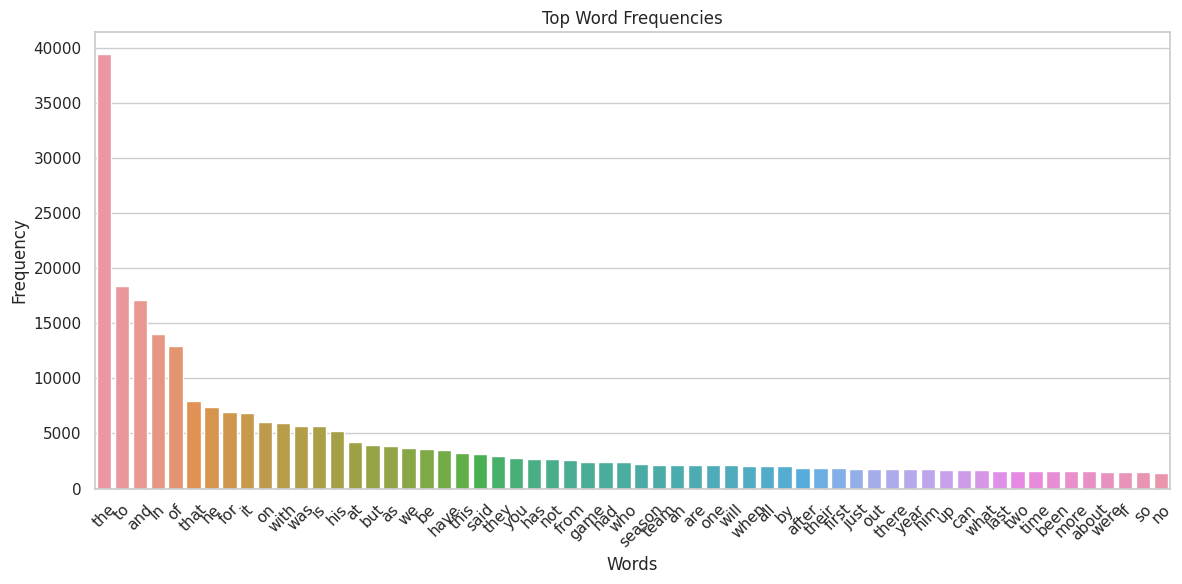

In [58]:
# Выбор топ N наиболее часто встречающихся слов
top_words = word_counts.sum().nlargest(60)

# Создание графика частот слов
plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.index, y=top_words.values)
plt.title('Top Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Проведем анализ текста, а именно:

**Частотный анализ слов**
Мы уже провели подсчет частот слов с помощью CountVectorizer. Можно проанализировать наиболее часто встречающиеся слова, наиболее редкие слова и создать облако слов для визуализации.

**Семантический анализ**
Провести анализ семантической близости между словами или предложениями с использованием моделей векторных представлений слов, таких как Word2Vec или FastText.

**Статистика предложений**
Можно проанализировать статистики предложений, такие как средняя длина предложений, самые короткие и самые длинные предложения.

**Анализ синтаксических структур**
Использование синтаксического анализа, например, с помощью библиотеки SpaCy, может позволить извлекать синтаксические связи между словами и проводить более глубокий анализ текстов.

**Статистика N-граммов**
Можно провести анализ N-граммов (последовательностей из N слов) для извлечения более сложных структур и выражений в тексте.

**Анализ временных рядов**
Если тексты имеют временные метки, можно провести анализ временных рядов для изучения изменения характеристик текстов с течением времени.

**Анализ тональности**
После разметки тональности(положительная, отрицательная, нейтральная),можно провести анализ распределения тональности в текстах, посчитать средние тональности и т.д.

In [59]:
# Часто встречающиеся слова
# Суммируем частоты слов и сортируем по убыванию
most_common_words = word_counts.sum().sort_values(ascending=False)
print("Most common words:")
print(most_common_words[:10])  # Вывод первых 100 наиболее часто встречающихся слов

Most common words:
the     39440
to      18420
and     17084
in      14015
of      12958
that     7944
he       7417
for      6934
it       6893
on       6053
dtype: int64


In [60]:
# Редко встречающиеся слова:
# Сортируем по возрастанию
least_common_words = word_counts.sum().sort_values(ascending=True)
print("Least common words:")
print(least_common_words[:10])  # Вывод первых 10 наименее редко встречающихся слов

Least common words:
add            79
figure         79
competitive    79
missing        79
check          79
moving         79
thomas         79
seventh        79
fall           79
putting        79
dtype: int64


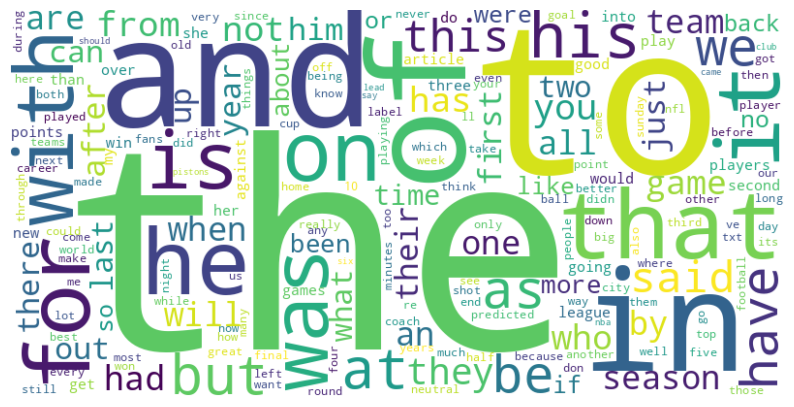

In [61]:
#Визуализация облака слов

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Проведем анализ длины текстов, предложений и разнообразия

In [62]:
# Путь к папке с текстовыми файлами
data_folder = '/content/articles'

# Получаем список имен файлов и сортируем их
file_names = sorted([f for f in os.listdir(data_folder) if f.endswith('.txt')])

# Список для хранения текстов статей
articles = []

# Загрузка текстов статей с автоматическим определением кодировки
for file_name in file_names:
    with open(os.path.join(data_folder, file_name), 'rb') as file:
        raw_data = file.read()
        detected_encoding = chardet.detect(raw_data)['encoding']
        article_text = raw_data.decode(detected_encoding)
        articles.append(article_text)

# Создание DataFrame для хранения данных
data = pd.DataFrame({'text': articles})

# Разбиваем тексты на предложения
data['sentences'] = data['text'].apply(lambda x: sent_tokenize(x))

# Разбиваем тексты на слова и удаляем стоп-слова
stop_words = set(stopwords.words('english'))
data['tokenized_text'] = data['text'].apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words])

# Анализ длины текстов
data['text_length'] = data['tokenized_text'].apply(len)
average_text_length = data['text_length'].mean()
median_text_length = data['text_length'].median()
std_text_length = data['text_length'].std()
print("Average text length:", average_text_length)
print("Median text length:", median_text_length)
print("Standard deviation of text length:", std_text_length)

# Анализ длины предложений
data['sentence_lengths'] = data['sentences'].apply(lambda x: [len(word_tokenize(sentence)) for sentence in x])
data['average_sentence_length'] = data['sentence_lengths'].apply(lambda x: sum(x) / len(x))
average_sentence_length = data['average_sentence_length'].mean()
median_sentence_length = data['average_sentence_length'].median()
std_sentence_length = data['average_sentence_length'].std()
print("Average sentence length:", average_sentence_length)
print("Median sentence length:", median_sentence_length)
print("Standard deviation of sentence length:", std_sentence_length)

# Анализ разнообразия слов
total_words = data['tokenized_text'].sum()
unique_words = set(total_words)
lexical_diversity = len(unique_words) / len(total_words)
print("Lexical diversity:", lexical_diversity)

Average text length: 486.35364635364635
Median text length: 451.0
Standard deviation of text length: 415.9497407249953
Average sentence length: 31.190997482444196
Median sentence length: 22.583333333333332
Standard deviation of sentence length: 252.4315666417594
Lexical diversity: 0.073586804699696


Интерпретация результатов:

Средняя длина текстов в корпусе составляет приблизительно 486 слов. Это может дать представление о средней "плотности" информации в каждой статье.

Медианная длина текстов составляет 451 слов. Это значение находится посередине, когда все тексты упорядочены по длине. Это может быть полезным для представления типичной длины статей в корпусе.

Стандартное отклонение равно примерно 415.95 слов. Это значение указывает на разброс в длине текстов. Большое стандартное отклонение может говорить о значительной вариативности длин текстов.

Средняя длина предложений в корпусе составляет около 31 слов. Это может дать представление о средней длине предложений в статьях.

Медианная длина предложений составляет примерно 22.58 слов. Это значение указывает на типичную длину предложений в статьях.

Стандартное отклонение равно около 252.43 слов. Это значение указывает на разброс в длине предложений. Большое стандартное отклонение может говорить о значительной вариативности длин предложений.

Коэффициент уникальных слов к общему числу слов в корпусе составляет приблизительно 0.074. Это означает, что примерно 7.4% всех слов в корпусе являются уникальными. Более высокое значение может указывать на более богатую лексическую разнообразность.

Общий вывод:
Ваш корпус статей имеет среднюю длину текстов и предложений, которая может варьироваться в широком диапазоне. Кроме того, уровень лексической разнообразности (уникальных слов) невысок, что может указывать на определенную степень повторения слов и выражений в текстах.

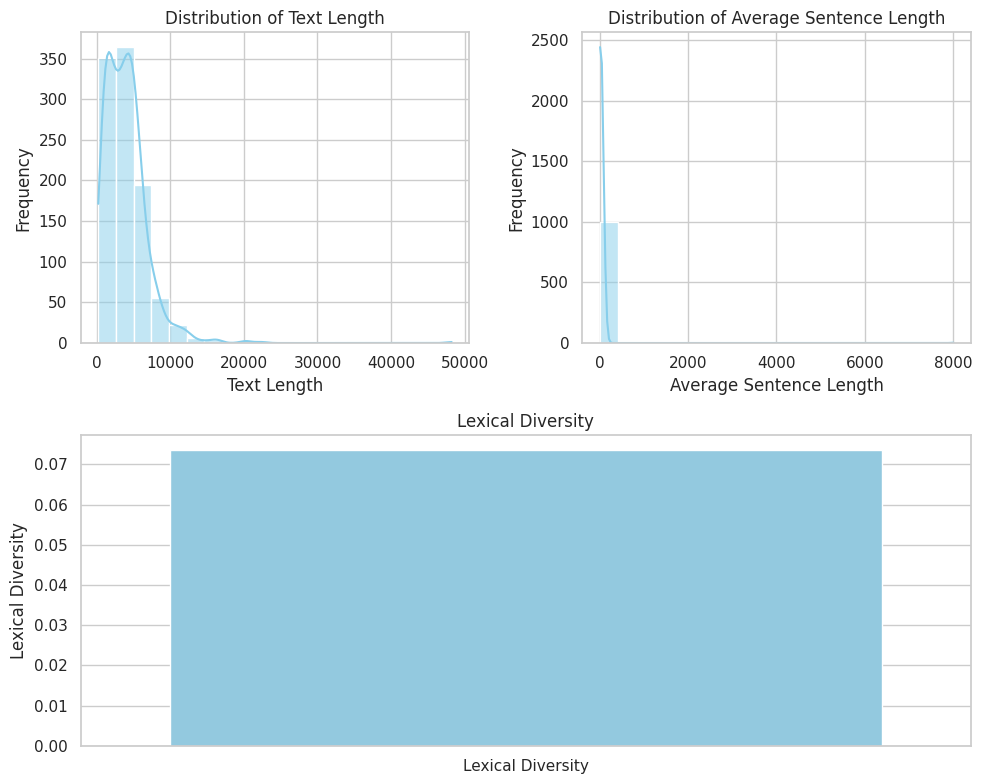

In [63]:
# Установить стиль Seaborn
sns.set(style='whitegrid')

# Создание графика
plt.figure(figsize=(10, 8))

# Визуализация результатов анализа длины текстов
plt.subplot(2, 2, 1)
sns.histplot(data['text'].apply(len), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Визуализация результатов анализа длины предложений
plt.subplot(2, 2, 2)
sns.histplot(data['average_sentence_length'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Sentence Length')
plt.xlabel('Average Sentence Length')
plt.ylabel('Frequency')

# Визуализация результатов анализа разнообразия слов
plt.subplot(2, 1, 2)
sns.barplot(x=['Lexical Diversity'], y=[lexical_diversity], color='skyblue')
plt.title('Lexical Diversity')
plt.ylabel('Lexical Diversity')

# Показать графики
plt.tight_layout()
plt.show()

In [64]:
#pip install spacy

In [65]:
# Загрузка модели SpaCy
nlp = spacy.load("en_core_web_sm")

# Путь к папке с текстовыми файлами
data_folder = '/content/articles'

# Получаем список имен файлов и сортируем их
file_names = sorted([f for f in os.listdir(data_folder) if f.endswith('.txt')])

# Берем только первые 10 файлов
file_names = file_names[:10]

# Проход по файлам и их содержимому
for file_name in file_names:
    with open(os.path.join(data_folder, file_name), 'rb') as file:
        raw_data = file.read()
        detected_encoding = chardet.detect(raw_data)['encoding']
        article_text = raw_data.decode(detected_encoding)

        # Проход по предложениям
        sentences = sent_tokenize(article_text)
        for sentence in sentences:
            doc = nlp(sentence)

            # Вывод синтаксических структур
            for token in doc:
                print(token.text, token.pos_, token.dep_)

            # Визуализация деревьев зависимостей
            displacy.render(doc, style="dep", jupyter=True)


Finalists NOUN nsubj
in ADP prep
the DET det
Apertura PROPN compound
play NOUN compound
- PUNCT punct
offs NOUN pobj
, PUNCT punct
Toluca PROPN nsubj
had AUX aux
drawn VERB ROOT
their PRON poss
first ADJ amod
two NUM nummod
Clausura PROPN compound
games NOUN dobj
but CCONJ cc
got VERB conj
off ADP prt
to ADP prep
a DET det
good ADJ amod
start NOUN pobj
when SCONJ advmod
Edgar PROPN compound
Benitez PROPN nsubj
put VERB advcl
them PRON dobj
ahead ADV advmod
in ADP prep
the DET det
16th ADJ amod
minute NOUN pobj
. PUNCT punct


Matias PROPN compound
Britos PROPN nsubj
levelled VERB ROOT
20 NUM nummod
minutes NOUN npadvmod
later ADV advmod
but CCONJ cc
Lucas PROPN compound
Silva PROPN nsubj
netted VERB conj
14 NUM nummod
minutes NOUN npadvmod
from ADP prep
the DET det
end NOUN pobj
to PART aux
ensure VERB advcl
the DET det
visitors NOUN nsubj
took VERB ccomp
all DET det
three NUM nummod
points NOUN dobj
. PUNCT punct


Franco PROPN compound
Arizala PROPN nsubj
scored VERB ROOT
13 NUM nummod
minutes NOUN npadvmod
from ADP prep
time NOUN pobj
to PART aux
ensure VERB advcl
Jaguares NOUN nsubj
claimed VERB ccomp
their PRON poss
first ADJ amod
point NOUN dobj
with ADP prep
a DET det
1 NUM nummod
- SYM punct
1 NUM prep
draw NOUN pobj
against ADP prep
Monterrey PROPN pobj
, PUNCT punct
who PRON nsubj
had AUX aux
opened VERB relcl
the DET det
scoring NOUN dobj
through ADP prep
Aldo PROPN compound
De PROPN compound
Nigris PROPN pobj
( PUNCT punct
14 NUM appos
) PUNCT punct
. PUNCT punct


Hosts NOUN compound
Jaguares NOUN nsubj
also ADV advmod
had VERB ROOT
Jorge PROPN compound
Rodriguez PROPN nsubj
sent VERB ccomp
off ADP prt
in ADP prep
the DET det
closing NOUN compound
moments NOUN pobj
. PUNCT punct


City NOUN compound
manager NOUN compound
Roberto PROPN compound
Mancini PROPN nsubj
has AUX aux
consistently ADV advmod
said VERB ROOT
his PRON poss
fellow ADJ amod
Italian PROPN nsubj
is AUX ccomp
not PART neg
for ADP prep
sale NOUN pobj
throughout ADP prep
this DET det
month NOUN poss
's PART case
transfer NOUN compound
window NOUN pobj
but CCONJ cc
that PRON nsubj
has AUX aux
not PART neg
quashed VERB conj
rumors NOUN dobj
linking VERB acl
him PRON dobj
with ADP prep
the DET det
San PROPN compound
Siro PROPN compound
giants NOUN pobj
. PUNCT punct


Milan PROPN nsubj
have AUX aux
made VERB ROOT
their PRON poss
liking NOUN ccomp
for ADP prep
the DET det
22 NUM nummod
- PUNCT punct
year NOUN npadvmod
- PUNCT punct
old ADJ amod
clear ADJ pobj
but CCONJ cc
have AUX aux
previously ADV advmod
baulked VERB conj
at ADP prep
City PROPN poss
's PART case
reported VERB amod
Â£28million NUM compound
valuation NOUN pobj
. PUNCT punct


Now ADV advmod
fresh ADJ amod
reports NOUN nsubj
have AUX aux
emerged VERB ROOT
claiming VERB xcomp
negotiations NOUN nsubj
between ADP prep
the DET det
clubs NOUN pobj
have AUX aux
begun VERB ccomp
but CCONJ cc
City PROPN poss
's PART case
public ADJ amod
message NOUN nsubj
on ADP prep
the DET det
matter NOUN pobj
has AUX aux
not PART neg
changed VERB conj
. PUNCT punct


First ADJ amod
- PUNCT punct
team NOUN compound
coach NOUN compound
David PROPN compound
Platt PROPN nsubj
said VERB ROOT
: PUNCT punct
" PUNCT punct
I PRON nsubj
saw VERB ccomp
that DET det
speculation NOUN dobj
( PUNCT punct
on ADP prep
Sunday PROPN pobj
) PUNCT punct
but CCONJ cc
I PRON nsubj
've AUX aux
not PART neg
heard VERB conj
anything PRON dobj
. PUNCT punct


" PUNCT punct
As ADV advmod
far ADV advmod
as SCONJ mark
we PRON nsubj
are AUX advcl
concerned VERB acomp
I PRON nsubj
think VERB ROOT
he PRON nsubj
is AUX ccomp
still ADV advmod
a DET det
Manchester PROPN compound
City PROPN compound
player NOUN attr
. PUNCT punct


I PRON nsubj
do AUX aux
n't PART neg
think VERB ROOT
there PRON expl
is VERB ccomp
anything PRON nsubj
is AUX aux
going VERB ccomp
to PART aux
happen VERB xcomp
. PUNCT punct
" PUNCT punct


Platt PROPN nsubj
was AUX aux
speaking VERB ROOT
on ADP prep
Mancini PROPN poss
's PART case
behalf NOUN pobj
at ADP prep
a DET det
press NOUN compound
conference NOUN pobj
to PART aux
preview VERB relcl
City PROPN poss
's PART case
Barclays PROPN compound
Premier PROPN compound
League PROPN compound
trip NOUN dobj
to ADP prep
QPR PROPN pobj
on ADP prep
Tuesday PROPN compound
night NOUN pobj
. PUNCT punct


Mancini PROPN nsubj
was AUX ROOT
equally ADV advmod
forthright ADJ acomp
on ADP prep
the DET det
Balotelli PROPN compound
subject NOUN pobj
when SCONJ advmod
asked VERB advcl
when SCONJ advmod
he PRON nsubj
last VERB advmod
met VERB ccomp
the DET det
press NOUN dobj
last ADJ amod
week NOUN npadvmod
. PUNCT punct


Mancini PROPN nsubj
said VERB ROOT
: PUNCT punct
" PUNCT punct
No INTJ intj
, PUNCT punct
it PRON nsubj
is AUX ccomp
not PART neg
true ADJ acomp
, PUNCT punct
Mario PROPN nsubj
stays VERB ccomp
here ADV advmod
. PUNCT punct


We PRON nsubj
did AUX aux
n't PART neg
have VERB ROOT
any DET det
requests NOUN dobj
about ADP prep
Mario PROPN pobj
or CCONJ cc
other ADJ amod
players NOUN conj
. PUNCT punct
" PUNCT punct


Balotelli PROPN nsubjpass
has AUX aux
been AUX auxpass
involved VERB ROOT
in ADP prep
a DET det
number NOUN pobj
of ADP prep
high ADJ amod
- PUNCT punct
profile NOUN compound
controversies NOUN pobj
on ADP prep
and CCONJ cc
off ADP conj
the DET det
field NOUN pobj
during ADP prep
his PRON poss
time NOUN pobj
at ADP prep
City PROPN pobj
, PUNCT punct
including VERB prep
a DET det
training NOUN compound
- PUNCT punct
ground NOUN compound
bust NOUN compound
- PUNCT punct
up NOUN pobj
with ADP prep
Mancini PROPN pobj
this DET det
month NOUN npadvmod
. PUNCT punct


But CCONJ cc
Mancini PROPN nsubj
said VERB ROOT
he PRON nsubj
remains VERB ccomp
part NOUN attr
of ADP prep
his PRON poss
long ADJ amod
- PUNCT punct
term NOUN compound
plans NOUN pobj
. PUNCT punct


He PRON nsubj
said VERB ROOT
: PUNCT punct
" PUNCT punct
Yes INTJ intj
, PUNCT punct
Mario PROPN nsubj
has VERB ccomp
another DET det
three NUM nummod
years NOUN dobj
on ADP prep
his PRON poss
contract NOUN pobj
. PUNCT punct
" PUNCT punct


Platt PROPN nsubj
claims VERB ROOT
that SCONJ mark
situation NOUN nsubj
has AUX aux
not PART neg
changed VERB ccomp
. PUNCT punct


" PUNCT punct
I PRON nsubj
can AUX aux
only ADV advmod
go VERB ROOT
off ADP prt
what PRON dobj
you PRON nsubj
know VERB ccomp
and CCONJ cc
I PRON nsubj
have AUX aux
seen VERB conj
. PUNCT punct


I PRON nsubj
know VERB ROOT
exactly ADV advmod
the DET det
same ADJ dobj
as ADP prep
you PRON pobj
, PUNCT punct
which PRON nsubj
is AUX relcl
speculation NOUN attr
. PUNCT punct


It PRON nsubj
's AUX ROOT
a DET det
shame NOUN attr
Robbie PROPN poss
's PART case
not PART neg
here ADV advmod
. PUNCT punct


He PRON nsubj
might AUX aux
know VERB ROOT
more ADJ dobj
than ADP prep
me PRON pobj
. PUNCT punct
" PUNCT punct


In ADP prep
terms NOUN pobj
of ADP prep
fitness NOUN pobj
, PUNCT punct
Balotelli PROPN nsubj
missed VERB ROOT
Saturday PROPN poss
's PART case
FA PROPN nmod
Cup PROPN nmod
fourth ADJ amod
- PUNCT punct
round NOUN compound
tie NOUN dobj
at ADP prep
Stoke PROPN pobj
after ADP prep
illness NOUN pobj
but CCONJ cc
he PRON nsubj
is AUX conj
in ADP prep
contention NOUN pobj
for ADP prep
the DET det
game NOUN pobj
at ADP prep
Loftus PROPN compound
Road PROPN pobj
. PUNCT punct


Captain PROPN compound
Vincent PROPN compound
Kompany PROPN nsubj
will AUX aux
be AUX aux
missing VERB ROOT
after ADP prep
straining VERB pcomp
his PRON poss
calf NOUN dobj
at ADP prep
the DET det
Britannia PROPN compound
Stadium PROPN pobj
and CCONJ cc
the DET det
Belgian PROPN nsubj
will AUX aux
also ADV advmod
be AUX conj
doubtful ADJ acomp
for ADP prep
Sunday PROPN poss
's PART case
clash NOUN pobj
with ADP prep
Liverpool PROPN pobj
. PUNCT punct


Platt PROPN nsubj
said VERB ROOT
: PUNCT punct
" PUNCT punct
It PRON nsubj
could AUX aux
be AUX ccomp
a DET det
fortnight NOUN attr
, PUNCT punct
it PRON nsubj
could AUX aux
be AUX ccomp
three NUM nummod
weeks NOUN attr
. PUNCT punct


My PRON poss
experience NOUN nsubj
of ADP prep
calf NOUN pobj
strains NOUN pobj
would AUX aux
be AUX ROOT
no DET det
chance NOUN attr
for ADP prep
Tuesday PROPN pobj
, PUNCT punct
Liverpool PROPN nsubj
a DET det
big ADJ amod
doubt NOUN attr
with ADP prep
an DET det
outside ADJ amod
chance NOUN pobj
, PUNCT punct
but CCONJ cc
that PRON nsubj
would AUX aux
depend VERB conj
on ADP prep
the DET det
gravity NOUN pobj
of ADP prep
it PRON pobj
. PUNCT punct


" PUNCT punct
In ADP prep
all DET det
honesty NOUN pobj
you PRON nsubj
're AUX aux
probably ADV advmod
looking VERB ROOT
at ADP prep
the DET det
game NOUN pobj
after ADP prep
that PRON nsubj
being AUX pcomp
a DET det
potential ADJ amod
realistic ADJ amod
target NOUN attr
. PUNCT punct
" PUNCT punct


Kompany PROPN poss
's PART case
absence NOUN nsubj
increases VERB ROOT
City PROPN poss
's PART case
defensive ADJ amod
problems NOUN dobj
with ADP prep
Kolo PROPN compound
Toure PROPN pobj
on ADP prep
international ADJ amod
duty NOUN pobj
and CCONJ cc
Matija PROPN compound
Nastasic PROPN conj
also ADV advmod
doubtful ADJ ccomp
with ADP prep
a DET det
minor ADJ amod
knee NOUN compound
injury NOUN pobj
. PUNCT punct


When SCONJ advmod
asked VERB advcl
if SCONJ mark
Nastasic PROPN nsubj
was AUX ccomp
available ADJ acomp
, PUNCT punct
Platt PROPN nsubj
said VERB ROOT
: PUNCT punct
" PUNCT punct
Maybe ADV advmod
, PUNCT punct
but CCONJ cc
he PRON nsubj
will AUX aux
have VERB conj
to PART aux
train VERB xcomp
( PUNCT punct
on ADP prep
Monday PROPN pobj
) PUNCT punct
. PUNCT punct
" PUNCT punct


Doubles VERB nsubj
duo NOUN compound
Heather PROPN compound
Watson PROPN dobj
and CCONJ cc
Jocelyn PROPN compound
Ray PROPN conj
saved VERB ROOT
Great PROPN compound
Britain PROPN poss
's PART case
blushes NOUN dobj
in ADP prep
the DET det
Fed PROPN compound
Cup PROPN pobj
in ADP prep
Israel PROPN pobj
with ADP prep
a DET det
dramatic ADJ amod
win NOUN pobj
over ADP prep
Denmark PROPN pobj
. PUNCT punct


The DET det
pair NOUN nsubj
secured VERB ccomp
Britain PROPN poss
's PART case
place NOUN dobj
in ADP prep
Europe PROPN nmod
/ SYM punct
Africa PROPN compound
Group PROPN pobj
I PRON nsubj
after SCONJ mark
Anne PROPN compound
Keothavong PROPN nsubj
lost VERB ROOT
6 NUM nummod
- SYM punct
0 NUM prep
6 NUM dobj
- SYM punct
2 NUM prep
to ADP prep
world NOUN compound
number NOUN compound
one NUM nummod
Caroline PROPN compound
Wozniacki PROPN npadvmod
. PUNCT punct


Heather PROPN compound
Watson PROPN nsubj
opened VERB ROOT
the DET det
tie NOUN dobj
in ADP prep
style NOUN pobj
when SCONJ advmod
she PRON nsubj
overcame VERB advcl
Denmark PROPN poss
's PART case
Karen PROPN compound
Barbat PROPN dobj
6 NUM nummod
- SYM punct
0 NUM prep
6 NUM appos
- SYM punct
1 NUM prep
, PUNCT punct
but CCONJ cc
it PRON nsubj
was AUX conj
not PART neg
enough ADJ acomp
for SCONJ mark
either DET det
nation NOUN nsubj
to PART aux
secure VERB advcl
a DET det
safe ADJ amod
passage NOUN dobj
in ADP prep
the DET det
group NOUN pobj
so SCONJ mark
it PRON nsubj
came VERB advcl
down ADP prt
to ADP prep
the DET det
doubles NOUN compound
decider NOUN pobj
. PUNCT punct


Denmark PROPN nsubj
fielded VERB ROOT
Wozniacki PROPN dobj
and CCONJ cc
Mai PROPN compound
Grage PROPN conj
with ADP prep
the DET det
combination NOUN pobj
working VERB acl
early ADV advmod
as SCONJ mark
the DET det
Danes PROPN nsubj
took VERB advcl
the DET det
first ADJ amod
set VERB dobj
7 NUM npadvmod
- SYM punct
5 NUM prep
. PUNCT punct


Watson PROPN nsubj
and CCONJ cc
Ray PROPN conj
rallied VERB ROOT
, PUNCT punct
however ADV advmod
, PUNCT punct
winning VERB advcl
the DET det
final ADJ amod
two NUM nummod
sets NOUN dobj
7 NUM npadvmod
- SYM punct
57 NUM npadvmod
- SYM punct
5 NUM prep
. PUNCT punct


With ADP prep
safe ADJ amod
passage NOUN nsubj
now ADV advmod
assured VERB ROOT
Britain PROPN dobj
rest NOUN ccomp
easy ADJ advmod
when SCONJ advmod
they PRON nsubj
take VERB advcl
on ADP prt
Croatia PROPN dobj
on ADP prep
Saturday PROPN pobj
to PART aux
determine VERB advcl
the DET det
final ADJ amod
seeding NOUN dobj
for ADP prep
the DET det
15 NUM nummod
- PUNCT punct
team NOUN compound
event NOUN pobj
. PUNCT punct


Former ADJ amod
England PROPN compound
manager NOUN compound
Steve PROPN compound
McClaren PROPN nsubjpass
has AUX aux
been AUX auxpass
sacked VERB ROOT
by ADP agent
German ADJ amod
giants NOUN compound
Wolfsburg PROPN pobj
, PUNCT punct
ending VERB advcl
a DET det
disappointing ADJ amod
eight NUM nummod
- PUNCT punct
month NOUN compound
reign NOUN dobj
in ADP prep
charge NOUN pobj
of ADP prep
the DET det
former ADJ amod
Bundesliga PROPN compound
champions NOUN pobj
. PUNCT punct


" PUNCT punct
VfL PROPN nsubj
have AUX aux
parted VERB ccomp
ways NOUN dobj
with ADP prep
Steve PROPN compound
McClaren PROPN pobj
, PUNCT punct
" PUNCT punct
the DET det
club NOUN nsubj
said VERB ROOT
in ADP prep
a DET det
statement NOUN pobj
. PUNCT punct


" PUNCT punct
Pierre PROPN compound
Littbarski PROPN nsubj
is AUX aux
taking VERB ROOT
over ADP prt
. PUNCT punct
" PUNCT punct


" PUNCT punct
We PRON nsubjpass
were AUX auxpass
not PART neg
convinced VERB ccomp
any PRON advmod
more ADV advmod
that PRON mark
we PRON nsubj
could AUX aux
work VERB relcl
with ADP prep
Steve PROPN compound
McClaren PROPN pobj
in ADP prep
a DET det
solid ADJ amod
way NOUN pobj
until ADP prep
the DET det
end NOUN pobj
of ADP prep
the DET det
season NOUN pobj
, PUNCT punct
" PUNCT punct
Wolfsburg PROPN nmod
general ADJ amod
manager NOUN compound
Dieter PROPN compound
Hoeness PROPN nsubj
said VERB ROOT
. PUNCT punct


McClaren PROPN nsubj
joined VERB ROOT
the DET det
Volkswagen PROPN npadvmod
- PUNCT punct
backed VERB amod
team NOUN dobj
in ADP prep
the DET det
summer NOUN pobj
, PUNCT punct
weeks NOUN npadvmod
after ADP prep
leading VERB amod
Dutch ADJ amod
minnows NOUN pobj
FC PROPN compound
Twente PROPN appos
to ADP prep
a DET det
surprise NOUN amod
Eredivisie PROPN compound
title NOUN pobj
. PUNCT punct


He PRON nsubj
has AUX aux
only ADV advmod
won VERB ROOT
five NUM nummod
of ADP quantmod
21 NUM nummod
Bundesliga PROPN compound
matches NOUN dobj
and CCONJ cc
a DET det
1 NUM nummod
- SYM punct
0 NUM prep
defeat NOUN conj
at ADP prep
Hannover PROPN pobj
appears VERB conj
to PART aux
have AUX aux
been AUX xcomp
the DET det
last ADJ amod
straw NOUN attr
, PUNCT punct
coming VERB advcl
four NUM nummod
games NOUN dobj
after ADP prep
a DET det
vote NOUN pobj
of ADP prep
confidence NOUN pobj
for ADP prep
the DET det
former ADJ amod
Middlesbrough PROPN compound
manager NOUN pobj
. PUNCT punct


The DET det
club NOUN nsubj
lies VERB ROOT
12th NOUN dobj
in ADP prep
the DET det
18 NUM nummod
- PUNCT punct
team NOUN compound
Bundesliga PROPN pobj
, PUNCT punct
one NUM nummod
point NOUN npadvmod
above ADP prep
the DET det
relegation NOUN compound
play NOUN amod
- PUNCT punct
off ADP prt
places NOUN pobj
. PUNCT punct


The DET det
2009 NUM nummod
champions NOUN poss
' PART case
latest ADJ amod
disappointment NOUN nsubj
came VERB ROOT
after ADP prep
Brazil PROPN compound
midfielder NOUN compound
Diego PROPN compound
defied ADJ amod
team NOUN compound
orders NOUN pobj
by ADP prep
taking VERB pcomp
a DET det
penalty NOUN dobj
, PUNCT punct
which PRON dobj
he PRON nsubj
subsequently ADV advmod
missed VERB relcl
. PUNCT punct


The DET det
drama NOUN nsubj
added VERB ROOT
to ADP prep
the DET det
belief NOUN pobj
that SCONJ mark
McClaren PROPN nsubj
works VERB acl
better ADV advmod
with ADP prep
younger ADJ amod
, PUNCT punct
lesser ADV advmod
- PUNCT punct
known VERB amod
players NOUN pobj
and CCONJ cc
that SCONJ mark
he PRON nsubj
struggles VERB conj
to PART aux
man NOUN npadvmod
- PUNCT punct
manage VERB xcomp
top ADJ amod
internationals NOUN dobj
. PUNCT punct


In ADP prep
addition NOUN pobj
to ADP prep
his PRON poss
unprecedented ADJ amod
success NOUN pobj
with ADP prep
Twente PROPN pobj
, PUNCT punct
McClaren PROPN nsubj
won VERB ROOT
the DET det
League PROPN compound
Cup PROPN dobj
with ADP prep
Middlesbrough PROPN pobj
, PUNCT punct
who PRON dobj
he PRON nsubj
then ADV advmod
took VERB relcl
to ADP prep
the DET det
UEFA PROPN compound
Cup PROPN compound
final NOUN pobj
, PUNCT punct
where SCONJ advmod
they PRON nsubjpass
were AUX auxpass
beaten VERB relcl
by ADP agent
Sevilla PROPN pobj
. PUNCT punct


But CCONJ cc
afterwards ADV advmod
he PRON nsubj
struggled VERB ROOT
as ADP prep
England PROPN compound
manager NOUN pobj
, PUNCT punct
failing VERB advcl
to PART aux
qualify VERB xcomp
for ADP prep
Euro PROPN pobj
2008 NUM nummod
and CCONJ cc
replaced VERB conj
by ADP agent
Fabio PROPN compound
Capello PROPN pobj
soon ADV advmod
afterwards ADV advmod
. PUNCT punct


McClaren PROPN nsubj
kept VERB ROOT
his PRON poss
job NOUN dobj
at ADP prep
Wolfsburg PROPN pobj
in ADP prep
January PROPN pobj
, PUNCT punct
despite SCONJ prep
coming VERB pcomp
under ADP prep
mounting VERB amod
pressure NOUN pobj
for ADP prep
poor ADJ amod
results NOUN pobj
, PUNCT punct
with ADP prep
fans NOUN nsubj
initially ADV advmod
blaming VERB pcomp
the DET det
board NOUN dobj
for ADP prep
not PART neg
adding VERB pcomp
enough ADJ amod
top ADJ amod
players NOUN dobj
to ADP prep
the DET det
squad NOUN pobj
in ADP prep
the DET det
summer NOUN pobj
. PUNCT punct


Recent ADJ amod
weeks NOUN npadvmod
, PUNCT punct
however ADV advmod
, PUNCT punct
saw VERB ROOT
fans NOUN nsubj
protest VERB ccomp
against ADP prep
McClaren PROPN pobj
, PUNCT punct
with ADP prep
the DET det
poor ADJ amod
run NOUN nsubj
continuing VERB pcomp
despite SCONJ prep
January PROPN compound
signings VERB pobj
Patrick PROPN compound
Helmes PROPN nsubj
, PUNCT punct
Tuncay PROPN conj
, PUNCT punct
Koo PROPN compound
Ja PROPN compound
- PUNCT punct
cheol PROPN conj
and CCONJ cc
Yohandry PROPN compound
Orozco PROPN conj
compensating VERB ccomp
for ADP prep
the DET det
sale NOUN pobj
of ADP prep
Edin PROPN compound
Dzeko PROPN pobj
to ADP prep
Manchester PROPN compound
City PROPN pobj
. PUNCT punct


Jarmila PROPN compound
Groth PROPN nsubj
marked VERB ROOT
her PRON poss
first ADJ amod
Fed PROPN compound
Cup PROPN compound
appearance NOUN dobj
for ADP prep
Australia PROPN pobj
with ADP prep
a DET det
shock NOUN compound
win NOUN pobj
against ADP prep
French ADJ amod
Open ADJ amod
champion NOUN compound
Francesca PROPN compound
Schiavone PROPN pobj
as ADP prep
holders NOUN pobj
Italy PROPN nsubj
shared VERB relcl
the DET det
opening NOUN compound
singles NOUN dobj
in ADP prep
their PRON poss
first ADJ amod
round ADJ amod
tie NOUN pobj
in ADP prep
Hobart PROPN pobj
. PUNCT punct


Groth PROPN nsubj
, PUNCT punct
who PRON nsubj
represented VERB relcl
Slovakia PROPN dobj
before ADP prep
taking VERB pcomp
Australian ADJ amod
citizenship NOUN dobj
in ADP prep
2009 NUM pobj
by ADP prep
marriage NOUN pobj
, PUNCT punct
beat VERB ROOT
the DET det
world NOUN compound
number NOUN dobj
four NUM nummod
6 NUM npadvmod
- SYM punct
7 NUM prep
6 NUM appos
- SYM punct
3 NUM prep
6 NUM appos
- SYM punct
3 NUM prep
to PART aux
give VERB advcl
Australia PROPN dative
a DET det
great ADJ amod
start NOUN dobj
before SCONJ mark
Samantha PROPN compound
Stosur PROPN nsubj
, PUNCT punct
runner NOUN compound
- PUNCT punct
up NOUN appos
to ADP prep
Schiavone PROPN pobj
in ADP prep
Paris PROPN pobj
last ADJ amod
year NOUN npadvmod
, PUNCT punct
lost VERB advcl
a DET det
titanic ADJ amod
struggle NOUN dobj
with ADP prep
Flavia PROPN compound
Pennetta PROPN pobj
to PART aux
leave VERB advcl
the DET det
tie NOUN dobj
poised VERB acl
at ADP prep
1 NUM pobj
- SYM punct
1 NUM prep
. PUNCT punct


The DET det
reverse NOUN amod
singles VERB nsubj
and CCONJ cc
doubles VERB conj
take VERB ROOT
place NOUN dobj
on ADP prep
Sunday PROPN pobj
. PUNCT punct


" PUNCT punct
It PRON nsubj
is AUX ccomp
one NUM attr
of ADP prep
the DET det
great ADJ amod
wins NOUN pobj
for ADP prep
me PRON pobj
and CCONJ cc
I PRON nsubj
am AUX conj
happy ADJ acomp
and CCONJ cc
excited ADJ conj
, PUNCT punct
" PUNCT punct
the DET det
23 NUM nummod
- PUNCT punct
year NOUN npadvmod
- PUNCT punct
old ADJ amod
Groth PROPN nsubj
, PUNCT punct
who PRON nsubj
married VERB relcl
Australian ADJ amod
player NOUN compound
Samuel PROPN compound
Groth PROPN dobj
, PUNCT punct
said VERB ROOT
on ADP prep
the DET det
ITF PROPN poss
's PART case
website NOUN pobj
. PUNCT punct


Surprisingly ADV advmod
, PUNCT punct
the DET det
experienced ADJ amod
Schiavone PROPN nsubj
said VERB ROOT
she PRON nsubjpass
had AUX aux
been AUX auxpass
taken VERB ccomp
by ADP agent
surprise NOUN pobj
despite SCONJ prep
Groth PROPN nsubjpass
being AUX auxpass
ranked VERB pcomp
31st NOUN npadvmod
in ADP prep
the DET det
world NOUN pobj
. PUNCT punct


" PUNCT punct
My PRON poss
level NOUN nsubj
was AUX ccomp
not PART neg
so ADV advmod
high ADJ acomp
and CCONJ cc
she PRON nsubj
got VERB conj
right ADJ amod
shots NOUN dobj
and CCONJ cc
played VERB conj
good NOUN dobj
, PUNCT punct
" PUNCT punct
the DET det
30 NUM nummod
- PUNCT punct
year NOUN npadvmod
- PUNCT punct
old ADJ amod
Italian ADJ nsubj
said VERB ROOT
. PUNCT punct


" PUNCT punct
I PRON nsubj
'd AUX aux
never ADV neg
seen VERB ROOT
her PRON poss
play NOUN dobj
and CCONJ cc
I PRON nsubj
was AUX conj
passive ADJ acomp
a DET det
little ADJ amod
bit NOUN npadvmod
and CCONJ cc
she PRON nsubj
won VERB conj
. PUNCT punct
" PUNCT punct


Groth PROPN poss
's PART case
victory NOUN nsubj
meant VERB ROOT
Italy PROPN nsubj
were AUX aux
still ADV advmod
searching VERB ccomp
for ADP prep
their PRON poss
first ADJ amod
ever ADV advmod
point NOUN pobj
against ADP prep
Australia PROPN pobj
in ADP prep
Fed PROPN compound
Cup PROPN pobj
play NOUN dobj
when SCONJ advmod
Pennetta PROPN nsubj
walked VERB advcl
on ADP prep
court NOUN pobj
to PART aux
face VERB advcl
world NOUN compound
number NOUN dobj
five NUM nummod
Stosur PROPN npadvmod
- PUNCT punct
a DET det
sequence NOUN appos
of ADP prep
16 NUM nummod
consecutive ADJ amod
defeats NOUN pobj
. PUNCT punct


Pennetta PROPN nsubj
ended VERB ROOT
that PRON nsubj
run VERB ccomp
with ADP prep
a DET det
7 NUM nummod
- SYM punct
6 NUM prep
6 NUM nummod
- SYM punct
7 NUM nummod
6 NUM nummod
- SYM punct
4 NUM prep
victory NOUN pobj
in ADP prep
a DET det
match NOUN pobj
interrupted VERB acl
for ADP prep
an DET det
hour NOUN pobj
by ADP prep
rain NOUN pobj
. PUNCT punct


Stosur PROPN nsubj
served VERB ROOT
for ADP prep
the DET det
first ADJ amod
set NOUN pobj
at ADP prep
5 NUM pobj
- SYM punct
3 NUM prep
but CCONJ cc
allowed VERB conj
Pennetta PROPN nsubj
back ADV ccomp
to PART aux
take VERB advcl
the DET det
opener NOUN dobj
and CCONJ cc
although SCONJ mark
she PRON nsubj
levelled VERB advcl
the DET det
match NOUN dobj
by ADP prep
snatching VERB pcomp
the DET det
second ADJ amod
set NOUN compound
tiebreak NOUN dobj
she PRON nsubj
was AUX relcl
unable ADJ acomp
to PART aux
post VERB xcomp
a DET det
first ADJ amod
career NOUN compound
victory NOUN dobj
against ADP prep
her PRON poss
Italian ADJ amod
opponent NOUN pobj
. PUNCT punct


" PUNCT punct
Any DET det
time NOUN npadvmod
you PRON nsubj
serve VERB relcl
for ADP prep
the DET det
first ADJ amod
two NUM nummod
sets NOUN pobj
and CCONJ cc
lose VERB conj
, PUNCT punct
it PRON nsubj
is AUX ccomp
disappointing ADJ acomp
, PUNCT punct
" PUNCT punct
said VERB ROOT
Stosur PROPN nsubj
, PUNCT punct
who PRON nsubj
will AUX aux
face VERB relcl
her PRON poss
Roland PROPN compound
Garros PROPN compound
nemesis NOUN dobj
in ADP prep
Sunday PROPN poss
's PART case
first ADJ amod
singles NOUN pobj
. PUNCT punct


The DET det
winner NOUN nsubj
of ADP prep
the DET det
tie NOUN pobj
in ADP prep
Hobart PROPN pobj
will AUX aux
face VERB ROOT
the DET det
winner NOUN dobj
between ADP prep
Russia PROPN pobj
and CCONJ cc
France PROPN conj
. PUNCT punct


Russia PROPN poss
's PART case
big ADJ amod
- PUNCT punct
name NOUN compound
players NOUN nsubj
failed VERB ROOT
to PART aux
fire VERB xcomp
as SCONJ mark
they PRON nsubj
slipped VERB advcl
to ADP prep
a DET det
2 NUM nummod
- SYM punct
0 NUM prep
deficit NOUN pobj
against ADP prep
France PROPN pobj
in ADP prep
Moscow PROPN pobj
. PUNCT punct


Alize PROPN compound
Cornet PROPN nsubj
overcame VERB ROOT
an DET det
ankle NOUN compound
injury NOUN dobj
to PART aux
produce VERB xcomp
a DET det
spirited ADJ amod
fightback NOUN dobj
and CCONJ cc
beat VERB conj
Svetlana PROPN compound
Kunzetsova PROPN dobj
3 NUM nummod
- SYM punct
6 NUM nummod
6 NUM npadvmod
- SYM punct
3 NUM prep
6 NUM npadvmod
- SYM punct
4 NUM prep
, PUNCT punct
to PART aux
give VERB advcl
the DET det
visitors NOUN dative
the DET det
early ADJ amod
lead NOUN dobj
before SCONJ mark
Virginie PROPN compound
Razzano PROPN nsubj
stunned VERB advcl
Maria PROPN compound
Sharapova PROPN dobj
, PUNCT punct
playing VERB advcl
her PRON poss
first ADJ amod
Fed PROPN compound
Cup PROPN compound
match NOUN dobj
since SCONJ prep
2007 NUM pobj
, PUNCT punct
with ADP prep
a DET det
6 NUM nummod
- SYM punct
2 NUM nummod
6 NUM nummod
- SYM punct
3 NUM prep
win NOUN pobj
. PUNCT punct


Belgium PROPN nsubj
moved VERB ROOT
a DET det
step NOUN npadvmod
closer ADV advmod
to ADP prep
a DET det
place NOUN pobj
in ADP prep
the DET det
semi NOUN pobj
- NOUN pobj
finals NOUN pobj
as SCONJ mark
they PRON nsubj
took VERB advcl
a DET det
2 NUM nummod
- SYM punct
0 NUM prep
lead NOUN dobj
over ADP prep
the DET det
USA PROPN pobj
, PUNCT punct
beaten VERB amod
finalists NOUN appos
in ADP prep
the DET det
past ADJ amod
two NUM nummod
years NOUN pobj
, PUNCT punct
in ADP prep
Antwerp PROPN pobj
. PUNCT punct


Yanina PROPN compound
Wickmayer PROPN nsubj
got VERB ROOT
the DET det
hosts NOUN dobj
off ADP prt
to ADP prep
the DET det
perfect ADJ amod
start NOUN pobj
with ADP prep
a DET det
6 NUM nummod
- SYM punct
1 NUM prep
7 NUM meta
- PUNCT punct
6(6 NOUN prep
) PUNCT punct
win VERB pobj
over ADP prep
Bethanie PROPN compound
Mattek PROPN compound
- PUNCT punct
Sands PROPN pobj
before SCONJ mark
world NOUN compound
number NOUN nmod
two NUM nummod
Kim PROPN compound
Clijsters PROPN nsubj
extended VERB advcl
their PRON poss
lead NOUN dobj
with ADP prep
a DET det
6 NUM nummod
- SYM punct
0 NUM prep
6 NUM nummod
- SYM punct
4 NUM prep
drubbing NOUN pobj
of ADP prep
youngster NOUN compound
Melanie PROPN compound
Oudin PROPN pobj
. PUNCT punct


The DET det
Czech PROPN compound
Republic PROPN nsubj
are AUX ROOT
also ADV advmod
within ADP prep
striking ADJ amod
distance NOUN pobj
of ADP prep
the DET det
last ADJ amod
four NUM pobj
as SCONJ mark
they PRON nsubj
took VERB advcl
a DET det
2 NUM nummod
- SYM punct
0 NUM prep
lead NOUN dobj
over ADP prep
Slovakia PROPN pobj
in ADP prep
Bratislava PROPN pobj
. PUNCT punct


Lucie PROPN compound
Safarova PROPN nsubjpass
was AUX auxpass
made VERB ccomp
to PART aux
work VERB advcl
hard ADV advmod
, PUNCT punct
in ADP prep
the DET det
first ADJ amod
set NOUN pobj
at ADP advmod
least ADJ advmod
, PUNCT punct
for ADP prep
her PRON poss
7 NUM nummod
- SYM punct
5 NUM nummod
6 NUM nummod
- SYM punct
1 NUM prep
win NOUN pobj
over ADP prep
Daniel PROPN compound
Hantuchova PROPN pobj
before ADP prep
in ADP nmod
- PUNCT punct
form NOUN pobj
Petra PROPN compound
Kvitova PROPN pobj
, PUNCT punct
an DET det
Australian ADJ amod
Open ADJ amod
quarter NOUN compound
- PUNCT punct
finalist NOUN appos
last ADJ amod
month NOUN npadvmod
, PUNCT punct
beat VERB ROOT
Dominika PROPN compound
Cibulkova PROPN nsubj
6 NUM npadvmod
- SYM punct
2 NUM prep
6 NUM npadvmod
- SYM punct
3 NUM prep
. PUNCT punct


Reuters NOUN ROOT


Basketball NOUN compound
legend NOUN compound
Julius PROPN nmod
" PUNCT punct
Dr. PROPN compound
J PROPN nmod
" PUNCT punct
Erving PROPN nsubj
was AUX aux
facing VERB ROOT
legal ADJ amod
action NOUN dobj
Saturday PROPN npadvmod
for ADP prep
allegedly ADV advmod
cheating VERB pcomp
a DET det
wealthy ADJ amod
Manhattan PROPN compound
woman NOUN dobj
out ADP prep
of ADP prep
more ADJ amod
than ADP quantmod
$ SYM quantmod
420,000 NUM pobj
in ADP prep
a DET det
deal NOUN pobj
with ADP prep
crooked ADJ amod
money NOUN compound
manager NOUN compound
Kenneth PROPN compound
Starr PROPN pobj
. PUNCT punct


Mary PROPN compound
Gilbert PROPN poss
's PART case
suit NOUN nsubj
-- PUNCT punct
which PRON nsubj
charges VERB relcl
Erving VERB xcomp
with ADP prep
breach NOUN pobj
of ADP prep
contract NOUN pobj
and CCONJ cc
fiduciary ADJ amod
duty NOUN conj
-- PUNCT punct
seeks VERB ROOT
payment NOUN dobj
of ADP prep
all DET det
her PRON poss
lost VERB amod
profits NOUN pobj
, PUNCT punct
along ADP prep
with ADP prep
" PUNCT punct
prejudgment NOUN compound
interest NOUN pobj
" PUNCT punct
and CCONJ cc
punitive ADJ amod
damages NOUN conj
. PUNCT punct


Gilbert PROPN nsubj
, PUNCT punct
71 NUM appos
, PUNCT punct
said VERB ROOT
she PRON nsubj
met VERB ccomp
the DET det
Hall PROPN dobj
of ADP prep
Fame PROPN compound
star NOUN pobj
in ADP prep
1990 NUM pobj
through ADP prep
Starr PROPN pobj
, PUNCT punct
who PRON nsubj
hooked VERB relcl
her PRON dobj
while SCONJ mark
amassing VERB advcl
a DET det
roster NOUN dobj
of ADP prep
clients NOUN pobj
that PRON nsubj
included VERB relcl
film NOUN compound
stars NOUN compound
Uma PROPN compound
Thurman PROPN dobj
, PUNCT punct
Sylvester PROPN compound
Stallone PROPN conj
and CCONJ cc
director NOUN compound
Martin PROPN compound
Scorsese PROPN conj
. PUNCT punct


Gilbert PROPN nsubj
claims VERB ROOT
Erving PROPN dobj
, PUNCT punct
60 NUM appos
, PUNCT punct
and CCONJ cc
Starr PROPN nsubj
convinced VERB conj
her PRON dobj
to PART aux
invest VERB xcomp
in ADP prep
a DET det
" PUNCT punct
lucrative ADJ amod
" PUNCT punct
limited ADJ amod
partnership NOUN pobj
called VERB acl
Commonwealth PROPN compound
Investors PROPN oprd
, PUNCT punct
in ADP prep
which PRON pobj
the DET det
formerly ADV advmod
high ADV advmod
- PUNCT punct
flying VERB amod
forward ADV nsubj
was AUX relcl
a DET det
partner NOUN attr
. PUNCT punct


Are AUX ROOT
they PRON nsubj
worthy ADJ acomp
? PUNCT punct


The DET det
fans NOUN nsubj
got VERB ROOT
most ADJ nsubj
of ADP prep
their PRON poss
All PRON compound
- PUNCT punct
Star PROPN pobj
picks VERB ccomp
right ADJ acomp
. PUNCT punct


But CCONJ cc
they PRON nsubj
missed VERB ROOT
a DET det
few ADJ dobj
. PUNCT punct


They PRON nsubj
also ADV advmod
told VERB ccomp
her PRON dobj
" PUNCT punct
that SCONJ mark
Erving PROPN nsubj
was AUX aux
facing VERB ccomp
a DET det
capital NOUN compound
call NOUN dobj
from ADP prep
the DET det
partnership NOUN pobj
and CCONJ cc
that SCONJ mark
if SCONJ mark
Gilbert PROPN nsubj
would AUX aux
finance VERB advcl
a DET det
portion NOUN dobj
of ADP prep
this DET det
capital NOUN compound
call NOUN pobj
, PUNCT punct
Erving PROPN nsubj
would AUX aux
assign VERB conj
to ADP prep
her PRON pobj
a DET det
percentage NOUN dobj
of ADP prep
his PRON poss
interest NOUN pobj
in ADP prep
the DET det
partnership NOUN pobj
, PUNCT punct
" PUNCT punct
her PRON poss
Manhattan PROPN nmod
federal ADJ amod
court NOUN compound
filing NOUN nsubj
said VERB ROOT
. PUNCT punct


In ADP prep
exchange NOUN pobj
for ADP prep
nearly ADV advmod
$ SYM quantmod
257,000 NUM pobj
in ADP prep
cash NOUN pobj
, PUNCT punct
Erving PROPN nsubj
allegedly ADV advmod
promised VERB ROOT
Gilbert PROPN dative
33 NUM nummod
percent NOUN dobj
of ADP prep
all DET predet
his PRON poss
Commonwealth PROPN compound
distributions NOUN pobj
until SCONJ mark
she PRON nsubjpass
was AUX auxpass
paid VERB advcl
back ADV advmod
and CCONJ cc
30 NUM nummod
percent NOUN conj
of ADP prep
his PRON poss
returns NOUN pobj
after ADP prep
that PRON pobj
. PUNCT punct


The DET det
deal NOUN nsubj
turned VERB ccomp
out ADP prt
to PART aux
be AUX xcomp
another DET det
slam NOUN compound
dunk NOUN attr
for ADP prep
Erving NOUN pobj
, PUNCT punct
who PRON nsubj
raked VERB relcl
in ADP prt
more ADJ amod
than ADP quantmod
$ SYM quantmod
2.9 NUM compound
million NUM dobj
from ADP prep
Commonwealth PROPN pobj
between ADP prep
1995 NUM pobj
and CCONJ cc
2010 NUM conj
, PUNCT punct
court NOUN compound
papers NOUN nsubj
said VERB ROOT
. PUNCT punct


But CCONJ cc
Gilbert PROPN nsubj
claimed VERB ROOT
Erving PROPN dobj
, PUNCT punct
who PRON nsubj
starred VERB relcl
with ADP prep
the DET det
New PROPN compound
York PROPN nmod
Nets PROPN nmod
and CCONJ cc
Philadelphia PROPN conj
76ers NOUN pobj
in ADP prep
the DET det
1970s NOUN pobj
and CCONJ cc
1980s NUM conj
, PUNCT punct
and CCONJ cc
Starr PROPN nsubj
" PUNCT punct
concealed VERB ccomp
the DET det
true ADJ amod
amount NOUN dobj
of ADP prep
distributions NOUN pobj
that PRON dobj
Erving PROPN nsubj
received VERB relcl
... PUNCT punct
and CCONJ cc
falsely ADV advmod
reported VERB conj
to ADP prep
Gilbert PROPN pobj
the DET det
share NOUN dobj
of ADP prep
partnership NOUN compound
distributions NOUN pobj
to PART prep
which PRON pobj
she PRON nsubjpass
was AUX auxpass
entitled VERB relcl
. PUNCT punct
" PUNCT punct


In ADP prep
addition NOUN pobj
, PUNCT punct
" PUNCT punct
Erving NOUN nsubj
, PUNCT punct
with ADP prep
the DET det
assistance NOUN pobj
of ADP prep
Starr PROPN pobj
, PUNCT punct
converted VERB ccomp
a DET det
share NOUN dobj
of ADP prep
the DET det
partnership NOUN compound
distributions NOUN pobj
that PRON nsubjpass
should AUX aux
have AUX aux
been AUX auxpass
paid VERB relcl
over ADP prt
to ADP prep
Gilbert PROPN pobj
, PUNCT punct
" PUNCT punct
her PRON poss
suit NOUN nsubj
alleged VERB ROOT
. PUNCT punct


Court NOUN compound
papers NOUN nsubj
said VERB ROOT
Gilbert PROPN nsubj
uncovered VERB ccomp
the DET det
alleged VERB amod
scam NOUN dobj
after ADP prep
hiring VERB pcomp
experts NOUN dobj
to PART aux
review VERB advcl
her PRON poss
finances NOUN dobj
following VERB prep
Starr PROPN poss
's PART case
arrest NOUN pobj
last ADJ amod
year NOUN npadvmod
. PUNCT punct


He PRON nsubj
is AUX aux
currently ADV advmod
awaiting VERB ROOT
sentencing NOUN xcomp
March PROPN npadvmod
2 NUM nummod
for ADP prep
running VERB pcomp
a DET det
$ SYM quantmod
50 NUM compound
million NUM nummod
Ponzi PROPN compound
scheme NOUN dobj
. PUNCT punct


Erving PROPN poss
's PART case
lawyer NOUN nsubj
Dorna PROPN compound
Taylor PROPN appos
declined VERB ROOT
to PART aux
comment VERB xcomp
. PUNCT punct


Nadal PROPN nsubjpass
was AUX auxpass
named VERB ROOT
Sportsman PROPN oprd
of ADP prep
the DET det
Year PROPN pobj
after ADP prep
a DET det
remarkable ADJ amod
season NOUN pobj
in ADP prep
which PRON pobj
he PRON nsubj
won VERB relcl
the DET det
French PROPN compound
Open PROPN dobj
, PUNCT punct
Wimbledon PROPN conj
and CCONJ cc
US PROPN compound
Open ADJ amod
trophies NOUN oprd
while SCONJ mark
Spain PROPN poss
's PART case
World PROPN compound
Cup PROPN compound
side NOUN nsubjpass
were AUX auxpass
named VERB advcl
Team PROPN oprd
of ADP prep
the DET det
Year PROPN pobj
at ADP prep
a DET det
glittering VERB amod
ceremony NOUN pobj
attended VERB acl
by ADP agent
celebrities NOUN pobj
and CCONJ cc
sporting NOUN compound
greats NOUN conj
. PUNCT punct


" PUNCT punct
It PRON nsubj
's AUX ccomp
an DET det
honour NOUN attr
, PUNCT punct
in ADP prep
my PRON poss
name NOUN pobj
, PUNCT punct
that PRON attr
of ADP prep
my PRON poss
colleagues NOUN pobj
and CCONJ cc
the DET det
Spanish ADJ amod
football NOUN compound
federation NOUN conj
, PUNCT punct
to PART aux
receive VERB xcomp
this DET det
award NOUN dobj
from ADP prep
the DET det
world NOUN pobj
of ADP prep
sport NOUN pobj
, PUNCT punct
" PUNCT punct
Spain PROPN compound
coach NOUN compound
Vicente PROPN compound
del PROPN compound
Bosque PROPN nsubj
said VERB ROOT
in ADP prep
a DET det
live ADJ amod
feed NOUN pobj
to ADP prep
the DET det
awards NOUN compound
ceremony NOUN pobj
from ADP prep
the DET det
team NOUN poss
's PART case
training NOUN compound
base NOUN pobj
outside ADP prep
Madrid PROPN pobj
. PUNCT punct


American PROPN compound
Alpine PROPN compound
skier NOUN compound
Lindsay PROPN compound
Vonn PROPN nsubjpass
, PUNCT punct
who PRON nsubj
won VERB relcl
the DET det
Olympic PROPN amod
downhill ADV advmod
gold NOUN dobj
at ADP prep
the DET det
Vancouver PROPN compound
Games PROPN pobj
last ADJ amod
February PROPN npadvmod
just ADV advmod
days NOUN npadvmod
after ADP prep
suffering VERB pcomp
a DET det
shin NOUN compound
injury NOUN dobj
, PUNCT punct
was AUX auxpass
voted VERB ROOT
Sportswoman PROPN oprd
of ADP prep
the DET det
Year PROPN pobj
. PUNCT punct


Spain PROPN nsubj
, PUNCT punct
the DET det
USA PROPN conj
and CCONJ cc
Germany PROPN conj
were AUX ROOT
the DET det
big ADJ amod
winners NOUN attr
with ADP prep
each DET det
country NOUN nsubj
bagging VERB pcomp
two NUM nummod
awards NOUN dobj
. PUNCT punct


There PRON expl
was VERB ROOT
a DET det
rapturous ADJ amod
welcome NOUN attr
for ADP prep
French ADJ amod
football NOUN pobj
great ADJ amod
Zinedine PROPN compound
Zidane PROPN attr
, PUNCT punct
who PRON nsubj
received VERB relcl
the DET det
Lifetime PROPN compound
Achievement PROPN compound
Award PROPN dobj
in ADP prep
recognition NOUN pobj
of ADP prep
his PRON poss
remarkable ADJ amod
career NOUN pobj
. PUNCT punct


The DET det
Spirit PROPN nsubjpass
of ADP prep
Sport PROPN compound
Award PROPN pobj
was AUX auxpass
presented VERB ccomp
to ADP prep
the DET det
European PROPN compound
Ryder PROPN compound
Cup PROPN compound
Team PROPN pobj
to PART aux
mark VERB advcl
their PRON poss
emotional ADJ amod
win NOUN dobj
over ADP prep
the DET det
United PROPN compound
States PROPN pobj
in ADP prep
a DET det
match NOUN pobj
" PUNCT punct
which PRON nsubj
demonstrated VERB relcl
great ADJ amod
sportsmanship NOUN dobj
, PUNCT punct
golf NOUN nsubj
played VERB ccomp
at ADP prep
the DET det
highest ADJ amod
level NOUN pobj
and CCONJ cc
enormous ADJ amod
and CCONJ cc
passionate ADJ conj
galleries NOUN conj
" PUNCT punct
, PUNCT punct
a DET det
statement NOUN nsubj
from ADP prep
the DET det
organisers NOUN pobj
said VERB ROOT
. PUNCT punct


The DET det
Laureus PROPN compound
World PROPN compound
Sports PROPN compound
Awards PROPN nsubj
, PUNCT punct
which PRON nsubj
recognise VERB relcl
sporting NOUN compound
achievement NOUN dobj
, PUNCT punct
are AUX ROOT
the DET det
premier NOUN nsubj
honours VERB ccomp
on ADP prep
the DET det
international ADJ amod
sporting NOUN compound
calendar NOUN pobj
. PUNCT punct


Double ADJ amod
Oscar PROPN compound
winner NOUN compound
Kevin PROPN compound
Spacey PROPN nsubj
hosted VERB ROOT
the DET det
event NOUN dobj
attended VERB acl
by ADP agent
celebrities NOUN pobj
from ADP prep
the DET det
world NOUN pobj
of ADP prep
sports NOUN pobj
and CCONJ cc
entertainment NOUN conj
. PUNCT punct


The DET det
award NOUN compound
winners NOUN nsubj
were AUX ROOT
: PUNCT punct

   SPACE dep
Laureus PROPN compound
World PROPN compound
Sportsman PROPN attr
of ADP prep
the DET det
Year NOUN pobj
: PUNCT punct
Rafael PROPN compound
Nadal PROPN attr
( PUNCT punct
Spain PROPN appos
) PUNCT punct

   SPACE dep
Laureus PROPN compound
World PROPN compound
Sportswoman PROPN appos
of ADP prep
the DET det
Year NOUN pobj
: PUNCT punct
Lindsey PROPN compound
Vonn PROPN appos
( PUNCT punct
US PROPN appos
) PUNCT punct

   SPACE dep
Laureus PROPN compound
World PROPN compound
Team PROPN appos
of ADP prep
the DET det
Year NOUN pobj
: PUNCT punct
Spain PROPN compound
World PROPN compound
Cup PROPN compound

   SPACE dep
Team PROPN compound
Laureus PROPN compound
World PROPN compound
Breakthrough PROPN appos
of ADP prep
the DET det
Year NOUN pobj
: PUNCT punct
Martin PROPN compound
Kaymer PROPN conj
( PUNCT punct
Germany PROPN appos
) PUNCT punct

   SPACE dep
Laureus PROPN compound
World PROPN comp

The DET det
Big PROPN compound
East PROPN compound
conference NOUN nsubj
is AUX aux
looking VERB ccomp
to PART aux
add VERB xcomp
another DET det
school NOUN dobj
, PUNCT punct
and CCONJ cc
may AUX aux
sign VERB conj
a DET det
TV NOUN compound
package NOUN dobj
that PRON nsubj
includes VERB relcl
multiple ADJ amod
networks NOUN dobj
, PUNCT punct
commissioner NOUN compound
Mike PROPN compound
Aresco PROPN nsubj
said VERB ROOT
Monday PROPN npadvmod
. PUNCT punct


Aresco PROPN nsubj
spoke VERB ROOT
at ADP prep
a DET det
local ADJ amod
chamber NOUN pobj
of ADP prep
commerce PROPN compound
breakfast NOUN pobj
, PUNCT punct
and CCONJ cc
talked VERB conj
to ADP prep
reporters NOUN pobj
afterward ADV advmod
. PUNCT punct


He PRON nsubj
said VERB ROOT
the DET det
Big PROPN compound
East PROPN nsubj
wants VERB ccomp
to PART aux
keep VERB xcomp
its PRON poss
name NOUN dobj
as SCONJ mark
it PRON nsubj
rebrands VERB advcl
, PUNCT punct
and CCONJ cc
no ADV neg
longer ADV advmod
has VERB conj
any DET det
plans NOUN dobj
to PART aux
expand VERB acl
further ADV advmod
west NOUN dobj
than ADP prep
Texas PROPN pobj
. PUNCT punct


'' PUNCT punct
We PRON nsubj
probably ADV advmod
at ADP prep
some DET det
point NOUN pobj
will AUX aux
add VERB ccomp
a DET det
12th ADJ amod
team NOUN dobj
, PUNCT punct
'' PUNCT punct
Aresco PROPN nsubj
said VERB ROOT
. PUNCT punct


'' PUNCT punct
We PRON nsubj
are AUX aux
going VERB ROOT
to PART aux
have VERB xcomp
11 NUM dobj
when SCONJ advmod
Navy PROPN nsubj
comes VERB advcl
in ADP prep
' NUM pobj
15 NUM pobj
. PUNCT punct


We PRON nsubj
'll AUX aux
have VERB ROOT
10 NUM dobj
this DET det
year NOUN npadvmod
. PUNCT punct


There PRON expl
's VERB ROOT
no DET det
urgency NOUN attr
, PUNCT punct
but CCONJ cc
we PRON nsubj
think VERB conj
we PRON nsubj
'll AUX aux
probably ADV advmod
think VERB ccomp
about ADP prep
adding VERB pcomp
a DET det
12th ADJ amod
team NOUN dobj
. PUNCT punct
'' PUNCT punct


Aresco PROPN nsubj
believes VERB ROOT
the DET det
conference NOUN compound
realignment NOUN compound
picture NOUN nsubj
may AUX aux
be AUX aux
settling VERB ccomp
down ADP prt
, PUNCT punct
following VERB prep
the DET det
departure NOUN pobj
of ADP prep
the DET det
so ADV advmod
- PUNCT punct
called VERB amod
Catholic ADJ compound
seven NUM nummod
basketball NOUN compound
schools NOUN pobj
from ADP prep
the DET det
Big PROPN compound
East PROPN pobj
and CCONJ cc
the DET det
decisions NOUN conj
of ADP prep
Boise PROPN compound
State PROPN pobj
and CCONJ cc
San PROPN compound
Diego PROPN compound
State PROPN conj
to PART aux
return VERB advcl
to ADP prep
the DET det
Mountain PROPN compound
West PROPN pobj
. PUNCT punct


He PRON nsubj
said VERB ROOT
the DET det
remaining VERB amod
Big PROPN compound
East PROPN compound
schools NOUN nsubj
all PRON appos
are AUX ccomp
large ADJ amod
research NOUN compound
schools NOUN attr
, PUNCT punct
with ADP prep
similar ADJ amod
goals NOUN pobj
, PUNCT punct
and CCONJ cc
have VERB conj
good ADJ amod
working NOUN amod
relationships NOUN dobj
. PUNCT punct


'' PUNCT punct
I PRON nsubj
do AUX aux
think VERB ccomp
as SCONJ mark
conferences NOUN nsubj
consolidate VERB advcl
, PUNCT punct
as SCONJ mark
they PRON nsubj
get VERB advcl
bigger ADJ acomp
, PUNCT punct
I PRON nsubj
think VERB ccomp
they PRON nsubj
rethink VERB ccomp
what PRON dobj
they PRON nsubj
are AUX aux
doing VERB ccomp
, PUNCT punct
and CCONJ cc
I PRON nsubj
think VERB ccomp
there PRON expl
will AUX aux
be AUX ccomp
a DET det
period NOUN attr
of ADP prep
calm NOUN pobj
, PUNCT punct
'' PUNCT punct
he PRON nsubj
said VERB ROOT
. PUNCT punct


'' PUNCT punct
It PRON nsubj
does AUX aux
n't PART neg
mean VERB ROOT
it PRON nsubj
's AUX ccomp
over ADV advmod
. PUNCT punct
'' PUNCT punct


Aresco PROPN nsubj
said VERB ROOT
the DET det
conference NOUN nsubj
is AUX aux
getting VERB ccomp
close ADJ acomp
on ADP prep
a DET det
TV NOUN compound
package NOUN pobj
that PRON nsubj
he PRON nsubj
said VERB relcl
will AUX aux
add VERB ccomp
stability NOUN dobj
to ADP prep
the DET det
picture NOUN pobj
, PUNCT punct
but CCONJ cc
could AUX aux
not PART neg
say VERB conj
when SCONJ advmod
it PRON nsubjpass
might AUX aux
be AUX auxpass
finalized VERB ccomp
. PUNCT punct


'' PUNCT punct
We PRON nsubj
think VERB ccomp
we PRON nsubj
could AUX aux
end VERB ccomp
up ADP prt
doing VERB xcomp
a DET det
deal NOUN dobj
with ADP prep
multiple ADJ amod
networks NOUN pobj
, PUNCT punct
we PRON nsubj
just ADV advmod
do AUX aux
n't PART neg
know VERB ccomp
yet ADV advmod
, PUNCT punct
'' PUNCT punct
he PRON nsubj
said VERB ROOT
. PUNCT punct


Aresco PROPN nsubj
lamented VERB ROOT
the DET det
role NOUN dobj
of ADP prep
money NOUN pobj
in ADP prep
ending VERB pcomp
some DET det
traditional ADJ amod
rivalries NOUN dobj
in ADP prep
college NOUN compound
sports NOUN pobj
, PUNCT punct
and CCONJ cc
cautioned VERB conj
executives NOUN dobj
that SCONJ mark
a DET det
balance NOUN nsubjpass
must AUX aux
be AUX auxpass
maintained VERB ccomp
between ADP prep
doing VERB pcomp
what PRON nsubj
is AUX ccomp
best ADV acomp
financially ADV advmod
and CCONJ cc
doing VERB conj
what PRON nsubj
is AUX ccomp
best ADJ acomp
for ADP prep
college NOUN compound
athletics NOUN pobj
and CCONJ cc
the DET det
college NOUN compound
athlete NOUN conj
. PUNCT punct


He PRON nsubj
said VERB ROOT
TV NOUN compound
games NOUN nsubj
will AUX aux
lose VERB ccomp
much ADJ dobj
of ADP prep
their PRON poss
luster NOUN pobj
if SCONJ mark
they PRON nsubjpass
are AUX auxpass
played VERB advcl
in ADP prep
half ADV advmod
- PUNCT punct
empty ADJ amod
arenas NOUN pobj
or CCONJ cc
stadiums NOUN conj
. PUNCT punct


He PRON nsubj
also ADV advmod
said VERB ROOT
he PRON nsubj
does AUX aux
n't PART neg
believe VERB ccomp
the DET det
departure NOUN nsubj
of ADP prep
the DET det
Catholic ADJ amod
schools NOUN pobj
from ADP prep
the DET det
Big PROPN compound
East PROPN pobj
necessarily ADV advmod
means VERB ccomp
an DET det
end NOUN dobj
to ADP prep
some PRON pobj
of ADP prep
the DET det
old ADJ amod
Big PROPN compound
East PROPN compound
rivalries NOUN pobj
. PUNCT punct


He PRON nsubj
said VERB ROOT
because SCONJ mark
the DET det
separation NOUN nsubj
has AUX aux
been AUX advcl
amicable ADJ acomp
, PUNCT punct
he PRON nsubj
believes VERB ccomp
many ADJ nsubj
of ADP prep
those DET det
schools NOUN pobj
will AUX aux
continue VERB ccomp
playing VERB xcomp
each DET det
other ADJ dobj
. PUNCT punct


'' PUNCT punct
We PRON nsubj
want VERB ccomp
our PRON poss
schools NOUN nsubj
to PART aux
play VERB ccomp
really ADV advmod
good ADJ amod
nonconference NOUN compound
games NOUN dobj
, PUNCT punct
'' PUNCT punct
he PRON nsubj
said VERB ROOT
, PUNCT punct
'' PUNCT punct
whether SCONJ dep
its PRON poss
football NOUN meta
or CCONJ cc
basketball NOUN conj
, PUNCT punct
because SCONJ mark
that PRON nsubj
's AUX advcl
how SCONJ advmod
you PRON nsubj
rebuild VERB ccomp
your PRON poss
brand NOUN dobj
— PUNCT punct
prove VERB ccomp
it PRON dobj
on ADP prep
the DET det
field NOUN pobj
. PUNCT punct
'' PUNCT punct


Aresco PROPN nsubj
dismissed VERB ROOT
talk NOUN dobj
that SCONJ mark
the DET det
Big PROPN compound
East PROPN nsubj
might AUX aux
reconsider VERB acl
its PRON poss
postseason NOUN compound
ban NOUN dobj
for ADP prep
Connecticut PROPN poss
's PART case
men NOUN poss
's PART case
basketball NOUN compound
team NOUN pobj
, PUNCT punct
allowing VERB advcl
the DET det
Huskies PROPN nsubj
play VERB ccomp
in ADP prep
this DET det
year NOUN poss
's PART case
Big PROPN compound
East PROPN compound
tournament NOUN pobj
. PUNCT punct


UConn PROPN nsubjpass
was AUX auxpass
barred VERB ROOT
from ADP prep
the DET det
postseason NOUN pobj
by ADP agent
the DET det
NCAA PROPN pobj
because SCONJ prep
of ADP pcomp
previous ADJ amod
low ADJ amod
Academic ADJ compound
Progress PROPN compound
Rate PROPN compound
scores NOUN pobj
, PUNCT punct
and CCONJ cc
the DET det
Big PROPN compound
East PROPN nsubj
followed VERB conj
suit NOUN dobj
. PUNCT punct


School NOUN compound
officials NOUN nsubj
have AUX aux
been AUX aux
lobbying VERB ROOT
against ADP prep
the DET det
ban NOUN pobj
, PUNCT punct
noting VERB advcl
the DET det
team NOUN nsubj
has AUX aux
improved VERB ccomp
those DET det
scores NOUN dobj
and CCONJ cc
no DET det
current ADJ amod
players NOUN nsubjpass
were AUX auxpass
involved VERB conj
in ADP prep
the DET det
previous ADJ amod
problems NOUN pobj
. PUNCT punct


'' PUNCT punct
They PRON nsubj
've AUX aux
got VERB ccomp
a DET det
terrific ADJ amod
APR PROPN dobj
now ADV advmod
, PUNCT punct
they PRON nsubj
're AUX aux
doing VERB ccomp
much ADV advmod
better ADJ advmod
, PUNCT punct
'' PUNCT punct
Aresco PROPN nsubj
said VERB ROOT
. PUNCT punct


'' PUNCT punct
This PRON nsubj
is AUX ROOT
just ADV advmod
one NUM attr
of ADP prep
those DET det
things NOUN pobj
. PUNCT punct


It PRON nsubj
happened VERB ROOT
, PUNCT punct
and CCONJ cc
it PRON nsubj
's AUX conj
something PRON attr
they PRON nsubj
're AUX aux
going VERB relcl
to PART aux
have VERB xcomp
to PART aux
get VERB xcomp
through ADV prt
. PUNCT punct
'' PUNCT punct


After ADP prep
missing VERB pcomp
the DET det
last ADJ amod
two NUM nummod
weeks NOUN dobj
with ADP prep
a DET det
severely ADV advmod
sprained VERB amod
neck NOUN pobj
, PUNCT punct
the DET det
fearless ADJ amod
shooting NOUN compound
guard NOUN nsubj
returned VERB ROOT
Saturday PROPN npadvmod
and CCONJ cc
scored VERB conj
24 NUM nummod
points NOUN npadvmod
, PUNCT punct
knocked VERB conj
down ADP prt
three NUM nummod
3 NUM nummod
- PUNCT punct
pointers NOUN dobj
, PUNCT punct
made VERB conj
13 NUM quantmod
of ADP quantmod
14 NUM nummod
free ADJ amod
throws NOUN dobj
, PUNCT punct
dished VERB conj
out ADP prt
a DET det
career NOUN npadvmod
- PUNCT punct
high ADJ amod
nine NUM nummod
assists NOUN dobj
and CCONJ cc
led VERB conj
the DET det
Bulldogs PROPN dobj
to ADP prep
an DET det
83 NUM nummod
- SYM punct
71 NUM prep
victory NOUN pobj
over ADP prep
Temple PROPN pobj
. PUNCT punct


Welcome VERB ROOT
back ADP prt
, PUNCT punct
kid NOUN npadvmod
. PUNCT punct


'' PUNCT punct
It PRON nsubj
felt VERB ROOT
really ADV advmod
good ADJ acomp
. PUNCT punct


When SCONJ advmod
something PRON nsubj
like ADP prep
that PRON pobj
happens VERB advcl
, PUNCT punct
it PRON nsubj
puts VERB ccomp
a DET det
lot NOUN dobj
of ADP prep
things NOUN pobj
in ADP prep
perspective NOUN pobj
, PUNCT punct
'' PUNCT punct
Clarke PROPN nsubj
said VERB ROOT
. PUNCT punct


'' PUNCT punct
I PRON nsubj
felt VERB ROOT
pretty ADV advmod
normal ADJ acomp
. PUNCT punct
'' PUNCT punct


For ADP prep
most ADJ pobj
of ADP prep
the DET det
day NOUN pobj
, PUNCT punct
he PRON nsubj
looked VERB ROOT
like ADP prep
his PRON poss
old ADJ amod
self NOUN pobj
, PUNCT punct
too ADV advmod
. PUNCT punct


Clarke PROPN nsubj
repeatedly ADV advmod
sent VERB ROOT
3 NUM nummod
- PUNCT punct
pointers NOUN dobj
over ADP prep
the DET det
outstretched ADJ amod
arms NOUN pobj
of ADP prep
defenders NOUN pobj
, PUNCT punct
confounding VERB advcl
and CCONJ cc
frustrating VERB conj
them PRON dobj
at ADP prep
the DET det
same ADJ amod
time NOUN pobj
. PUNCT punct


He PRON nsubj
drove VERB ROOT
relentlessly ADV advmod
through ADP prep
the DET det
lane NOUN pobj
, PUNCT punct
crashing VERB advcl
hard ADV advmod
to ADP prep
the DET det
floor NOUN pobj
once ADV advmod
in ADP prep
each DET det
half NOUN pobj
. PUNCT punct


Yes INTJ intj
, PUNCT punct
it PRON nsubj
brought VERB ROOT
back ADV advmod
memories NOUN dobj
of ADP prep
that PRON pobj
Jan. PROPN nmod
12 NUM nummod
play NOUN conj
at ADP prep
Dayton PROPN pobj
when SCONJ advmod
he PRON nsubj
crashed VERB advcl
head NOUN dobj
first ADV advmod
into ADP prep
a DET det
padded ADJ amod
basket NOUN compound
support NOUN compound
head NOUN pobj
first ADV advmod
and CCONJ cc
then ADV advmod
stayed VERB conj
down ADP prt
for ADP prep
eight NUM nummod
minutes NOUN pobj
before ADP prep
being AUX auxpass
taken VERB pcomp
off ADP prt
on ADP prep
a DET det
stretcher NOUN pobj
. PUNCT punct


On ADP prep
Saturday PROPN pobj
, PUNCT punct
Clarke PROPN appos
, PUNCT punct
thankfully ADV advmod
, PUNCT punct
bounced VERB ROOT
up ADP prt
right ADV advmod
away ADV advmod
both DET det
times NOUN npadvmod
as SCONJ mark
he PRON nsubj
continued VERB advcl
to PART aux
play VERB xcomp
his PRON poss
way NOUN dobj
. PUNCT punct


And CCONJ cc
when SCONJ advmod
Temple PROPN nsubj
( PUNCT punct
13 NUM appos
- SYM punct
6 NUM prep
, PUNCT punct
2 NUM nummod
- SYM punct
3 NUM prep
Atlantic PROPN appos
10 NUM nummod
) PUNCT punct
dared VERB advcl
to PART aux
chase VERB xcomp
Clarke PROPN dobj
with ADP prep
extra ADJ amod
defenders NOUN pobj
, PUNCT punct
Clarke PROPN nsubj
had VERB ROOT
no DET det
trouble NOUN dobj
finding VERB acl
teammates NOUN dobj
who PRON nsubj
were AUX relcl
willing ADJ acomp
and CCONJ cc
able ADJ conj
to PART aux
knock VERB xcomp
down ADP prt
open ADJ amod
shots NOUN dobj
. PUNCT punct


It PRON nsubj
was AUX ROOT
a DET det
far ADJ amod
cry NOUN attr
from ADP prep
how SCONJ advmod
the DET det
Bulldogs PROPN nsubj
( PUNCT punct
16 NUM appos
- SYM punct
3 NUM prep
, PUNCT punct
4 NUM npadvmod
- SYM punct
1 NUM prep
) PUNCT punct
played VERB pcomp
in ADP prep
Wednesday PROPN poss
's PART case
loss NOUN pobj
at ADP prep
La PROPN compound
Salle PROPN pobj
, PUNCT punct
their PRON poss
only ADJ amod
defeat NOUN dobj
since SCONJ prep
Nov. PROPN pobj
21 NUM nummod
. PUNCT punct


Butler PROPN nsubj
has AUX aux
won VERB ROOT
14 NUM dobj
of ADP prep
15 NUM pobj
, PUNCT punct
including VERB prep
three NUM nummod
wins NOUN pobj
that PRON nsubj
came VERB relcl
with ADP prep
Clarke PROPN pobj
on ADP prep
the DET det
bench NOUN pobj
. PUNCT punct


Clearly ADV advmod
, PUNCT punct
Butler PROPN nsubj
could AUX aux
n't PART neg
wait VERB ROOT
to PART aux
get VERB xcomp
him PRON dobj
back ADV prt
. PUNCT punct


'' PUNCT punct
With ADP prep
his PRON poss
ability NOUN pobj
to PART aux
shoot VERB acl
and CCONJ cc
create VERB conj
shots NOUN dobj
, PUNCT punct
and CCONJ cc
when SCONJ advmod
two NUM nummod
guys NOUN nsubj
run VERB advcl
at ADP prep
him PRON pobj
that PRON nsubj
opens VERB ccomp
things NOUN dobj
up ADP prt
for ADP prep
the DET det
rest NOUN pobj
of ADP prep
us PRON pobj
, PUNCT punct
'' PUNCT punct
Khyle PROPN compound
Marshall PROPN nsubj
said VERB ROOT
after ADP prep
finishing VERB pcomp
with ADP prep
19 NUM nummod
points NOUN pobj
and CCONJ cc
five NUM nummod
rebounds NOUN conj
. PUNCT punct


'' PUNCT punct
The DET det
attention NOUN nsubj
he PRON nsubj
gets VERB relcl
makes VERB ROOT
it PRON nsubj
easier ADJ ccomp
for ADP prep
our PRON poss
other ADJ amod
guys NOUN pobj
. PUNCT punct
'' PUNCT punct


There PRON expl
was VERB ROOT
no DET det
doubt NOUN attr
Saturday PROPN npadvmod
. PUNCT punct


Marshall PROPN nsubj
took VERB ROOT
advantage NOUN dobj
of ADP prep
his PRON poss
openings NOUN pobj
with ADP prep
a DET det
nice ADJ amod
blend NOUN pobj
of ADP prep
dunks NOUN pobj
and CCONJ cc
mid ADJ compound
- NOUN compound
range ADJ amod
jumpers NOUN conj
. PUNCT punct


Freshman NOUN compound
guard NOUN compound
Kellen PROPN compound
Dunham PROPN nsubj
, PUNCT punct
who PRON nsubj
returned VERB relcl
to ADP prep
the DET det
bench NOUN pobj
Saturday PROPN npadvmod
after ADP prep
replacing VERB pcomp
Clarke PROPN dobj
in ADP prep
the DET det
starting ADJ amod
lineup NOUN pobj
for ADP prep
the DET det
previous ADJ amod
three NUM nummod
games NOUN pobj
, PUNCT punct
still ADV advmod
managed VERB ROOT
to PART aux
make VERB xcomp
5 NUM dobj
of ADP prep
6 NUM pobj
from ADP prep
3 NUM nummod
- PUNCT punct
point NOUN compound
range NOUN pobj
and CCONJ cc
finished VERB conj
with ADP prep
17 NUM nummod
points NOUN pobj
. PUNCT punct


Forward PROPN compound
Roosevelt PROPN compound
Jones PROPN ROOT
, PUNCT punct
who PRON nsubj
made VERB relcl
the DET det
winning VERB amod
shot NOUN dobj
last ADJ amod
week NOUN npadvmod
against ADP prep
then ADV pcomp
No NOUN pobj
. PUNCT punct


8 NUM nummod
Gonzaga NOUN nsubj
, PUNCT punct
finished VERB acl
with ADP prep
nine NUM nummod
points NOUN pobj
, PUNCT punct
three NUM nummod
rebounds NOUN nsubj
and CCONJ cc
three NUM nummod
assists NOUN conj
, PUNCT punct
and CCONJ cc
the DET det
Bulldogs PROPN conj
wound VERB ROOT
up ADP prt
shooting VERB xcomp
52 NUM nummod
percent NOUN dobj
from ADP prep
the DET det
field NOUN pobj
overall ADV advmod
. PUNCT punct


The DET det
combination NOUN nsubj
was AUX ROOT
just ADV advmod
too ADV advmod
much ADJ attr
for ADP prep
Temple PROPN pobj
. PUNCT punct


'' PUNCT punct
When SCONJ advmod
a DET det
kid NOUN nsubj
like ADP prep
Dunham PROPN pobj
comes VERB advcl
off ADP prep
the DET det
bench NOUN pobj
and CCONJ cc
does VERB conj
what PRON dobj
he PRON nsubj
did VERB ccomp
today NOUN npadvmod
, PUNCT punct
that PRON nsubj
's AUX ccomp
difficult ADJ acomp
to PART aux
defend VERB xcomp
, PUNCT punct
'' PUNCT punct
Owls PROPN compound
coach NOUN compound
Fran PROPN compound
Dunphy PROPN nsubj
said VERB ROOT
. PUNCT punct


'' PUNCT punct
Then ADV advmod
you PRON nsubj
've AUX aux
got VERB ccomp
Clarke PROPN dobj
on ADP prep
the DET det
other ADJ amod
side NOUN pobj
, PUNCT punct
that PRON nsubj
's AUX ROOT
tough ADJ acomp
to PART aux
tag VERB xcomp
and CCONJ cc
then ADV advmod
when SCONJ advmod
a DET det
kid NOUN nsubj
like ADP prep
Marshall PROPN pobj
hits VERB ROOT
some DET det
shots NOUN dobj
from ADP prep
outside ADV pcomp
. PUNCT punct


... PUNCT ROOT


They PRON nsubj
've AUX aux
got VERB ROOT
a DET det
lot NOUN dobj
of ADP prep
weapons NOUN pobj
, PUNCT punct
no ADV det
doubt NOUN advmod
. PUNCT punct


I PRON nsubj
like VERB ROOT
their PRON poss
team NOUN dobj
. PUNCT punct
'' PUNCT punct


Dunphy PROPN nsubj
was AUX aux
just ADV advmod
hoping VERB ROOT
for ADP prep
better ADJ amod
results NOUN pobj
in ADP prep
Temple PROPN poss
's PART case
first ADJ amod
ever ADV advmod
trip NOUN pobj
to ADP prep
Hinkle PROPN compound
Fieldhouse PROPN pobj
. PUNCT punct


The DET det
Owls PROPN nsubjpass
were AUX auxpass
led VERB ROOT
by ADP agent
Khalif PROPN compound
Wyatt PROPN pobj
, PUNCT punct
who PRON nsubj
scored VERB relcl
16 NUM dobj
of ADP prep
his PRON poss
22 NUM nummod
points NOUN pobj
in ADP prep
the DET det
first ADJ amod
half NOUN pobj
and CCONJ cc
had VERB conj
with ADP prep
six NUM nummod
assists NOUN pobj
. PUNCT punct


Scootie PROPN compound
Randall PROPN nsubj
had VERB ROOT
13 NUM nummod
points NOUN dobj
and CCONJ cc
four NUM nummod
rebounds NOUN conj
, PUNCT punct
and CCONJ cc
Anthony PROPN compound
Lee PROPN nsubj
had VERB conj
12 NUM nummod
points NOUN dobj
and CCONJ cc
seven NUM nummod
rebounds NOUN conj
on ADP prep
a DET det
day NOUN pobj
that PRON advmod
another DET det
Philadelphia PROPN compound
team NOUN nsubj
was AUX aux
trying VERB ccomp
to PART aux
topple VERB xcomp
another DET det
top ADJ amod
10 NUM nummod
foe NOUN dobj
. PUNCT punct


In ADP prep
addition NOUN pobj
to ADP prep
La PROPN compound
Salle PROPN poss
's PART case
court NOUN compound
- PUNCT punct
storming VERB compound
win NOUN pobj
Wednesday PROPN npadvmod
, PUNCT punct
Villanova PROPN nsubj
beat VERB ROOT
Louisville PROPN dobj
and CCONJ cc
Syracuse PROPN conj
this DET det
week NOUN npadvmod
. PUNCT punct


But CCONJ cc
Temple PROPN nsubj
failed VERB ROOT
in ADP prep
its PRON poss
quest NOUN pobj
Saturday PROPN npadvmod
, PUNCT punct
dropping VERB advcl
to ADP prep
1 NUM pobj
- SYM punct
3 NUM prep
against ADP prep
the DET det
top ADJ amod
10 NUM pobj
this DET det
season NOUN npadvmod
, PUNCT punct
largely ADV advmod
because SCONJ prep
of ADP pcomp
Clarke PROPN pobj
, PUNCT punct
who PRON nsubj
sat VERB relcl
out ADP prt
last ADJ amod
season NOUN npadvmod
after ADP prep
transferring VERB pcomp
from ADP prep
Arkansas PROPN pobj
. PUNCT punct


'' PUNCT punct
He PRON nsubj
never ADV neg
stops VERB ccomp
moving VERB xcomp
, PUNCT punct
he PRON nsubj
's AUX ccomp
quick ADJ acomp
and CCONJ cc
likes VERB conj
to PART aux
get VERB xcomp
his PRON poss
team NOUN nsubj
involved VERB ccomp
, PUNCT punct
too ADV advmod
, PUNCT punct
'' PUNCT punct
Randall PROPN nsubj
said VERB ROOT
. PUNCT punct


'' PUNCT punct
You PRON nsubj
try VERB ccomp
to PART aux
stay VERB xcomp
on ADP prep
his PRON poss
hip NOUN pobj
, PUNCT punct
you PRON nsubj
try VERB ROOT
to PART aux
stay VERB xcomp
with ADP prep
him PRON pobj
, PUNCT punct
but CCONJ cc
he PRON nsubj
's AUX conj
just ADV advmod
a DET det
good ADJ amod
player NOUN attr
. PUNCT punct
'' PUNCT punct


It PRON nsubj
did AUX aux
n't PART neg
take VERB ROOT
the DET det
Owls NOUN dobj
long ADV advmod
to PART aux
figure VERB advcl
things NOUN dobj
out ADP prt
. PUNCT punct


Despite SCONJ prep
losing VERB pcomp
starting VERB xcomp
guard NOUN compound
T.J. PROPN compound
DiLeo PROPN dobj
with ADP prep
a DET det
high ADJ amod
ankle NOUN compound
sprain NOUN pobj
in ADP prep
the DET det
first ADJ amod
three NUM nummod
minutes NOUN pobj
, PUNCT punct
Temple PROPN nsubj
managed VERB ROOT
to PART aux
control VERB xcomp
the DET det
first ADJ amod
part NOUN dobj
of ADP prep
the DET det
game NOUN pobj
. PUNCT punct


The DET det
Bulldogs PROPN nsubj
swung VERB ROOT
things NOUN dobj
in ADP prep
their PRON poss
favor NOUN pobj
with ADP prep
a DET det
12 NUM nummod
- SYM punct
0 NUM prep
first ADJ amod
- PUNCT punct
half NOUN compound
run NOUN pobj
that PRON nsubj
allowed VERB relcl
them PRON nsubj
to PART aux
take VERB ccomp
a DET det
37 NUM dobj
- SYM punct
34 NUM prep
led VERB acl
into ADP prep
the DET det
locker NOUN compound
room NOUN pobj
that PRON dobj
they PRON nsubj
extended VERB relcl
by ADP prep
scoring VERB pcomp
the DET det
first ADJ amod
seven NUM nummod
points NOUN dobj
of ADP prep
the DET det
second ADJ amod
half NOUN pobj
. PUNCT punct


Temple PROPN nsubj
charged VERB ROOT
back ADV advmod
after ADP prep
trailing VERB pcomp
51 NUM dobj
- SYM punct
38 NUM prep
, PUNCT punct
using VERB advcl
an DET det
18 NUM nummod
- SYM punct
5 NUM prep
spurt NOUN dobj
to PART aux
tie VERB xcomp
the DET det
score NOUN dobj
at ADP prep
56 NUM pobj
on ADP prep
Rahlir PROPN compound
Hollis PROPN compound
- PUNCT punct
Jefferson PROPN poss
's PART case
three NUM nummod
- PUNCT punct
point NOUN compound
play NOUN pobj
. PUNCT punct


But CCONJ cc
that PRON nsubj
's AUX ROOT
when SCONJ advmod
the DET det
Bulldogs PROPN nsubj
cranked VERB advcl
it PRON dobj
up ADP prt
. PUNCT punct


Marshall PROPN nsubj
broke VERB ROOT
the DET det
tie NOUN dobj
with ADP prep
a DET det
dunk NOUN pobj
with ADP prep
an DET det
assist NOUN pobj
from ADP prep
Clarke PROPN pobj
and CCONJ cc
Dunham PROPN conj
hit VERB advcl
back ADV nmod
- PUNCT punct
to ADP prep
- PUNCT punct
back NOUN pobj
3s PROPN dobj
, PUNCT punct
both CCONJ preconj
with ADP prep
assists NOUN pobj
from ADP prep
Clarke PROPN pobj
. PUNCT punct


Jones PROPN nsubj
turned VERB ccomp
a DET det
nifty ADJ amod
pass NOUN dobj
from ADP prep
Andrew PROPN compound
Smith PROPN pobj
into ADP prep
a DET det
layup NOUN pobj
, PUNCT punct
Smith PROPN nsubj
followed VERB ROOT
that SCONJ det
flurry NOUN dobj
with ADP prep
two NUM nummod
free ADJ amod
throws NOUN pobj
and CCONJ cc
then ADV advmod
Jones PROPN nsubj
scored VERB conj
on ADP prep
another DET det
layup NOUN pobj
, PUNCT punct
courtesy NOUN npadvmod
of ADP prep
yet ADV advmod
another PRON nummod
pass NOUN pobj
from ADP prep
Clarke PROPN pobj
. PUNCT punct


When SCONJ advmod
the DET det
16 NUM nummod
- SYM punct
4 NUM prep
spurt NOUN nsubj
ended VERB advcl
, PUNCT punct
the DET det
Bulldogs PROPN nsubj
led VERB ROOT
72 NUM npadvmod
- SYM punct
60 NUM prep
, PUNCT punct
leaving VERB advcl
Temple PROPN dobj
in ADP prep
the DET det
dust NOUN pobj
. PUNCT punct


'' PUNCT punct
We PRON nsubj
're AUX ccomp
better ADJ acomp
in ADP prep
transition NOUN compound
time NOUN pobj
when SCONJ advmod
Rotnei PROPN advcl
's AUX case
in ADP prep
the DET det
game NOUN pobj
because SCONJ prep
of ADP pcomp
the DET det
way NOUN pobj
he PRON nsubj
passes VERB relcl
and CCONJ cc
because SCONJ mark
he PRON nsubj
's AUX conj
a DET det
threat NOUN attr
to PART aux
shoot VERB relcl
when SCONJ advmod
he PRON nsubj
crossed VERB advcl
midcourt NOUN dobj
, PUNCT punct
'' PUNCT punct
Brad PROPN compound
Stevens PROPN nsubj
said VERB ROOT
. PUNCT punct


'' PUNCT punct
It PRON nsubj
was AUX ROOT
heart NOUN npadvmod
- PUNCT punct
warming NOUN acomp
to PART aux
have VERB xcomp
him PRON dobj
back ADV advmod
on ADP prep
the DET det
court NOUN pobj
, PUNCT punct
knowing VERB advcl
what PRON pobj
he PRON nsubj
went VERB ccomp
through ADP prep
and CCONJ cc
how SCONJ advmod
hard ADV advmod
it PRON nsubj
was AUX conj
for ADP prep
him PRON pobj
. PUNCT punct
'' PUNCT punct


The DET det
long ADJ amod
, PUNCT punct
arduous ADJ amod
journey NOUN nsubj
that PRON nsubj
was AUX relcl
the DET det
fantasy NOUN compound
football NOUN compound
season NOUN attr
came VERB ROOT
to ADP prep
an DET det
end NOUN pobj
as SCONJ mark
we PRON nsubj
waved VERB advcl
goodbye NOUN dobj
to ADP prep
the DET det
2012 NUM nummod
calendar NOUN compound
year NOUN pobj
. PUNCT punct


We PRON nsubj
watched VERB ROOT
a DET det
very ADV advmod
strange ADJ amod
, PUNCT punct
topsy ADJ amod
- PUNCT punct
turvy ADJ amod
campaign NOUN dobj
that PRON nsubj
included VERB relcl
myriad ADJ amod
injuries NOUN dobj
, PUNCT punct
confusing VERB advcl
performance NOUN compound
trends NOUN dobj
and CCONJ cc
the DET det
disappearances NOUN conj
of ADP prep
many ADJ amod
former ADJ amod
stars NOUN pobj
. PUNCT punct


Of ADV advmod
course ADV advmod
, PUNCT punct
we PRON nsubj
’ve AUX aux
already ADV advmod
had VERB ROOT
one NUM nummod
huge ADJ amod
injury NOUN dobj
in ADP prep
the DET det
postseason NOUN pobj
that PRON nsubj
served VERB relcl
to PART aux
shake VERB xcomp
up ADP prt
those DET det
early ADJ amod
2013 NUM nummod
fantasy NOUN compound
draft NOUN compound
boards NOUN dobj
. PUNCT punct


So ADV advmod
, PUNCT punct
we PRON nsubj
ca AUX aux
n’t PART neg
put VERB ROOT
the DET det
spreadsheets NOUN dobj
away ADV advmod
altogether ADV advmod
. PUNCT punct


( PUNCT punct
You PRON nsubj
were AUX aux
n’t PART neg
leaving VERB ROOT
football NOUN dobj
behind ADP prep
anyway ADV advmod
. PUNCT punct
) PUNCT punct


Soon ADV advmod
, PUNCT punct
we PRON nsubj
’ll AUX aux
start VERB ROOT
inundating VERB xcomp
you PRON dobj
with ADP prep
fantastic ADJ amod
statistical ADJ amod
breakdowns NOUN pobj
on ADP prep
the DET det
diamond NOUN pobj
. PUNCT punct


Pitchers NOUN nsubj
and CCONJ cc
catchers NOUN conj
are AUX ROOT
just ADV advmod
a DET quantmod
few ADJ nummod
short ADJ amod
weeks NOUN attr
from ADP prep
reporting VERB pcomp
to ADP prep
Arizona PROPN pobj
and CCONJ cc
Florida PROPN conj
. PUNCT punct


Before SCONJ mark
we PRON nsubj
do VERB advcl
, PUNCT punct
I PRON nsubj
wanted VERB ROOT
to PART aux
put VERB xcomp
a DET quantmod
few ADJ amod
thoughts NOUN dobj
out ADP prt
about ADP prep
the DET det
rookie NOUN compound
class NOUN pobj
of ADP prep
2012 NUM pobj
and CCONJ cc
offer VERB conj
some DET det
names NOUN dobj
for ADP prep
late ADJ amod
wide ADJ amod
receiver ADJ amod
slots NOUN pobj
on ADP prep
your PRON poss
draft NOUN compound
board NOUN pobj
. PUNCT punct


It PRON nsubj
’s VERB ROOT
my PRON poss
way NOUN attr
of ADP prep
celebrating VERB pcomp
the DET det
brilliance NOUN dobj
of ADP prep
“ PUNCT punct
All PROPN nmod
- PUNCT punct
Name PROPN nmod
Team PROPN nmod
” PUNCT punct
captain NOUN pobj
and CCONJ cc
fantasy NOUN compound
hero NOUN conj
Cecil PROPN compound
Shorts PROPN compound
III PROPN appos
. PUNCT punct


The DET det
results NOUN nsubj
from ADP prep
the DET det
Wild PROPN compound
Round PROPN pobj
of ADP prep
the DET det
NFL PROPN compound
Playoffs PROPN pobj
took VERB ROOT
a DET det
backseat NOUN dobj
to ADP prep
a DET det
monumental ADJ amod
injury NOUN pobj
in ADP prep
Washington PROPN pobj
. PUNCT punct


On ADP ROOT
Wednesday PROPN pobj
, PUNCT punct
January PROPN compound
9th NOUN appos
, PUNCT punct
Robert PROPN compound
Griffin PROPN compound
III PROPN pobj
underwent ADJ compound
surgery NOUN pobj
to PART aux
repair VERB relcl
the DET det
LCL PROPN dobj
and CCONJ cc
ACL PROPN conj
in ADP prep
his PRON poss
right ADJ amod
knee NOUN pobj
( PUNCT punct
his PRON poss
second ADJ amod
ACL PROPN compound
repair NOUN appos
) PUNCT punct
. PUNCT punct


Evidently ADV advmod
, PUNCT punct
there PRON expl
was VERB ROOT
no DET det
clear ADJ amod
ACL PROPN compound
damage NOUN attr
on ADP prep
the DET det
early ADJ amod
MRIs NOUN pobj
, PUNCT punct
but CCONJ cc
it PRON nsubj
required VERB conj
repair NOUN dobj
once SCONJ mark
Dr. PROPN compound
James PROPN compound
Andrews PROPN nsubj
further ADV advmod
assessed VERB advcl
the DET det
damage NOUN dobj
during ADP prep
surgery NOUN pobj
. PUNCT punct


As ADP prep
a DET det
result NOUN pobj
, PUNCT punct
the DET det
compound NOUN compound
damage NOUN nsubj
extends VERB ROOT
the DET det
timeline NOUN dobj
for ADP prep
Griffin PROPN compound
III PROPN poss
’s PART case
return NOUN pobj
to ADP prep
the DET det
field NOUN pobj
. PUNCT punct


You PRON nsubj
can AUX aux
hope VERB ROOT
for ADP prep
the DET det
Adrian PROPN amod
Peterson PROPN npadvmod
- PUNCT punct
inspired VERB amod
return NOUN pobj
from ADP prep
RGIII PROPN pobj
in ADP prep
2013 NUM pobj
. PUNCT punct


I PRON nsubj
will AUX aux
give VERB ROOT
Mike PROPN compound
Shanahan PROPN compound
credit NOUN dobj
for ADP prep
securing VERB pcomp
a DET det
second ADJ amod
option NOUN dobj
in ADP prep
the DET det
2012 NUM nummod
NFL PROPN compound
Draft PROPN pobj
. PUNCT punct


Kirk PROPN compound
Cousins PROPN nsubj
slides VERB ROOT
into ADP prep
the DET det
starter ADJ amod
role NOUN pobj
during ADP prep
Griffin PROPN compound
III PROPN poss
’s PART case
absence NOUN pobj
and CCONJ cc
becomes VERB conj
a DET det
mid ADJ amod
- ADJ amod
QB2 ADJ amod
fantasy NOUN compound
option NOUN attr
. PUNCT punct


Remember VERB advcl
, PUNCT punct
Cousins PROPN nsubj
led VERB ROOT
the DET det
Redskins PROPN dobj
to ADP prep
a DET det
victory NOUN pobj
in ADP prep
Week PROPN pobj
15 NUM nummod
over ADP prep
the DET det
Browns NOUN pobj
, PUNCT punct
completing VERB advcl
26 NUM compound
- PUNCT punct
of-37 NOUN nummod
attempts NOUN dobj
for ADP prep
329 NUM nummod
yards NOUN pobj
with ADP prep
two NUM nummod
touchdowns NOUN pobj
and CCONJ cc
an DET det
interception NOUN conj
( PUNCT punct
two NUM nummod
sacks NOUN appos
and CCONJ cc
22 NUM nummod
rushing NOUN compound
yards NOUN conj
) PUNCT punct
. PUNCT punct


With ADP prep
a DET det
healthy ADJ amod
Pierre PROPN compound
Garcon PROPN pobj
, PUNCT punct
the DET det
return NOUN appos
of ADP prep
Fred PROPN compound
Davis PROPN pobj
and CCONJ cc
a DET det
strong ADJ amod
running NOUN compound
game NOUN compound
onboard NOUN conj
, PUNCT punct
Cousins PROPN nsubj
should AUX aux
succeed VERB ROOT
in ADP prep
the DET det
top ADJ amod
spot NOUN pobj
. PUNCT punct


Andrew PROPN compound
Luck PROPN nsubj
led VERB ROOT
the DET det
Colts PROPN dobj
into ADP prep
the DET det
playoffs NOUN pobj
after ADP prep
passing VERB pcomp
for ADP prep
over ADP quantmod
4,300 NUM nummod
yards NOUN pobj
in ADP prep
the DET det
regular ADJ amod
season NOUN pobj
. PUNCT punct


Granted VERB advcl
, PUNCT punct
he PRON nsubj
closed VERB ROOT
out ADP prt
the DET det
regular ADJ amod
season NOUN dobj
by ADP prep
passing VERB pcomp
for ADP prep
205 NUM nummod
passing VERB amod
yards NOUN pobj
or CCONJ cc
less ADJ conj
in ADP prep
four NUM nummod
consecutive ADJ amod
games NOUN pobj
and CCONJ cc
failed VERB conj
to PART aux
complete VERB xcomp
more ADJ amod
than ADP quantmod
50 NUM nummod
% NOUN dobj
of ADP prep
his PRON poss
pass NOUN compound
attempts NOUN pobj
in ADP prep
his PRON poss
final ADJ amod
five NUM nummod
regular ADJ amod
season NOUN compound
games NOUN pobj
. PUNCT punct


He PRON nsubj
did AUX aux
have VERB ROOT
record NOUN amod
six NUM nummod
300 NUM nummod
- PUNCT punct
yard NOUN compound
games NOUN dobj
. PUNCT punct


Luck NOUN nsubj
exceeded VERB ROOT
expectations NOUN dobj
, PUNCT punct
registering VERB advcl
28 NUM nummod
total ADJ amod
touchdowns NOUN dobj
against ADP prep
23 NUM nummod
turnovers NOUN pobj
in ADP prep
what PRON nsubjpass
was AUX auxpass
expected VERB pcomp
to PART aux
be AUX xcomp
a DET det
dismal ADJ amod
rookie NOUN compound
season NOUN attr
. PUNCT punct


There PRON expl
is VERB ROOT
a DET det
talented ADJ amod
nucleus NOUN attr
in ADP prep
the DET det
passing VERB amod
game NOUN pobj
, PUNCT punct
including VERB prep
two NUM nummod
tight ADJ amod
ends NOUN pobj
, PUNCT punct
though SCONJ mark
the DET det
team NOUN nsubj
will AUX aux
need VERB advcl
to PART aux
find VERB xcomp
a DET det
complement NOUN dobj
to ADP prep
Vick PROPN compound
Ballard PROPN pobj
in ADP prep
the DET det
backfield NOUN pobj
. PUNCT punct


Luck NOUN nsubj
will AUX aux
enter VERB ROOT
2013 NUM nummod
drafts NOUN dobj
as ADP prep
a DET det
mid ADJ amod
- ADJ amod
QB1 ADJ amod
option NOUN pobj
. PUNCT punct


This PRON nsubj
could AUX aux
be AUX ROOT
a DET det
season NOUN attr
of ADP prep
destiny NOUN pobj
for ADP prep
the DET det
Harbaugh PROPN npadvmod
- PUNCT punct
led VERB amod
49ers NOUN pobj
. PUNCT punct


See VERB ROOT
who PRON nsubj
's AUX ccomp
in ADP prep
the DET det
playoffs NOUN pobj
, PUNCT punct
and CCONJ cc
when SCONJ advmod
they PRON nsubj
play VERB conj
. PUNCT punct


I PRON nsubj
remember VERB ROOT
the DET det
calls NOUN dobj
for SCONJ mark
Russell PROPN compound
Wilson PROPN nsubjpass
to PART aux
be AUX auxpass
benched VERB relcl
following VERB prep
the DET det
first ADJ amod
quarter NOUN pobj
of ADP prep
the DET det
season NOUN pobj
despite SCONJ prep
recording VERB amod
victories NOUN pobj
over ADP prep
the DET det
Cowboys PROPN pobj
and CCONJ cc
Packers PROPN conj
. PUNCT punct


Wilson PROPN poss
’s PART case
second ADJ amod
half NOUN nsubj
of ADP prep
the DET det
season NOUN pobj
made VERB ROOT
him PRON nsubj
one NUM ccomp
of ADP prep
the DET det
great ADJ amod
stories NOUN pobj
of ADP prep
the DET det
2012 NUM nummod
season NOUN pobj
. PUNCT punct


The DET det
rookie NOUN nsubj
from ADP prep
Wisconsin PROPN pobj
produced VERB ROOT
multiple ADJ amod
touchdowns NOUN dobj
in ADP prep
eight NUM pobj
of ADP prep
his PRON poss
final ADJ amod
nine NUM nummod
starts NOUN pobj
and CCONJ cc
he PRON nsubj
became VERB conj
a DET det
rushing VERB amod
threat NOUN attr
. PUNCT punct


Wilson PROPN nsubj
will AUX aux
eventually ADV advmod
work VERB ROOT
the DET det
ball NOUN dobj
downfield VERB dep
more ADV advmod
frequently ADV advmod
, PUNCT punct
but CCONJ cc
this DET det
squad NOUN nsubjpass
is AUX auxpass
built VERB conj
to PART aux
run VERB advcl
the DET det
ball NOUN dobj
and CCONJ cc
play VERB conj
suffocating NOUN compound
defense NOUN dobj
. PUNCT punct


In ADP prep
2012 NUM pobj
, PUNCT punct
Wilson PROPN nsubj
attempted VERB ROOT
more ADJ amod
than ADP quantmod
25 NUM nummod
passes NOUN dobj
in ADP prep
only ADV advmod
five NUM nummod
games NOUN pobj
. PUNCT punct


He PRON nsubj
’ll AUX aux
retain VERB ROOT
a DET det
mid PROPN compound
- PROPN compound
QB2 ADJ amod
rank NOUN dobj
heading VERB acl
into ADP prep
draft NOUN compound
season NOUN pobj
with ADP prep
upside NOUN pobj
. PUNCT punct


Ryan PROPN compound
Tannehill PROPN nsubj
finished VERB ROOT
a DET det
distant ADJ amod
fourth NOUN advmod
in ADP prep
the DET det
rookie NOUN compound
quarterback PROPN pobj
sweepstakes VERB dobj
this DET det
season NOUN npadvmod
, PUNCT punct
but CCONJ cc
the DET det
Dolphins PROPN nsubj
found VERB conj
their PRON poss
signal NOUN compound
- PUNCT punct
caller NOUN dobj
for ADP prep
the DET det
future NOUN pobj
. PUNCT punct


Tannehill PROPN nsubj
passed VERB ROOT
for ADP prep
nearly ADV advmod
3,300 NUM nummod
yards NOUN pobj
despite SCONJ prep
injury NOUN nmod
and CCONJ cc
consistency NOUN conj
issues NOUN pobj
in ADP prep
the DET det
receiving VERB amod
corps NOUN pobj
. PUNCT punct


Of ADV advmod
course ADV advmod
, PUNCT punct
Tannehill PROPN nsubj
did AUX aux
pass VERB ROOT
for ADP prep
200 NUM nummod
yards NOUN pobj
or CCONJ cc
less ADJ nummod
in ADP prep
seven NUM nummod
games NOUN pobj
that PRON dobj
he PRON nsubj
finished VERB relcl
( PUNCT punct
three NUM dobj
with ADP prep
more ADJ amod
than ADP quantmod
250 NUM nummod
yards NOUN pobj
) PUNCT punct
. PUNCT punct


He PRON nsubj
threw VERB ROOT
12 NUM nummod
touchdown NOUN compound
passes NOUN dobj
against ADP prep
13 NUM nummod
interceptions NOUN pobj
. PUNCT punct


With ADP prep
upgrades NOUN pobj
to ADP prep
the DET det
receiving VERB amod
corps NOUN pobj
via ADP prep
the DET det
draft NOUN nmod
or CCONJ cc
free ADJ conj
agency NOUN pobj
, PUNCT punct
Tannehill PROPN nsubj
should AUX aux
round VERB ROOT
into ADP prep
a DET det
more ADV advmod
consistent ADJ amod
performer NOUN pobj
. PUNCT punct


Still ADV advmod
, PUNCT punct
he PRON nsubj
’s VERB ROOT
just ADV advmod
a DET det
borderline NOUN compound
back ADJ amod
- PUNCT punct
end NOUN compound
QB2 PROPN attr
on ADP prep
the DET det
early ADJ amod
draft NOUN compound
board NOUN pobj
. PUNCT punct


Chip NOUN compound
Kelly PROPN nsubj
reportedly ADV advmod
talked VERB ROOT
about ADP prep
Colt PROPN compound
McCoy PROPN pobj
as ADP prep
a DET det
viable ADJ amod
option NOUN pobj
for ADP prep
the DET det
Browns PROPN pobj
during ADP prep
his PRON poss
short ADV advmod
- PUNCT punct
lived VERB amod
flirtation NOUN pobj
with ADP prep
the DET det
squad NOUN pobj
. PUNCT punct


I PRON nsubj
do AUX aux
n’t PART neg
see VERB ROOT
how SCONJ advmod
Brandon PROPN compound
Weeden PROPN nsubjpass
was AUX auxpass
dismissed VERB ccomp
so ADV advmod
quickly ADV advmod
after ADP prep
passing VERB pcomp
for ADP prep
nearly ADV advmod
3,400 NUM nummod
yards NOUN pobj
( PUNCT punct
3,385 NUM appos
) PUNCT punct
with ADP prep
14 NUM nummod
touchdowns NOUN pobj
against ADP prep
17 NUM nummod
interceptions NOUN pobj
( PUNCT punct
he PRON nsubj
missed VERB ccomp
the DET det
finale NOUN dobj
) PUNCT punct
. PUNCT punct


There PRON expl
’s VERB ROOT
a DET det
very ADV advmod
nice ADJ amod
core NOUN attr
in ADP prep
Cleveland PROPN pobj
with ADP prep
Trent PROPN compound
Richardson PROPN pobj
, PUNCT punct
speedster VERB dep
Josh PROPN compound
Gordon PROPN dobj
and CCONJ cc
Greg PROPN compound
Little PROPN conj
. PUNCT punct


As SCONJ mark
this PRON nsubjpass
was AUX auxpass
written VERB advcl
, PUNCT punct
the DET det
Eagles PROPN nsubj
were AUX aux
still ADV advmod
pushing VERB ROOT
through ADP prep
the DET det
interview NOUN compound
process NOUN pobj
for ADP prep
the DET det
head NOUN compound
coaching VERB compound
job NOUN pobj
. PUNCT punct


The DET det
team NOUN nsubj
will AUX aux
reportedly ADV advmod
move VERB ROOT
forward ADV advmod
without ADP prep
Michael PROPN compound
Vick PROPN pobj
, PUNCT punct
thereby ADV advmod
putting VERB advcl
Nick PROPN compound
Foles PROPN dobj
into ADP prep
the DET det
top ADJ amod
spot NOUN pobj
. PUNCT punct


Foles NOUN nsubj
passed VERB ROOT
for ADP prep
1,699 NUM nummod
yards NOUN pobj
while SCONJ mark
completing VERB advcl
nearly ADV advmod
61 NUM nummod
% NOUN dobj
of ADP prep
his PRON poss
pass ADJ compound
attempts NOUN pobj
in ADP prep
seven NUM nummod
games NOUN pobj
. PUNCT punct


The DET det
Philadelphia PROPN compound
offense NOUN nsubjpass
is AUX auxpass
stocked VERB ROOT
with ADP prep
speed NOUN compound
options NOUN pobj
and CCONJ cc
big ADJ amod
- PUNCT punct
time NOUN compound
playmakers NOUN conj
. PUNCT punct


Foles NOUN nsubj
will AUX aux
be AUX ROOT
able ADJ acomp
to PART aux
thrive VERB xcomp
, PUNCT punct
provided VERB prep
that SCONJ mark
the DET det
team NOUN nsubj
is AUX pcomp
able ADJ acomp
to PART aux
build VERB xcomp
a DET det
serviceable ADJ amod
offensive ADJ amod
line NOUN dobj
this DET det
offseason NOUN npadvmod
. PUNCT punct


He PRON nsubj
’s VERB ROOT
a DET det
second ADJ amod
- PUNCT punct
line NOUN compound
QB2 PROPN attr
out ADP prep
of ADP prep
the DET det
gate NOUN pobj
. PUNCT punct


Second ADJ amod
- PUNCT punct
Year NOUN compound
Performers NOUN nsubj

  	 SPACE dep
While SCONJ mark
we PRON nsubj
lament VERB advcl
the DET det
decision NOUN dobj
to PART aux
leave VERB acl
RGIII PROPN dobj
on ADP prep
the DET det
field NOUN pobj
and CCONJ cc
his PRON poss
subsequent ADJ amod
surgery NOUN conj
, PUNCT punct
we PRON nsubj
must AUX aux
applaud VERB ROOT
Mike PROPN dobj
and CCONJ cc
Kyle PROPN compound
Shanahan PROPN conj
for ADP prep
leaving VERB pcomp
the DET det
running VERB amod
back ADV advmod
shuffle NOUN dobj
in ADP prep
the DET det
past NOUN pobj
. PUNCT punct


Alfred PROPN compound
Morris PROPN nsubj
amassed VERB ROOT
1,613 NUM nummod
rushing VERB amod
yards NOUN dobj
overall ADJ advmod
with ADP prep
13 NUM nummod
touchdowns NOUN pobj
and CCONJ cc
dominated VERB conj
opponents NOUN dobj
down ADP prep
the DET det
stretch NOUN pobj
. PUNCT punct


He PRON nsubj
rushed VERB ROOT
for ADP prep
more ADJ amod
than ADP quantmod
76 NUM nummod
yards NOUN pobj
in ADV prep
all PRON pobj
but SCONJ quantmod
two NUM nummod
games NOUN conj
this DET det
season NOUN npadvmod
and CCONJ cc
carried VERB conj
the DET det
ball NOUN dobj
at ADV advmod
least ADV advmod
20 NUM nummod
times NOUN npadvmod
in ADP prep
seven NUM nummod
consecutive ADJ amod
games NOUN pobj
to PART aux
close VERB advcl
out ADP prt
2012 NUM dobj
. PUNCT punct


I PRON nsubj
still ADV advmod
fear VERB ROOT
Shanahan PROPN nsubj
turning VERB ccomp
back ADV advmod
to ADP prep
his PRON poss
old ADJ amod
ways NOUN pobj
in ADP prep
2013 NUM pobj
, PUNCT punct
particularly ADV advmod
with ADP prep
RGIII PROPN poss
’s PART case
injury NOUN pobj
on ADP prep
the DET det
board NOUN pobj
. PUNCT punct


Still ADV advmod
, PUNCT punct
Morris PROPN nsubj
will AUX aux
be AUX ROOT
a DET det
mid ADJ amod
- ADJ compound
RB1 ADJ attr
entering VERB acl
2013 NUM nummod
fantasy NOUN compound
drafts NOUN dobj
. PUNCT punct


Doug PROPN compound
Martin PROPN nsubj
produced VERB ROOT
a DET det
fantastic ADJ amod
season NOUN dobj
for ADP prep
the DET det
Buccaneers NOUN pobj
despite SCONJ prep
obvious ADJ amod
issues NOUN pobj
on ADP prep
the DET det
offensive ADJ amod
line NOUN pobj
and CCONJ cc
defensive ADJ amod
lapses NOUN conj
that PRON nsubj
forced VERB relcl
Josh PROPN compound
Freeman PROPN dobj
to PART aux
take VERB xcomp
to ADP prep
the DET det
air NOUN pobj
. PUNCT punct


Martin PROPN nsubj
earned VERB ROOT
five NUM nummod
100 NUM nummod
- PUNCT punct
yard NOUN compound
games NOUN dobj
this DET det
season NOUN npadvmod
and CCONJ cc
helped VERB conj
bolster VERB xcomp
his PRON poss
stats NOUN dobj
by ADP prep
availing VERB pcomp
himself PRON dobj
as ADP prep
a DET det
receiver ADJ amod
( PUNCT punct
49 NUM nummod
receptions NOUN pobj
for ADP prep
472 NUM nummod
yards NOUN pobj
) PUNCT punct
. PUNCT punct


If SCONJ mark
you PRON nsubj
can AUX aux
spin VERB advcl
Martin PROPN poss
’s PART case
stats NOUN dobj
well ADV advmod
to ADP prep
your PRON poss
league NOUN compound
mates NOUN pobj
, PUNCT punct
you PRON nsubj
may AUX aux
find VERB ROOT
yourself PRON nsubj
a DET det
bargain NOUN ccomp
on ADP prep
draft NOUN compound
day NOUN pobj
. PUNCT punct


He PRON nsubj
rushed VERB ROOT
for ADP prep
62 NUM nummod
yards NOUN pobj
or CCONJ cc
fewer ADJ nummod
on ADP prep
six NUM nummod
occasions NOUN pobj
, PUNCT punct
including VERB prep
four NUM pobj
of ADP prep
his PRON poss
final ADJ amod
six NUM nummod
games NOUN pobj
. PUNCT punct


Trent PROPN compound
Richardson PROPN nsubj
finished VERB ROOT
third ADV advmod
among ADP prep
rookie NOUN compound
running VERB amod
backs NOUN pobj
, PUNCT punct
producing VERB advcl
1,267 NUM nummod
yards NOUN dobj
with ADP prep
11 NUM nummod
total ADJ amod
touchdowns NOUN pobj
. PUNCT punct


Richardson PROPN nsubj
achieved VERB ROOT
three NUM nummod
100 NUM nummod
- PUNCT punct
yard NOUN compound
games NOUN dobj
and CCONJ cc
was AUX auxpass
limited VERB conj
to ADP prep
fewer ADJ amod
than ADP quantmod
50 NUM nummod
rushing VERB compound
yards NOUN pobj
on ADP prep
seven NUM nummod
occasions NOUN pobj
before ADP prep
missing VERB pcomp
the DET det
finale NOUN dobj
because SCONJ prep
of ADP pcomp
ankle NOUN nmod
/ SYM punct
rib NOUN compound
injuries NOUN pobj
. PUNCT punct


Richardson PROPN nsubj
reportedly ADV advmod
played VERB ROOT
much ADJ dobj
of ADP prep
the DET det
2012 NUM nummod
season NOUN pobj
with ADP prep
broken ADJ amod
ribs NOUN pobj
. PUNCT punct


He PRON nsubj
’ll AUX aux
appear VERB ROOT
on ADP prep
the DET det
board NOUN pobj
as ADP prep
a DET det
high ADJ amod
- PUNCT punct
RB2 PROPN compound
option NOUN pobj
for ADP prep
2013 NUM pobj
. PUNCT punct


Ronnie PROPN compound
Hillman PROPN nsubjpass
was AUX auxpass
expected VERB ROOT
to PART aux
become VERB xcomp
“ PUNCT punct
the DET det
man NOUN attr
” PUNCT punct
when SCONJ advmod
Willis PROPN compound
McGahee PROPN nsubjpass
was AUX auxpass
injured VERB relcl
midway ADV advmod
through ADP prep
the DET det
2012 NUM nummod
season NOUN pobj
. PUNCT punct


Instead ADV advmod
, PUNCT punct
Knowshon PROPN compound
Moreno PROPN nsubj
emerged VERB ROOT
from ADP prep
nowhere ADV pcomp
to PART aux
claim VERB advcl
the DET det
top ADJ amod
slot NOUN dobj
and CCONJ cc
produced VERB conj
fantastic ADJ amod
numbers NOUN dobj
to PART aux
help VERB advcl
fuel VERB xcomp
the DET det
11 NUM nummod
- PUNCT punct
game NOUN compound
winning VERB compound
streak NOUN dobj
. PUNCT punct


Hillman PROPN nsubj
produced VERB ROOT
330 NUM nummod
rushing VERB amod
yards NOUN dobj
on ADP prep
85 NUM nummod
attempts NOUN pobj
this DET det
season NOUN npadvmod
( PUNCT punct
3.9 NUM nummod
yards NOUN appos
per ADP prep
carry NOUN pobj
) PUNCT punct
. PUNCT punct


I PRON nsubj
’m VERB ROOT
not PART neg
ready ADJ acomp
to PART aux
bury VERB xcomp
him PRON dobj
yet ADV advmod
, PUNCT punct
but CCONJ cc
the DET det
team NOUN nsubj
will AUX aux
certainly ADV advmod
have VERB conj
some DET det
interesting ADJ amod
decisions NOUN dobj
to PART aux
make VERB relcl
at ADP prep
the DET det
position NOUN pobj
. PUNCT punct


He PRON nsubj
’s VERB ROOT
worthy ADJ acomp
of ADP prep
a DET det
late ADJ amod
- PUNCT punct
round NOUN compound
flier NOUN pobj
given VERB prep
the DET det
current ADJ amod
roster NOUN compound
composition NOUN pobj
with ADP prep
upside NOUN pobj
. PUNCT punct


Daryl PROPN compound
Richardson PROPN nsubj
earned VERB ROOT
the DET det
second ADJ amod
slot NOUN dobj
in ADP prep
the DET det
St. PROPN compound
Louis PROPN compound
backfield NOUN pobj
behind ADP prep
Steven PROPN compound
Jackson PROPN pobj
and CCONJ cc
amassed VERB conj
more ADJ amod
than ADP quantmod
600 NUM nummod
total ADJ amod
yards NOUN dobj
. PUNCT punct


He PRON nsubjpass
’ll AUX aux
be AUX auxpass
challenged VERB ROOT
in ADP prep
2013 NUM pobj
by ADP agent
Isaiah PROPN compound
Pead PROPN pobj
, PUNCT punct
who PRON nsubj
slid VERB relcl
off ADP prep
the DET det
radar NOUN pobj
after ADP prep
being AUX auxpass
selected VERB pcomp
in ADP prep
the DET det
second ADJ amod
round NOUN pobj
. PUNCT punct


Pead PROPN nsubj
logged VERB ROOT
only ADV advmod
10 NUM nummod
carries NOUN dobj
in ADP prep
2012 NUM pobj
, PUNCT punct
five NUM nsubj
of ADP prep
which PRON pobj
came VERB ccomp
in ADP prep
the DET det
season NOUN compound
finale NOUN pobj
against ADP prep
Seattle PROPN pobj
. PUNCT punct


I PRON nsubj
expect VERB ROOT
Pead PROPN nsubj
to PART aux
slide VERB ccomp
ahead ADV advmod
on ADP prep
the DET det
depth NOUN compound
chart NOUN pobj
and CCONJ cc
become VERB conj
a DET det
formidable ADJ amod
No NOUN attr
. PUNCT punct


2 NUM ROOT
behind ADP prep
Jackson PROPN pobj
. PUNCT punct


Dwayne PROPN compound
Allen PROPN nsubj
and CCONJ cc
Coby PROPN compound
Fleener PROPN conj
will AUX aux
grow VERB ROOT
alongside ADP prep
Andrew PROPN compound
Luck PROPN pobj
in ADP prep
Indianapolis PROPN pobj
. PUNCT punct


Allen PROPN nsubj
caught VERB ROOT
45 NUM nummod
- PUNCT punct
of-66 NOUN advmod
targets NOUN dobj
for ADP prep
521 NUM nummod
yards NOUN pobj
, PUNCT punct
though SCONJ mark
he PRON nsubj
logged VERB advcl
only ADV advmod
three NUM nummod
touchdowns NOUN dobj
. PUNCT punct


Fleener PROPN nsubj
caught VERB ROOT
26 NUM dobj
- PUNCT punct
of-48 NOUN prep
and CCONJ cc
missed VERB conj
part NOUN dobj
of ADP prep
the DET det
season NOUN pobj
because SCONJ prep
of ADP pcomp
a DET det
shoulder NOUN compound
injury NOUN pobj
. PUNCT punct


Allen PROPN nsubj
is AUX ROOT
the DET det
more ADV advmod
intriguing ADJ amod
option NOUN attr
for ADP prep
me PRON pobj
in ADP prep
fantasyland NOUN pobj
as ADP prep
a DET det
potential ADJ amod
red ADJ amod
zone NOUN compound
beast NOUN pobj
. PUNCT punct


I PRON nsubj
’ll AUX aux
spare VERB ROOT
the DET det
lengthy ADJ amod
analysis NOUN dobj
of ADP prep
Alshon PROPN compound
Jeffery PROPN pobj
and CCONJ cc
Kendall PROPN compound
Wright PROPN conj
here ADV advmod
. PUNCT punct


Both DET det
flashed ADJ amod
signs NOUN ROOT
of ADP prep
becoming VERB pcomp
big ADJ amod
- PUNCT punct
time NOUN compound
performers NOUN attr
in ADP prep
2012 NUM pobj
. PUNCT punct


Jeffery PROPN nsubj
had VERB ROOT
his PRON poss
rookie NOUN compound
season NOUN dobj
upended VERB acl
by ADP agent
injury NOUN pobj
, PUNCT punct
while SCONJ mark
Wright PROPN nsubj
battled VERB advcl
a DET det
crowded ADJ amod
receiving VERB amod
corps NOUN dobj
and CCONJ cc
inconsistent ADJ amod
quarterback NOUN compound
play NOUN conj
. PUNCT punct


Likewise ADV advmod
, PUNCT punct
Chris PROPN compound
Givens PROPN nsubj
amassed VERB ROOT
42 NUM nummod
receptions NOUN dobj
and CCONJ cc
demonstrated VERB conj
great ADJ amod
downfield NOUN compound
play NOUN npadvmod
- PUNCT punct
making VERB amod
ability NOUN dobj
for ADP prep
Sam PROPN compound
Bradford PROPN pobj
. PUNCT punct


The DET det
Rams PROPN nsubj
will AUX aux
be AUX ROOT
interesting ADJ acomp
to PART aux
watch VERB xcomp
in ADP prep
year NOUN pobj
two NUM nummod
for ADP prep
Jeff PROPN compound
Fisher PROPN pobj
. PUNCT punct


Jarius PROPN compound
Wright PROPN nsubj
closed VERB ROOT
out ADP prt
the DET det
season NOUN dobj
well ADV advmod
, PUNCT punct
producing VERB advcl
eight NUM nummod
receptions NOUN dobj
( PUNCT punct
14 NUM nummod
targets NOUN appos
) PUNCT punct
for ADP prep
143 NUM nummod
yards NOUN pobj
in ADP prep
the DET det
final ADJ amod
two NUM nummod
games NOUN pobj
against ADP prep
the DET det
Texans PROPN pobj
and CCONJ cc
Packers PROPN conj
. PUNCT punct


He PRON nsubj
amassed VERB ROOT
22 NUM nummod
receptions NOUN dobj
for ADP prep
310 NUM nummod
yards NOUN pobj
overall ADJ amod
, PUNCT punct
including VERB prep
a DET det
huge ADJ amod
65 NUM nummod
- PUNCT punct
yard NOUN compound
touchdown NOUN compound
reception NOUN pobj
against ADP prep
Green PROPN compound
Bay PROPN pobj
. PUNCT punct


Wright PROPN nsubj
will AUX aux
take VERB ROOT
on ADP prt
a DET det
much ADV advmod
larger ADJ amod
role NOUN dobj
in ADP prep
his PRON poss
second ADJ amod
year NOUN pobj
whether SCONJ mark
Percy PROPN compound
Harvin PROPN nsubj
returns VERB advcl
to ADP prep
Minnesota PROPN pobj
or CCONJ cc
not PART conj
. PUNCT punct


Obviously ADV advmod
, PUNCT punct
there PRON expl
’s VERB ccomp
still ADV advmod
a DET det
huge ADJ amod
question NOUN attr
at ADP prep
quarterback NOUN pobj
( PUNCT punct
are AUX ROOT
you PRON nsubj
a DET det
Ponder PROPN compound
believer NOUN attr
? PUNCT punct


) PUNCT ROOT
, PUNCT punct
but CCONJ cc
there PRON expl
’s VERB ROOT
speed NOUN nmod
and CCONJ cc
downfield NOUN conj
capability NOUN attr
here ADV advmod
. PUNCT punct


Unless SCONJ mark
there PRON expl
’s VERB advcl
a DET det
complete ADJ amod
overhaul NOUN attr
in ADP prep
New PROPN compound
York PROPN pobj
, PUNCT punct
you PRON nsubj
wo AUX aux
n’t PART neg
have VERB ROOT
to PART aux
take VERB xcomp
much ADJ dobj
of ADP prep
a DET det
risk NOUN pobj
in ADP prep
selecting VERB pcomp
Stephen PROPN compound
Hill PROPN dobj
late ADV advmod
in ADP prep
your PRON poss
2013 NUM nummod
drafts NOUN pobj
. PUNCT punct


He PRON nsubj
produced VERB ROOT
21 NUM nummod
receptions NOUN dobj
on ADP prep
47 NUM nummod
targets NOUN pobj
as ADP prep
a DET det
rookie NOUN pobj
for ADP prep
2512 NUM nummod
yards NOUN pobj
, PUNCT punct
though SCONJ mark
he PRON nsubj
did AUX aux
missed VERB advcl
five NUM nummod
games NOUN dobj
. PUNCT punct


Looking VERB compound
Deep PROPN ROOT
: PUNCT punct
Next PROPN amod
Year NOUN poss
’s PART case
Cecil PROPN compound
Shorts PROPN compound
III PROPN nsubj

  	 SPACE dep
Tandon PROPN compound
Doss PROPN nsubj
will AUX aux
enter VERB ROOT
his PRON poss
third ADJ amod
year NOUN dobj
with ADP prep
the DET det
Ravens PROPN pobj
in ADP prep
2013 NUM pobj
, PUNCT punct
and CCONJ cc
he PRON nsubjpass
’s AUX auxpass
been AUX auxpass
tabbed VERB conj
as ADP prep
a DET det
potential ADJ amod
replacement NOUN pobj
for ADP prep
Anquan PROPN compound
Boldin PROPN pobj
. PUNCT punct


Doss PROPN nsubj
caught VERB ROOT
7 NUM nummod
- PUNCT punct
of-17 ADP advmod
targets NOUN dobj
in ADP prep
2012 NUM pobj
for ADP prep
123 NUM nummod
yards NOUN pobj
. PUNCT punct


He PRON nsubj
’s VERB ROOT
a DET det
6 NUM nummod
- PUNCT punct
foot-2 ADJ compound
receiver NOUN attr
who PRON nsubj
logged VERB relcl
140 NUM nummod
receptions NOUN dobj
for ADP prep
1,668 NUM nummod
yards NOUN pobj
in ADP prep
his PRON poss
final ADJ amod
two NUM nummod
seasons NOUN pobj
at ADP prep
Indiana PROPN pobj
. PUNCT punct


The DET det
Texans PROPN nsubj
continue VERB ROOT
their PRON poss
search NOUN dobj
for ADP prep
a DET det
No NOUN pobj
. PUNCT punct


2 NUM meta
receiving NOUN compound
option NOUN ROOT
opposite ADP prep
Andre PROPN compound
Johnson PROPN pobj
. PUNCT punct


Sure ADV intj
, PUNCT punct
Owen PROPN compound
Daniels PROPN nsubj
has AUX aux
been AUX ROOT
a DET det
steady ADJ amod
option NOUN attr
over ADP prep
the DET det
middle NOUN pobj
with ADP prep
an DET det
occasional ADJ amod
deep ADJ amod
throw NOUN pobj
in ADP prep
the DET det
mix NOUN pobj
, PUNCT punct
but CCONJ cc
there PRON expl
’s VERB conj
not PART neg
a DET det
steady ADJ amod
downfield NOUN compound
option NOUN attr
otherwise ADV advmod
( PUNCT punct
it PRON nsubj
’s VERB parataxis
no ADV neg
longer ADV advmod
Kevin PROPN compound
Walter PROPN poss
’s PART case
run NOUN attr
) PUNCT punct
. PUNCT punct


Keshawn PROPN compound
Martin PROPN nsubj
, PUNCT punct
a DET det
fourth ADJ amod
- PUNCT punct
round NOUN compound
pick NOUN appos
out ADP prep
of ADP prep
Michigan PROPN compound
State PROPN pobj
, PUNCT punct
caught VERB ROOT
10 NUM nummod
passes NOUN dobj
for ADP prep
85 NUM nummod
yards NOUN pobj
while SCONJ mark
operating VERB advcl
as ADP prep
a DET det
return NOUN compound
man NOUN pobj
for ADP prep
the DET det
Texans PROPN pobj
in ADP prep
2012 NUM pobj
. PUNCT punct


DeVier PROPN compound
Posey PROPN nsubj
, PUNCT punct
a DET det
third ADJ amod
- PUNCT punct
round NOUN compound
pick NOUN appos
out ADP prep
of ADP prep
Ohio PROPN compound
State PROPN pobj
, PUNCT punct
caught VERB ROOT
six NUM nummod
passes NOUN dobj
for ADP prep
87 NUM nummod
yards NOUN pobj
. PUNCT punct


Posey PROPN nsubj
is AUX ROOT
the DET det
better ADJ amod
bet NOUN attr
for ADP prep
a DET det
larger ADJ amod
role NOUN pobj
coming VERB acl
into ADP prep
2013 NUM pobj
barring VERB prep
a DET det
change NOUN pobj
in ADP prep
personnel NOUN pobj
via ADP prep
the DET det
draft NOUN nmod
or CCONJ cc
free ADJ conj
agency NOUN pobj
. PUNCT punct


Longtime NOUN compound
readers NOUN nsubj
already ADV advmod
know VERB ROOT
of ADP prep
my PRON poss
affinity NOUN pobj
for ADP prep
Mohamed PROPN compound
Sanu PROPN pobj
, PUNCT punct
who PRON nsubj
established VERB relcl
himself PRON dobj
as ADP prep
a DET det
red ADJ amod
zone NOUN compound
option NOUN pobj
down ADP prep
the DET det
stretch NOUN pobj
before SCONJ mark
an DET det
injury NOUN nsubj
sidelined VERB advcl
him PRON dobj
ahead ADV advmod
of ADP prep
the DET det
playoffs NOUN pobj
. PUNCT punct


Teammate PROPN compound
Marvin PROPN compound
Jones PROPN nsubj
, PUNCT punct
a DET det
rookie NOUN appos
from ADP prep
California PROPN pobj
, PUNCT punct
will AUX aux
compete VERB ROOT
for ADP prep
a DET det
starting NOUN compound
slot NOUN pobj
in ADP prep
2013 NUM pobj
. PUNCT punct


Jones PROPN nsubj
caught VERB ROOT
18 NUM nummod
- PUNCT punct
of-32 NUM advmod
targets NOUN dobj
in ADP prep
2012 NUM pobj
, PUNCT punct
including VERB prep
10 NUM nummod
receptions NOUN pobj
( PUNCT punct
his PRON poss
lone ADJ amod
touchdown NOUN appos
) PUNCT punct
in ADP prep
the DET det
final ADJ amod
two NUM nummod
weeks NOUN pobj
of ADP prep
the DET det
regular ADJ amod
season NOUN pobj
. PUNCT punct


The DET det
Browns PROPN nsubj
have VERB ROOT
an DET det
intriguing ADJ amod
core NOUN dobj
of ADP prep
skill NOUN compound
position NOUN compound
players NOUN pobj
entering VERB acl
2013 NUM dobj
. PUNCT punct


I PRON nsubj
ca AUX aux
n’t PART neg
believe VERB ROOT
that SCONJ mark
I PRON nsubj
just ADV advmod
wrote VERB ccomp
that DET det
line NOUN dobj
, PUNCT punct
but CCONJ cc
it PRON nsubj
’s VERB conj
true ADJ acomp
. PUNCT punct


We PRON nsubj
know VERB ROOT
about ADP prep
T PROPN compound
- PUNCT punct
Rich PROPN pobj
and CCONJ cc
the DET det
short ADV advmod
- PUNCT punct
lived VERB amod
fantasy NOUN compound
brilliance NOUN conj
of ADP prep
Josh PROPN compound
Gordon PROPN pobj
as ADP prep
a DET det
downfield NOUN compound
threat NOUN pobj
. PUNCT punct


I PRON nsubj
’ll AUX aux
turn VERB ROOT
my PRON poss
attention NOUN dobj
to ADP prep
another DET det
receiving NOUN compound
option NOUN pobj
that PRON nsubj
popped VERB relcl
onto ADP prep
the DET det
radar NOUN pobj
as ADP prep
a DET det
rookie NOUN pobj
. PUNCT punct


Travis PROPN compound
Benjamin PROPN nsubj
, PUNCT punct
a DET det
fourth ADJ amod
- PUNCT punct
round NOUN compound
pick NOUN appos
from ADP prep
Miami PROPN pobj
, PUNCT punct
caught VERB ROOT
18 NUM compound
- PUNCT punct
of-37 NUM nummod
targets NOUN dobj
for ADP prep
298 NUM nummod
yards NOUN pobj
with ADP prep
two NUM nummod
touchdowns NOUN pobj
and CCONJ cc
demonstrated VERB conj
some DET det
big ADJ amod
- PUNCT punct
play NOUN compound
potential NOUN dobj
of ADP prep
his PRON poss
own ADJ pobj
. PUNCT punct


I PRON nsubj
’ll AUX aux
be AUX ROOT
curious ADJ acomp
to PART aux
see VERB xcomp
how SCONJ advmod
he PRON nsubjpass
’s AUX auxpass
used VERB ccomp
once ADV mark
the DET det
new ADJ amod
coaching NOUN compound
staff NOUN nsubjpass
gets AUX auxpass
put VERB advcl
in ADP prep
place NOUN pobj
. PUNCT punct


Could AUX aux
he PRON nsubj
pile VERB ROOT
up ADP prt
short ADJ amod
receptions NOUN dobj
with ADP prep
some DET det
YAC PROPN pobj
? PUNCT punct


Benjamin PROPN nsubj
’s VERB ROOT
a DET det
true ADJ amod
longshot NOUN compound
option NOUN attr
in ADP prep
this DET det
category NOUN pobj
. PUNCT punct


Rishard PROPN compound
Matthews PROPN nsubj
received VERB ROOT
an DET det
opportunity NOUN dobj
down ADP prep
the DET det
stretch NOUN pobj
in ADP prep
Miami PROPN pobj
because SCONJ prep
of ADP pcomp
an DET det
injury NOUN pobj
to ADP prep
Davone PROPN compound
Bess PROPN pobj
. PUNCT punct


The DET det
rookie NOUN nsubj
from ADP prep
Nevada PROPN pobj
caught VERB ROOT
eight NUM nummod
passes NOUN dobj
in ADP prep
the DET det
final ADJ amod
three NUM nummod
games NOUN pobj
for ADP prep
96 NUM nummod
yards NOUN pobj
, PUNCT punct
including VERB prep
20 NUM nummod
and CCONJ cc
30 NUM conj
- PUNCT punct
yard NOUN compound
receptions NOUN pobj
. PUNCT punct


Matthews PROPN nsubj
finished VERB ROOT
the DET det
season NOUN dobj
with ADP prep
11 NUM nummod
receptions NOUN pobj
on ADP prep
20 NUM nummod
targets NOUN pobj
for ADP prep
151 NUM nummod
yards NOUN pobj
. PUNCT punct


Nick PROPN compound
Toon PROPN nsubj
missed VERB ROOT
the DET det
entire ADJ amod
2012 NUM nummod
season NOUN dobj
after ADP prep
undergoing VERB pcomp
surgery NOUN dobj
on ADP prep
his PRON poss
foot NOUN pobj
. PUNCT punct


He PRON nsubj
’ll AUX aux
return VERB ROOT
to ADP prep
the DET det
Saints PROPN pobj
for ADP prep
2013 NUM pobj
barring VERB prep
a DET det
setback NOUN dobj
and CCONJ cc
will AUX aux
try VERB conj
to PART aux
crack VERB xcomp
the DET det
rotation NOUN dobj
in ADP prep
the DET det
explosive ADJ amod
New PROPN compound
Orleans PROPN compound
offense NOUN pobj
. PUNCT punct


A.J. PROPN ROOT


Jenkins PROPN nsubj
was AUX ROOT
a DET det
non ADJ attr
- ADJ attr
factor NOUN attr
as ADP prep
a DET det
rookie NOUN pobj
despite SCONJ prep
getting AUX auxpass
selected VERB pcomp
in ADP prep
the DET det
first ADJ amod
round NOUN pobj
of ADP prep
the DET det
NFL PROPN compound
Draft PROPN pobj
by ADP agent
the DET det
49ers NOUN pobj
. PUNCT punct


Jenkins PROPN nsubjpass
was AUX auxpass
not PART neg
targeted VERB ROOT
a DET det
single ADJ amod
time NOUN npadvmod
this DET det
season NOUN npadvmod
. PUNCT punct


Michael PROPN compound
Crabtree PROPN nsubj
finally ADV advmod
became VERB ROOT
the DET det
No NOUN attr
. PUNCT punct


1 NUM nummod
option NOUN ROOT
that PRON dobj
everyone PRON nsubj
anticipated VERB relcl
he PRON nsubj
could AUX aux
be AUX ccomp
, PUNCT punct
but CCONJ cc
questions NOUN nsubj
remain VERB conj
in ADP prep
the DET det
rest NOUN pobj
of ADP prep
the DET det
San PROPN compound
Francisco PROPN pobj
receiving VERB advcl
corps NOUN dobj
. PUNCT punct


He PRON nsubj
’ll AUX aux
have VERB ROOT
a DET det
chance NOUN dobj
to PART aux
battle VERB acl
Mario PROPN compound
Manningham PROPN dobj
for ADP prep
reps NOUN pobj
in ADP prep
2013 NUM pobj
. PUNCT punct


And CCONJ cc
because SCONJ mark
I PRON nsubj
feel VERB advcl
the DET det
need NOUN dobj
to PART aux
put VERB acl
his PRON poss
sticker NOUN dobj
on ADP prep
the DET det
board NOUN pobj
, PUNCT punct
do AUX aux
n’t PART neg
forget VERB ROOT
about ADP prep
Vincent PROPN compound
Brown PROPN pobj
of ADP prep
the DET det
Chargers PROPN pobj
. PUNCT punct


We PRON nsubjpass
were AUX auxpass
taunted VERB ROOT
and CCONJ cc
teased VERB conj
during ADP prep
the DET det
middle NOUN pobj
of ADP prep
the DET det
2012 NUM nummod
season NOUN pobj
about ADP prep
a DET det
possible ADJ amod
return NOUN pobj
to ADP prep
action NOUN pobj
for ADP prep
Brown PROPN pobj
. PUNCT punct


Unfortunately ADV advmod
, PUNCT punct
it PRON nsubj
did AUX aux
not PART neg
materialize VERB ROOT
. PUNCT punct


With ADP prep
Danario PROPN compound
Alexander PROPN nsubj
working VERB pcomp
alongside ADP prep
Malcom PROPN compound
Floyd PROPN pobj
on ADP prep
the DET det
perimeter NOUN pobj
, PUNCT punct
Brown PROPN nsubj
should AUX aux
return VERB ROOT
as ADP prep
a DET det
PPR NOUN compound
machine NOUN pobj
for ADP prep
the DET det
Chargers PROPN pobj
in ADP prep
2013 NUM pobj
. PUNCT punct


Статистика N-граммов для первых 50-ти файлов

In [73]:
# Путь к папке с текстовыми файлами
data_folder = '/content/articles'

# Получаем список имен файлов и сортируем их
file_names = sorted([f for f in os.listdir(data_folder) if f.endswith('.txt')])

# Берем только первые 50 файлов
file_names = file_names[:50]

# Создать функцию для извлечения N-граммов из текста
def extract_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return list(n_grams)

n = 2  # Длина N-граммов
ngram_counter = Counter()

# Проход по файлам, извлечение N-граммов и подсчет их частоты
for file_name in file_names:
    with open(os.path.join(data_folder, file_name), 'rb') as file:
        raw_data = file.read()
        detected_encoding = chardet.detect(raw_data)['encoding']
        text = raw_data.decode(detected_encoding)

        ngrams_list = extract_ngrams(text, n)
        ngram_counter.update(ngrams_list)

# Вывод результатов анализа N-граммов
print(f"Top {n}-grams:")
for ngram, frequency in ngram_counter.most_common(100):  # Вывести топ 100 наиболее частых N-граммов
    print(' '.join(ngram), frequency)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 2-grams:
in the 203
of the 151
. '' 122
’ s 108
. `` 100
. The 99
, '' 74
on the 72
, and 71
, but 69
, who 65
for the 63
to the 60
at the 52
with the 49
said . 48
. He 46
with a 45
in a 39
the game 39
`` I 38
. I 37
. It 37
from the 36
, the 36
’ t 33
of his 32
and the 32
the final 29
to be 29
. But 28
the first 28
, it 27
was a 27
as a 27
out of 26
to a 25
. We 23
the team 22
It was 22
the ball 22
of a 22
. “ 22
did n't 21
has been 21
and I 21
the season 21
for a 21
I think 20
, he 20
this season 20
he was 20
going to 19
will be 19
have been 19
a lot 19
. And 19
that he 18
on a 18
had a 18
it was 17
the second 17
over the 17
into the 17
season . 17
after the 17
the end 16
have to 16
. In 16
, with 16
, a 16
, I 16
in his 16
to win 16
I 'm 16
. That 16
the Lakers 16
6 , 16
) . 15
more than 15
as the 15
'' `` 15
to his 15
one of 15
is the 15
it ’ 15
7 , 15
the last 14
, we 14
to get 14
was the 14
I ’ 14
have a 14
with his 14
do n't 13
when he 13
last week 13
it is 13
I have 13
be a

Разметка тональности (положитльная, отрицательная, нейтральная)
Для этого можно открыть каждый файл, прочитать и разметить:
Ниже пример такой разметки

Анализ текста:

**Text0001.txt**

В данном случае, текст описывает футбольный матч и результаты игры, поэтому можно предположить, что статья имеет нейтральную тональность, так как она просто представляет информацию о событиях без явного положительного или отрицательного оценочного оттенка.

*label = 'neutral'*

**Text0002.txt**

На основании предоставленного текста, можно предположить, что это новостная статья о ситуации с футбольным игроком и его возможным переходом в другой клуб. Текст не содержит явных положительных или отрицательных оценок, а скорее представляет информацию. Таким образом, можно рассматривать эту статью как нейтральную.

*label = 'neutral'*

**Text0003.txt**

Данный текст описывает события в федерационном кубке по теннису. Он содержит информацию о матчах и достижениях двойки игроков, а также о том, как Британия обеспечила свое место в следующем этапе соревнований. Это может иметь положительный оттенок.

*label = 'positive'*

**Text0004.txt**


Данный текст описывает увольнение Стива Макларена, бывшего тренера сборной Англии, из немецкой команды Вольфсбург. Текст содержит информацию о решении клуба уволить Макларена и оценку его работы, а также о текущем положении команды Вольфсбург в Бундеслиге. Тональность текста склоняется к негативной, так как увольнение тренера и его недостаточно успешный период работы выделяются в тексте.

*label = 'negative'*

второй подход - это использовать методы автоматической разметки

In [78]:
# Путь к папке с текстовыми файлами
articles_folder = '/content/articles'

# Путь к файлу для сохранения результатов в CSV
output_file = os.path.join('predicted_labels.csv')

# Создаем список для хранения результатов
results = []

# Получаем список файлов и сортируем их по имени
file_names = sorted([f for f in os.listdir(articles_folder) if f.endswith('.txt')])

# Проходим по всем файлам в папке
for file_name in file_names:
    # Определяем кодировку файла автоматически
    with open(os.path.join(articles_folder, file_name), 'rb') as f:
        result = chardet.detect(f.read())
        encoding = result['encoding']

    # Читаем текст из файла с автоматически определенной кодировкой
    with open(os.path.join(articles_folder, file_name), 'r', encoding=encoding) as file:
        article_text = file.read()

    # Создаем объект TextBlob
    blob = TextBlob(article_text)

    # Анализ тональности
    sentiment = blob.sentiment.polarity

    # Определение метки на основе тональности
    if sentiment > 0.2:
        label = 'positive'
    elif sentiment < -0.2:
        label = 'negative'
    else:
        label = 'neutral'

    # Добавляем результат в список
    results.append({'Article': file_name, 'Predicted Label': label})

# Сохраняем результаты в файл CSV
with open(output_file, 'w', encoding='utf-8', newline='') as csvfile:
    fieldnames = ['Article', 'Predicted Label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in results:
        writer.writerow(row)

print(f"Predicted labels saved to {output_file}")

Predicted labels saved to predicted_labels.csv


Проведем анализ автоматической разметки при помощи TextBlob


Label counts:
neutral     831
positive    168
negative      1
Name: Predicted Label, dtype: int64


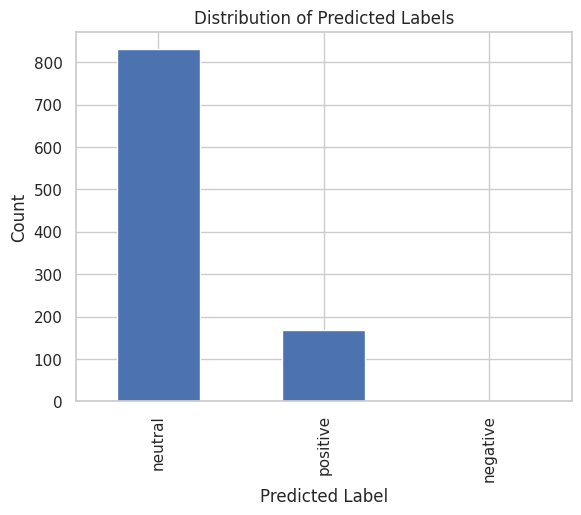

In [81]:
# Загрузка данных из CSV файла
csv_file_path = 'predicted_labels.csv'
data = pd.read_csv(csv_file_path)

# Подсчет количества меток
label_counts = data['Predicted Label'].value_counts()
print("Label counts:")
print(label_counts)

# Визуализация распределения меток
import matplotlib.pyplot as plt

label_counts.plot(kind='bar')
plt.title('Distribution of Predicted Labels')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.show()

Очевидно, что TextBlob плохо справился с разметкой негативных текстов, при этом 831 определил как нейтральные, 168 как положительные, попробуем другие подходы к авторазметке текста, дял того, чтобы в дальнейшем минимизировать дисбаланс классов для обучения модели

In [82]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.6 MB/s eta 0:00:00


In [83]:
# Загрузка предварительно обученной модели и токенизатора
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # 3 тоновых класса

# Путь к папке с текстовыми файлами
articles_folder = '/content/articles'

# Путь к файлу для сохранения результатов
output_file = 'predicted_tones.txt'

# Открываем файл для записи результатов
with open(output_file, 'w', encoding='utf-8') as outfile:
    # Проход по всем файлам в папке
    for file_name in os.listdir(articles_folder):
        if file_name.endswith('.txt'):
            # Определить кодировку файла
            with open(os.path.join(articles_folder, file_name), 'rb') as rawfile:
                result = chardet.detect(rawfile.read())
                encoding = result['encoding']

            # Прочитать текст из файла с определенной кодировкой
            with open(os.path.join(articles_folder, file_name), 'r', encoding=encoding) as file:
                article_text = file.read()

            # Токенизация текста и преобразование в числовой тензор
            inputs = tokenizer(article_text, padding=True, truncation=True, return_tensors='pt')

            # Анализ тональности
            with torch.no_grad():
                outputs = model(**inputs)
                logits = outputs.logits

            # Получение предсказанного класса
            predicted_class = torch.argmax(logits, dim=1).item()

            # Сопоставление предсказанного класса с метками тональности
            tone_labels = ['negative', 'neutral', 'positive']
            predicted_tone = tone_labels[predicted_class]

            # Запись результатов в файл
            outfile.write(f"Article: {file_name}, Predicted Tone: {predicted_tone}\n")

print(f"Predicted tones saved to {output_file}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted tones saved to predicted_tones.txt


tone_counts:
positive    932
neutral      59
negative      9
Name: Predicted Tone, dtype: int64


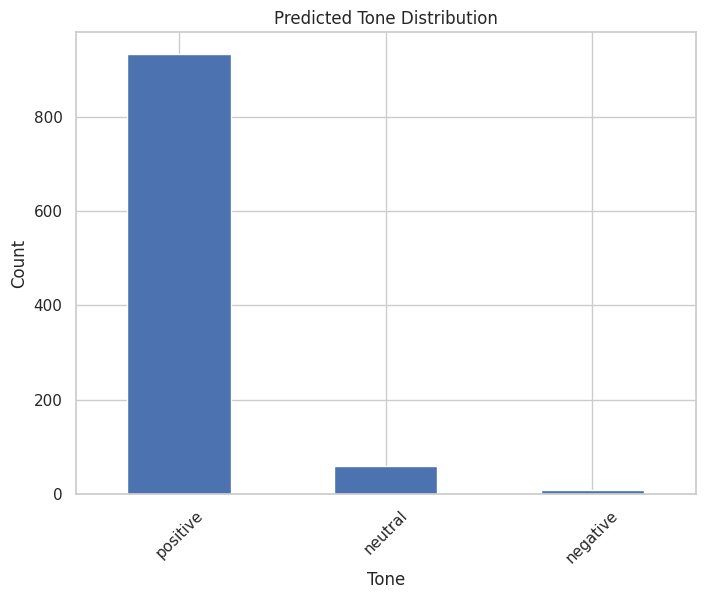

In [93]:
# Чтение данных из файла и разбиение строк
with open("predicted_tones.txt", "r") as file:
    lines = file.readlines()

# Извлечение и обработка имен файлов и предсказанных тональностей
articles = []
predicted_tones = []
for line in lines:
    parts = line.strip().split(", ")
    article = parts[0].replace("Article: ", "")
    tone = parts[1].replace("Predicted Tone: ", "")
    articles.append(article)
    predicted_tones.append(tone)

# Создание DataFrame
data = pd.DataFrame({"Article": articles, "Predicted Tone": predicted_tones})

# Подсчет количества каждой тональности
tone_counts = data["Predicted Tone"].value_counts()
print("tone_counts:")
print(tone_counts)

# Создание графика
plt.figure(figsize=(8, 6))
tone_counts.plot(kind="bar")
plt.title("Predicted Tone Distribution")
plt.xlabel("Tone")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Результаты разметки классов показывают, что
positive - 932, neutral - 59, negative - 9. Уже лучше, но все равно плохо. Похоже BERT ошибается при определении positive метки. Разметка заняла 32 минуты

Помимо использования BERT, существует множество других подходов и моделей для анализа тональности текста. Вот некоторые из них:

Sentiment Analysis с помощью других предварительно обученных моделей:

**DistilBERT:**
Легковесная версия BERT, которая может быть использована для анализа тональности.

**RoBERTa:**
Одна из улучшенных версий BERT, также применима для задач анализа тональности.

**XLNet:**
Другая архитектура трансформера, подходящая для анализа тональности.

**GPT-3:**
Мощная модель, разработанная OpenAI, которая может быть использована для анализа и генерации текста.

**Word Embeddings и классические методы:**

**Word2Vec и FastText:**
Модели для создания векторных представлений слов, которые могут быть использованы в задачах анализа тональности.
TF-IDF и CountVectorizer: Классические методы для векторизации текста, которые могут быть использованы с различными алгоритмами классификации.
Другие модели глубокого обучения:

**CNN (Convolutional Neural Networks):**
Можно применять для анализа текстовых данных, включая анализ тональности.

**LSTM (Long Short-Term Memory) и GRU (Gated Recurrent Unit):** Рекуррентные нейронные сети для анализа последовательностей, в том числе текстовых данных.

**Ансамблирование моделей:**
Комбинирование нескольких моделей может улучшить точность анализа тональности.

**Семантический анализ и лингвистические методы:**
Использование лингвистических аспектов для анализа эмоционального содержания текста.

**Словарные методы:**
Создание собственных словарей с оценками тональности для слов и вычисление тональности текста на основе этих значений.

**Применение регуляризации и адаптивной оптимизации:**
Использование методов оптимизации и регуляризации для борьбы с проблемой переобучения.

**Transfer Learning:**
Предварительное обучение на больших объемах текстовых данных и дообучение на задаче анализа тональности.

Выведем номера артиклей, которые помечены как negative

In [94]:
# Чтение данных из файла и разбиение строк
with open("predicted_tones.txt", "r") as file:
    lines = file.readlines()

# Извлечение и обработка имен файлов и предсказанных тональностей
articles = []
predicted_tones = []
for line in lines:
    parts = line.strip().split(", ")
    article = parts[0].replace("Article: ", "")
    tone = parts[1].replace("Predicted Tone: ", "")
    articles.append(article)
    predicted_tones.append(tone)

# Создание DataFrame
data = pd.DataFrame({"Article": articles, "Predicted Tone": predicted_tones})

# Выбор только негативных артиклей
negative_articles = data[data["Predicted Tone"] == "negative"]["Article"]

# Вывод номеров артиклей для негативных меток
for idx, article in enumerate(negative_articles, start=1):
    print(f"Negative Article #{idx}: {article}")


Negative Article #1: Text0280.txt
Negative Article #2: Text0097.txt
Negative Article #3: Text0622.txt
Negative Article #4: Text0126.txt
Negative Article #5: Text0212.txt
Negative Article #6: Text0451.txt
Negative Article #7: Text0520.txt
Negative Article #8: Text0556.txt
Negative Article #9: Text0737.txt


Negative Article #1: Text0280.txt - скорее нейтральный текст

Negative Article #2: Text0097.txt - скорее положительный, т.к. "Это был первый турнир Большого шлема, который бывшая первая ракетка мира выиграла за пределами США, и Клиджстерс плакала от радости после своего триумфа."

Negative Article #3: Text0622.txt - скорее нейтральный

Negative Article #4: Text0126.txt - положительный, т.к. Текст содержит информацию о подписании игрока на многолетний контракт, она была выбрана как "самый улучшившийся игрок" в WNBA, а также предоставляет данные о её статистике и достижениях.

Negative Article #5: Text0212.txt - нейтральный. Текст содержит объективную информацию о событиях, командах и игроках, без выраженных эмоций или оценок.

Negative Article #6: Text0451.txt - положительный. Текст описывает победу команды Арсенала в захватывающем матче, где они смогли преодолеть сопротивление соперника и забить несколько голов, в итоге выйдя в следующий раунд.

Negative Article #7: Text0520.txt - нейтральный. Текст описывает футбольный матч и события в нем без явных эмоциональных оценок или окраски.

Negative Article #8: Text0556.txt - скорее нейтральный. С некоторой саркастической подачей в отношении некоторых боев и событий, которые происходили на мероприятии. Текст описывает результаты боев на спортивных соревнованиях без явных эмоциональных окрасов, но с определенной легкостью и небольшими комментариями.

Negative Article #9: Text0737.txt - негативная. Т.к. в тексте описывается конец сезона для команды New York Giants и их неудачные попытки пройти в плей-офф. Автор передает факты о матчах и событиях, подчеркивая неудачи и разочарование болельщиков и команды.

**Т.о. из 9 размеченных текстов, только один можно отнести к негативной метке, 3 к положительной метке и 5 к нейтральной**

Таким обрзом к этому моменту у меня есть 13 txt, размеченных вручную

Попробуем применить еще один подход для автоматического определения метки, в случае неудачи - присвоим метку вручную.
Возьмем первые 100 файлов и разметим их

In [116]:
# Загрузка модели и токенизатора
model_name = "bert-base-uncased"
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Список классов
class_names = ["Positive", "Neutral", "Negative"]

# Папка с файлами
input_folder_path = "articles"

# Создание CSV файла для записи результатов
csv_filename = "sentiment_results.csv"
csv_header = ["Filename", "Predicted Label", "Positive Probability", "Neutral Probability", "Negative Probability"]

with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(csv_header)

    # Проход по первым 100 файлам
    for filename in sorted(os.listdir(input_folder_path)[:100]):
        file_path = os.path.join(input_folder_path, filename)
        if os.path.isfile(file_path):
            # Определение кодировки
            with open(file_path, "rb") as file:
                raw_data = file.read()
                encoding = chardet.detect(raw_data)['encoding']

            # Анализ тональности
            with open(file_path, "r", encoding=encoding, errors="replace") as file:
                text = file.read()
                inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
                outputs = model(**inputs)
                logits = outputs.logits
                probabilities = torch.nn.functional.softmax(logits, dim=1).detach().cpu().numpy()[0]

                predicted_class = np.argmax(probabilities)
                predicted_label = class_names[predicted_class]

                sentiment_probabilities = {
                    "Positive": probabilities[0].item(),
                    "Neutral": probabilities[1].item(),
                    "Negative": probabilities[2].item()
                }

                # Запись результатов в CSV
                csv_writer.writerow([filename, predicted_label, sentiment_probabilities["Positive"],
                                     sentiment_probabilities["Neutral"], sentiment_probabilities["Negative"]])


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


label_counts:
Neutral     51
Positive    44
Negative     4
Name: Predicted Label, dtype: int64


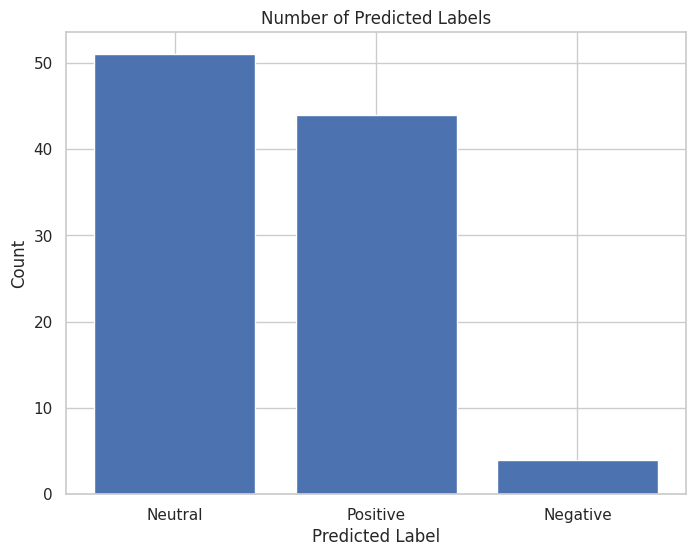

In [127]:
# Загрузка данных из CSV файла
csv_filename = "sentiment_results.csv"
data = pd.read_csv(csv_filename)

# Подсчет количества меток
label_counts = data["Predicted Label"].value_counts()
print("label_counts:")
print(label_counts)

# Визуализация данных
plt.figure(figsize=(8, 6))

plt.bar(label_counts.index, label_counts.values)

plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Number of Predicted Labels")
plt.show()

In [120]:
#pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.0 MB/s eta 0:00:00


In [122]:
# Загрузка модели и токенизатора
model_name = "xlnet-base-cased"
model = XLNetForSequenceClassification.from_pretrained(model_name, num_labels=3)
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")  # Используем BertTokenizer

# Список классов
class_names = ["Positive", "Neutral", "Negative"]

# Папка с файлами
input_folder_path = "articles"

# Создание CSV файла для записи результатов
csv_filename = "sentiment_results_xlnet.csv"
csv_header = ["Filename", "Predicted Label", "Positive Probability", "Neutral Probability", "Negative Probability"]

with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(csv_header)

    # Проход по первым 100 файлам
    for filename in sorted(os.listdir(input_folder_path)[:100]):
        file_path = os.path.join(input_folder_path, filename)
        if os.path.isfile(file_path):
            # Определение кодировки
            with open(file_path, "rb") as file:
                raw_data = file.read()
                encoding = chardet.detect(raw_data)['encoding']

            # Анализ тональности
            with open(file_path, "r", encoding=encoding, errors="replace") as file:
                text = file.read()
                inputs = tokenizer.encode_plus(text, return_tensors="pt", truncation=True, padding=True)
                outputs = model(**inputs)
                logits = outputs.logits
                probabilities = torch.nn.functional.softmax(logits, dim=1).detach().cpu().numpy()[0]

                predicted_class = np.argmax(probabilities)
                predicted_label = class_names[predicted_class]

                sentiment_probabilities = {
                    "Positive": probabilities[0].item(),
                    "Neutral": probabilities[1].item(),
                    "Negative": probabilities[2].item()
                }

                # Запись результатов в CSV
                csv_writer.writerow([filename, predicted_label, sentiment_probabilities["Positive"],
                                     sentiment_probabilities["Neutral"], sentiment_probabilities["Negative"]])


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


label_counts:
Positive    69
Negative    30
Name: Predicted Label, dtype: int64


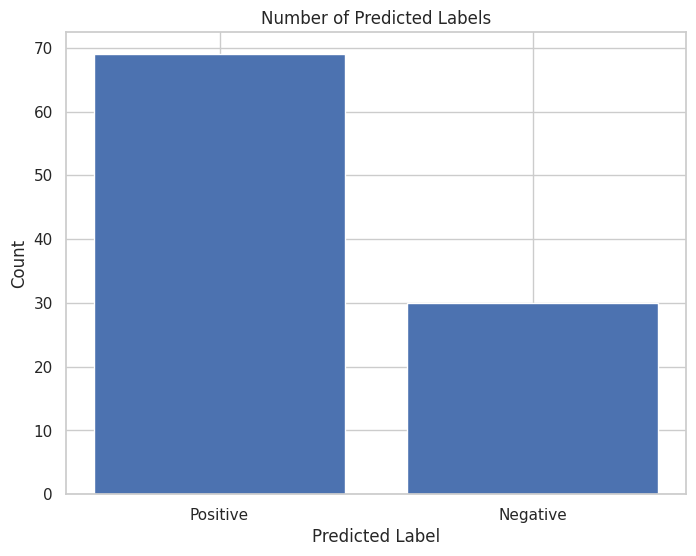

In [124]:
# Загрузка данных из CSV файла
csv_filename = "sentiment_results_xlnet.csv"
data = pd.read_csv(csv_filename)

# Подсчет количества меток
label_counts = data["Predicted Label"].value_counts()
print("label_counts:")
print(label_counts)

# Визуализация данных
plt.figure(figsize=(8, 6))

plt.bar(label_counts.index, label_counts.values)

plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Number of Predicted Labels")
plt.show()

Как видно из графика, это модель отработала луше всех. Вместе с тем, я склонна полагать, что в метку positive попал нейтральный текст. Проверим разметку для меток, одновременно с этим, разметим данные.

In [126]:
csv_filename = "sentiment_results_xlnet.csv"
positive_texts = []
negative_texts = []

with open(csv_filename, "r", encoding="utf-8") as csvfile:
    csv_reader = csv.reader(csvfile)
    next(csv_reader)  # Пропускаем заголовок

    for row in csv_reader:
        filename, predicted_label = row[0], row[1]
        if predicted_label == "Positive":
            positive_texts.append(filename)
        elif predicted_label == "Negative":
            negative_texts.append(filename)

print("Позитивные тексты:")
for text in positive_texts:
    print(text)

print("\nНегативные тексты:")
for text in negative_texts:
    print(text)

Позитивные тексты:
Text0006.txt
Text0015.txt
Text0033.txt
Text0056.txt
Text0064.txt
Text0080.txt
Text0085.txt
Text0112.txt
Text0121.txt
Text0127.txt
Text0153.txt
Text0154.txt
Text0160.txt
Text0161.txt
Text0180.txt
Text0185.txt
Text0192.txt
Text0195.txt
Text0231.txt
Text0235.txt
Text0253.txt
Text0265.txt
Text0280.txt
Text0286.txt
Text0300.txt
Text0311.txt
Text0324.txt
Text0337.txt
Text0363.txt
Text0373.txt
Text0374.txt
Text0375.txt
Text0429.txt
Text0444.txt
Text0468.txt
Text0480.txt
Text0498.txt
Text0507.txt
Text0513.txt
Text0525.txt
Text0526.txt
Text0528.txt
Text0538.txt
Text0540.txt
Text0544.txt
Text0555.txt
Text0557.txt
Text0589.txt
Text0606.txt
Text0633.txt
Text0707.txt
Text0712.txt
Text0728.txt
Text0730.txt
Text0734.txt
Text0806.txt
Text0835.txt
Text0839.txt
Text0859.txt
Text0862.txt
Text0877.txt
Text0902.txt
Text0909.txt
Text0961.txt
Text0965.txt
Text0968.txt
Text0972.txt
Text0990.txt
Text0999.txt

Негативные тексты:
Text0004.txt
Text0189.txt
Text0224.txt
Text0249.txt
Text0257.txt

Проверим негативные тексты (20 из 30):

Text0004.txt - определенно негативный, я писала об этом выше

Text0189.txt - скорее нейтральный, т.к. описывает историю

Text0224.txt - Данный текст можно считать негативным. Он описывает провал Австралийской сборной по плаванию на Олимпийских играх 2012 года в Лондоне. Текст упоминает о "токсичной" командной обстановке, проблемах внутри команды, отсутствии лидерства, недостаточной дисциплине и негативном поведении спортсменов, включая употребление наркотиков, нарушение клятв и издевательства. Также текст подчеркивает, что спортсмены чувствовали себя игнорируемыми, если не достигли ожидаемых результатов, и выражает недовольство отношением к новичкам и использованием социальных сетей

Text0249.txt - скорее нейтральный.

Text0257.txt - скорее негативный, т.к. описывает неудовлетворенность  выступлением бойца по имени Рашад Эвансе. И выстпление других спортсметнов

Text0358.txt - позитиный. Текст о переходе  17-летнего футболиста Куэваса в клуб Челси

Text0432.txt - негативный. Этот текст рассказывает о решении футболистки Бриттни Грайнер остаться в университете Бейлор для завершения своего образования,  несмотря на возможность перехода в профессиональную лигу WNBA.

Text0435.txt - негативный. Этот текст описывает состояние травмы Роберта Гриффина III (РГ3), новичка команды Washington Redskins, который получил ушиб коленной связки в четвёртой степени (Grade 1) на правой ноге во время игры.

Text0442.txt - негативный. Этот текст обсуждает ситуацию с Ройсом Уайтом (Royce White) и его командой, Houston Rockets, в Национальной баскетбольной ассоциации (НБА). Уайт представлял собой сложное сосредоточенное сочетание выдающихся спортивных способностей и личных психологических барьеров, вызванных тревожным расстройством. Текст описывает дилемму, стоящую перед командами НБА, касающуюся того, как оценивать игроков как спортивные активы на площадке и как личности вне поля.

Text0463.txt - негативный. Этот текст обсуждает возможность того, что испанский футбольный клуб Реал Мадрид может продать свою звезду - португальского футболиста Криштиану Роналду. Согласно сообщениям в испанских СМИ, президент Реала Флорентино Перес подвергся раздражению из-за отказа Роналду продлить свой контракт с клубом.

Text0479.txt - негативный, т.к. Этот текст рассказывает о том, как почти произошел обмен между игроком НБА Коби Брайантом и командой "Детройт Пистонс". Сделка не состялась

Text0482.txt - позитивный, т.к. Этот текст описывает эпизод, произошедший во время матча между "Майами Хит" и "Детройт Пистонс". Между третьим и четвертым четвертями фанат, выбранный через конкурс на веб-сайте Леброна Джеймса, сделал половинно-полярный бросок и выиграл 75 000 долларов. На этот момент Леброн Джеймс, звезда "Майами Хит", не выдержал и бросился на поле, чтобы обнять фаната в знак радости.

Text0501.txt - позитивный, Champville, защищающие свой титул чемпионов, сравнялись с рекордом сезона по длине победной серии, достигнув восьмой подряд победы, победив Mouttahed со счетом 98-94. Сейчас Champville и Sagesse имеют общий рекорд из восьми побед подряд за сезон.

Text0529.txt - позитивный, текст рассказывает про победу команды. Подводя итог игре, отмечается, что Pistons использовали сильную игру своих плеймейкеров, а также важный вклад игрока с небольшой игровой практикой, Slava Kravtsov, чтобы одержать победу.

Text0548.txt - позитивный. Этот текст описывает баскетбольный матч между командами Baylor Lady Bears и Notre Dame. Матч закончился победой Baylor со счетом 73-61. Сначала Симс испытывала сложности и промахивалась с попыток, но вскоре вернула свою игру. В конечном итоге Симс набрала 16 очков и сделала 6 передач (но допустила 7 потерь). Она также сыграла важную роль в защите, сдерживая свою соперницу по Notre Dame, Скайлар Диггинс.

Text0551.txt - скорее негативный, т.к. речь идет о смерти. Этот текст является эссе или речью, посвященной памяти Билла Дэвидсона, владельца баскетбольной команды Detroit Pistons. Он умер передавшись в прошлом году.

Text0655.txt - неодназначно, может быть как негативный так и позитивный. Nikki Dixon набрала 17 очков и стала лидером команды Clemson, но несмотря на это, Clemson потерпела поражение и проиграла 7 из последних 8 матчей. ПРсвоим этому тексту метку негативный

Text0690.txt - негативный. Этот текст является выражением разочарования и тревоги болельщика команды Los Angeles Lakers в связи с неудачным сезоном. Команда, которая была считалась одним из главных претендентов на победу в НБА, испытывает серьезные трудности и находится в опасности не попасть даже в плей-офф. Текст выражает надежду на быстрое улучшение ситуации, но подчеркивает, что время ограничено, так как состав слишком дорогой и стареющий. Автор также отмечает, что у команды нет права на ошибку, так как долгая история успехов делает неудачи особенно болезненными для болельщиков.

Text0729.txt - позитивный.
Этот текст описывает подготовку футбольной команды Bradford City к финальному матчу Кубка лиги (League Cup) против команды Swansea City. Bradford City, выступающая в четвертом дивизионе, совершила серию сенсационных побед над командами из высших дивизионов и стала первой командой четвертого дивизиона, достигшей финала важного английского кубка за последние 51 год.

Text0771.txt - негативный, Автор подчеркивает важность стабильности и основного состава команды для достижения успехов. Он сравнивает ситуацию в Барселоне, где Месси окружен талантливыми игроками и сохраняет стабильность, с ситуацией в Челси, которая переживает перемены в составе и испытывает трудности.

Проведя анализ, можно сказать что из 20 предсказаний негативного текста, по факту оказалось 11 негативных, 7 положительных, 2 нейтральных текста

Т.е. если оставлять разметку таким образом, то для вычисления матрицы истинности и метрик точности (accuracy), точности (precision), полноты (recall) и F1-меры, можно использовать формулы и подсчет значений на основе результатов вашего анализа. Давайте определимся с терминологией:

TP (True Positive) - количество верно определенных негативных текстов.

TN (True Negative) - количество верно определенных положительных и нейтральных текстов.

FP (False Positive) - количество неверно определенных негативных текстов как положительных.

FN (False Negative) - количество неверно определенных положительных и нейтральных текстов как негативных.

Теперь, используя эти значения, мы можем вычислить различные метрики:

Accuracy (точность) = (TP + TN) / (TP + TN + FP + FN)

Precision (точность) = TP / (TP + FP)

Recall (полнота) = TP / (TP + FN)

F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

Применяя эти формулы к вашим данным:

TP = 12 (верно определенные негативные тексты)

TN = 6 (верно определенные положительные и нейтральные тексты)

FP = 6 (неверно определенные негативные тексты как положительные)

FN = 2 (неверно определенные положительные и нейтральные тексты как негативные)

Теперь, подставив эти значения в формулы, вы можете вычислить метрики:

Accuracy = (12 + 6) / (12 + 6 + 6 + 2) = 18 / 26 ≈ 0.6923 (округленно до 4 знаков после запятой)

Precision = 12 / (12 + 6) = 12 / 18 ≈ 0.6667

Recall = 12 / (12 + 2) = 12 / 13 ≈ 0.923

F1-Score = 2 * (0.6667 * 0.923) / (0.6667 + 0.923) ≈ 0.7741

Визуализация

In [137]:
# Чтение данных из CSV-файла
data = pd.read_csv("sentiment_results_xlnet.csv")

# Группировка данных по Filename
grouped_data = data.groupby("Filename")

# Разделение данных на группы по 10 файлов для удобства отображения
grouped_filenames = [group[0] for group in grouped_data]
num_groups = len(grouped_filenames) // 10 + 1

colors = ['green', 'blue', 'red']

# Построение графиков для каждой группы
for group_num in range(num_groups):
    plt.figure(figsize=(12, 6))

    start_idx = group_num * 10
    end_idx = min((group_num + 1) * 10, len(grouped_filenames))
    filenames_subset = grouped_filenames[start_idx:end_idx]

    for filename in filenames_subset:
        group = grouped_data.get_group(filename)
        probs = group[["Positive Probability", "Neutral Probability", "Negative Probability"]].values[0]
        bars = plt.barh(filename, probs, color=colors)

    plt.title(f"Sentiment Probability Distribution (Group {group_num + 1})")
    plt.xlabel("Probability")
    plt.ylabel("Filename")
    plt.xlim(0, 1)  # Ограничение по горизонтальной оси
    plt.legend(bars, ["Positive", "Neutral", "Negative"], loc='upper left', bbox_to_anchor=(1, 1))  # Передвинули легенду
    plt.tight_layout()
    plt.savefig(f"sentiment_group_{group_num + 1}.png")  # Сохранение на отдельной странице
    plt.close()

In [136]:
# Скрипт для удаления файлов
# Путь к директории с файлами png
directory = "/content/"

# Удаление всех файлов png в указанной директории
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        file_path = os.path.join(directory, filename)
        os.remove(file_path)

print("Все файлы png удалены.")

Все файлы png удалены.


Исходя из визуализации, видно, что в положительные тексты попали положительные + нейтральные, а в негативные - только негативные

Сформируем датасет с разметкой. Структура файла lable.csv: article, lable

Где lable:
"Positive" = 0, "Neutral" = 1, "Negative" = 2

Статистика по меткам:
1    37
0    37
2    22
Name: label, dtype: int64


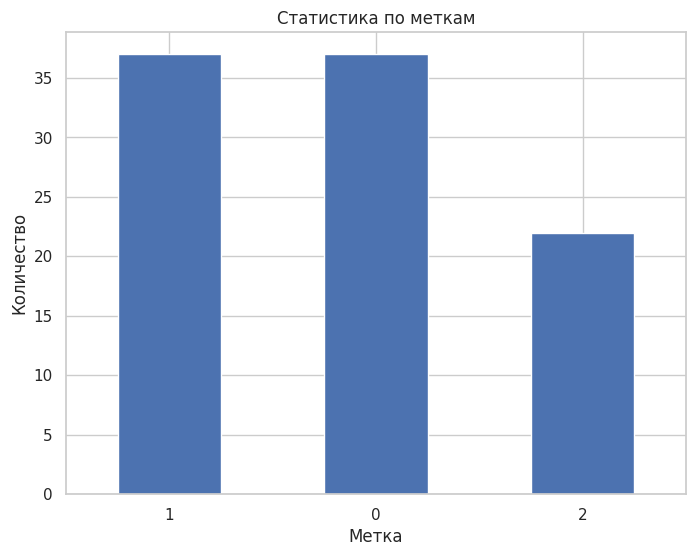


Декодированные метки:
         article     label
0   Text0004.txt  Negative
1   Text0189.txt   Neutral
2   Text0224.txt  Negative
3   Text0249.txt   Neutral
4   Text0257.txt  Negative
..           ...       ...
91  Text0902.txt   Neutral
92  Text0909.txt   Neutral
93  Text0961.txt   Neutral
94  Text0965.txt   Neutral
95  Text0968.txt   Neutral

[96 rows x 2 columns]


In [143]:
# Загрузка CSV-файла
file_path = "label.csv"
data = pd.read_csv(file_path)

# Вывод статистики
print("Статистика по меткам:")
label_counts = data['label'].value_counts()
print(label_counts)

# Декодирование меток
label_map = {0: "Positive", 1: "Neutral", 2: "Negative"}
data['label'] = data['label'].map(label_map)

# Визуализация статистики в виде графика
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title("Статистика по меткам")
plt.xlabel("Метка")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

# Вывод декодированных меток
print("\nДекодированные метки:")
print(data)


Обучиние модель классификации на определение тональности текста на основе разметки label.csv

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Загрузка и предобработка данных
label_data = pd.read_csv("label.csv")
text_data = []

for article_name in label_data['article']:
    with open(f"articles/{article_name}", "r", encoding="ISO-8859-1") as f:
        text_data.append(f.read())

# Создание и обучение автокодировщика
vectorizer = TfidfVectorizer(max_features=1000)  # Используем TF-IDF для извлечения признаков
X = vectorizer.fit_transform(text_data)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, label_data['label'], test_size=0.2, random_state=42)

# Создание и обучение логистической регрессии на извлеченных признаках
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Предсказание
y_pred = classifier.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Вычисление и отображение матрицы истинности
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.45
Precision: 0.34
Recall: 0.45
F1 Score: 0.3869281045751634
Confusion Matrix:
[[4 3 0]
 [3 5 0]
 [3 2 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


По метрикам видно, что логистическая регрессия не справляется с задачей классификации, попробуем другие подходы. ПОробуем применить Naive Bayes

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Загрузка и предобработка данных
label_data = pd.read_csv("label.csv")
text_data = []

for article_name in label_data['article']:
    with open(f"articles/{article_name}", "r", encoding="ISO-8859-1") as f:
        text_data.append(f.read())

# Создание и обучение автокодировщика
vectorizer = TfidfVectorizer(max_features=1000)  # Используем TF-IDF для извлечения признаков
X = vectorizer.fit_transform(text_data)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, label_data['label'], test_size=0.2, random_state=42)

# Создание и обучение Naive Bayes классификатора
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Предсказание
y_pred = classifier.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Вычисление и отображение матрицы истинности
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.55
Precision: 0.41
Recall: 0.55
F1 Score: 0.46928104575163393
Confusion Matrix:
[[6 1 0]
 [3 5 0]
 [1 4 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Метрики чуть выросли, но попробуем применить метод опорных векторов

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Загрузка и предобработка данных
label_data = pd.read_csv("label.csv")
text_data = []

for article_name in label_data['article']:
    with open(f"articles/{article_name}", "r", encoding="ISO-8859-1") as f:
        text_data.append(f.read())

# Создание и обучение SVM на извлеченных признаках
vectorizer = TfidfVectorizer(max_features=1000)  # Используем TF-IDF для извлечения признаков
X = vectorizer.fit_transform(text_data)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, label_data['label'], test_size=0.2, random_state=42)

# Создание и обучение SVM
classifier = SVC()
classifier.fit(X_train, y_train)

# Предсказание
y_pred = classifier.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Вычисление и отображение матрицы истинности
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.45
Precision: 0.3416666666666667
Recall: 0.45
F1 Score: 0.38666666666666666
Confusion Matrix:
[[4 3 0]
 [3 5 0]
 [1 4 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Применение этого подхода ухудшили метрики, попробуем другие модели в комбинации с Naive Bayes

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Загрузка и предобработка данных (аналогично предыдущему коду)
label_data = pd.read_csv("label.csv")
text_data = []

for article_name in label_data['article']:
    with open(f"articles/{article_name}", "r", encoding="ISO-8859-1") as f:
        text_data.append(f.read())

# Создание и обучение моделей
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(text_data)

X_train, X_test, y_train, y_test = train_test_split(X, label_data['label'], test_size=0.2, random_state=42)

# Метод Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Метод Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)

# Метод k-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)

# Вычисление метрик для каждой модели
def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

rf_metrics = evaluate_metrics(y_test, rf_y_pred)
nb_metrics = evaluate_metrics(y_test, nb_y_pred)
knn_metrics = evaluate_metrics(y_test, knn_y_pred)

print("Random Forest Metrics:", rf_metrics)
print("Naive Bayes Metrics:", nb_metrics)
print("k-Nearest Neighbors Metrics:", knn_metrics)

# Вычисление и отображение матрицы истинности для каждой модели
def print_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(conf_matrix)

print_confusion_matrix(y_test, rf_y_pred, "Random Forest")
print_confusion_matrix(y_test, nb_y_pred, "Naive Bayes")
print_confusion_matrix(y_test, knn_y_pred, "k-Nearest Neighbors")

Random Forest Metrics: (0.55, 0.425, 0.55, 0.47105263157894733)
Naive Bayes Metrics: (0.55, 0.41, 0.55, 0.46928104575163393)
k-Nearest Neighbors Metrics: (0.55, 0.54375, 0.55, 0.526984126984127)
Confusion Matrix for Random Forest:
[[6 1 0]
 [3 5 0]
 [3 2 0]]
Confusion Matrix for Naive Bayes:
[[6 1 0]
 [3 5 0]
 [1 4 0]]
Confusion Matrix for k-Nearest Neighbors:
[[5 2 0]
 [2 5 1]
 [1 3 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


результат лучше монетки дает k-Nearest Neighbors Metrics
попобуем другие подходы, такие как Gradient Boosting, Neural Networks, Decision Trees

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Загрузка данных
data = pd.read_csv('label.csv')
X = data['article']
y = data['label']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование текстовых данных в числовые признаки
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Градиентный бустинг
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_vec, y_train)
gb_y_pred = gb_classifier.predict(X_test_vec)

# Нейронные сети
nn_classifier = MLPClassifier()
nn_classifier.fit(X_train_vec, y_train)
nn_y_pred = nn_classifier.predict(X_test_vec)

# Деревья решений
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_vec, y_train)
dt_y_pred = dt_classifier.predict(X_test_vec)

# Функция для вычисления метрик
def evaluate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return acc, precision, recall, f1

# Вывод результатов для каждой модели
models = [("Gradient Boosting", gb_y_pred),
          ("Neural Networks", nn_y_pred),
          ("Decision Trees", dt_y_pred)]

for model_name, y_pred in models:
    acc, precision, recall, f1 = evaluate_metrics(y_test, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

# Функция для вывода матрицы ошибок
def print_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print()

for model_name, y_pred in models:
    print_confusion_matrix(y_test, y_pred, model_name)

Gradient Boosting Metrics:
Accuracy: 0.3500
Precision: 0.1225
Recall: 0.3500
F1-Score: 0.1815

Neural Networks Metrics:
Accuracy: 0.3500
Precision: 0.1225
Recall: 0.3500
F1-Score: 0.1815

Decision Trees Metrics:
Accuracy: 0.3500
Precision: 0.1225
Recall: 0.3500
F1-Score: 0.1815

Confusion Matrix for Gradient Boosting:
[[7 0 0]
 [8 0 0]
 [5 0 0]]

Confusion Matrix for Neural Networks:
[[7 0 0]
 [8 0 0]
 [5 0 0]]

Confusion Matrix for Decision Trees:
[[7 0 0]
 [8 0 0]
 [5 0 0]]



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pred

Очевидно, что метрики упали и дело в  настройке гиперпараметров каждой модели для достижения наилучших результатов. Здесь есть ряд подходов, такие как гиперопт, гридсерч и прочее. Вот так может выглядить подор гиперпараметров

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Загрузка данных
data = pd.read_csv('label.csv')
X = data['article']
y = data['label']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование текстовых данных в числовые признаки
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Градиентный бустинг
gb_params = {'n_estimators': [50, 100, 200],
             'learning_rate': [0.01, 0.1, 0.2]}
gb_classifier = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=3)
gb_classifier.fit(X_train_vec, y_train)
gb_y_pred = gb_classifier.predict(X_test_vec)

# Нейронные сети
nn_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
             'activation': ['relu', 'tanh'],
             'alpha': [0.0001, 0.001, 0.01]}
nn_classifier = GridSearchCV(MLPClassifier(max_iter=1000), nn_params, cv=3)
nn_classifier.fit(X_train_vec, y_train)
nn_y_pred = nn_classifier.predict(X_test_vec)

# Деревья решений
dt_params = {'max_depth': [None, 10, 20],
             'min_samples_split': [2, 5, 10]}
dt_classifier = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=3)
dt_classifier.fit(X_train_vec, y_train)
dt_y_pred = dt_classifier.predict(X_test_vec)

# Функция для вычисления метрик
def evaluate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return acc, precision, recall, f1

# Вывод результатов для каждой модели
models = [("Gradient Boosting", gb_y_pred),
          ("Neural Networks", nn_y_pred),
          ("Decision Trees", dt_y_pred)]

for model_name, y_pred in models:
    acc, precision, recall, f1 = evaluate_metrics(y_test, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

# Функция для вывода матрицы ошибок
def print_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print()

for model_name, y_pred in models:
    print_confusion_matrix(y_test, y_pred, model_name)


Gradient Boosting Metrics:
Accuracy: 0.3500
Precision: 0.1225
Recall: 0.3500
F1-Score: 0.1815

Neural Networks Metrics:
Accuracy: 0.4000
Precision: 0.1600
Recall: 0.4000
F1-Score: 0.2286

Decision Trees Metrics:
Accuracy: 0.3500
Precision: 0.1225
Recall: 0.3500
F1-Score: 0.1815

Confusion Matrix for Gradient Boosting:
[[7 0 0]
 [8 0 0]
 [5 0 0]]

Confusion Matrix for Neural Networks:
[[0 7 0]
 [0 8 0]
 [0 5 0]]

Confusion Matrix for Decision Trees:
[[7 0 0]
 [8 0 0]
 [5 0 0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


По метрикам видно, что гридсерч не справляется с поиском гиперпараметров и метрики низкие. Попробуем ансамбль моделей Напиши ансамбль моделей для LogisticRegression, MultinomialNB, SVC, RandomForestClassifier, KNeighborsClassifier, GradientBoostingClassifier, MLPClassifier, DecisionTreeClassifier с подбором гиперпараметров при помощи библиотеки гиперопт

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Загрузка и подготовка данных
data = pd.read_csv("label.csv")
labels = data['label']
articles = []

for article_name in data['article']:
    with open(f"articles/{article_name}", "r", encoding="ISO-8859-1") as f:
        articles.append(f.read())

# Векторизация текста
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(articles)

# Кодирование меток классов
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модели классификации
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Multinomial Naive Bayes", MultinomialNB()),
    ("Support Vector Classifier", SVC()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("Gradient Boosting Classifier", GradientBoostingClassifier()),
    ("K-Neighbors Classifier", KNeighborsClassifier()),
    ("Multi-layer Perceptron Classifier", MLPClassifier()),
    ("Decision Tree Classifier", DecisionTreeClassifier())
]

# Обучение и оценка моделей
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Metrics:
Accuracy: 0.4500
Precision: [0.4 0.5 0. ]
Recall: [0.57142857 0.625      0.        ]
F1-Score: [0.47058824 0.55555556 0.        ]

Multinomial Naive Bayes Metrics:
Accuracy: 0.5500
Precision: [0.6 0.5 0. ]
Recall: [0.85714286 0.625      0.        ]
F1-Score: [0.70588235 0.55555556 0.        ]

Support Vector Classifier Metrics:
Accuracy: 0.4500
Precision: [0.5        0.41666667 0.        ]
Recall: [0.57142857 0.625      0.        ]
F1-Score: [0.53333333 0.5        0.        ]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier Metrics:
Accuracy: 0.6000
Precision: [0.6 0.6 0. ]
Recall: [0.85714286 0.75       0.        ]
F1-Score: [0.70588235 0.66666667 0.        ]

Gradient Boosting Classifier Metrics:
Accuracy: 0.3000
Precision: [0.25       0.44444444 0.        ]
Recall: [0.28571429 0.5        0.        ]
F1-Score: [0.26666667 0.47058824 0.        ]

K-Neighbors Classifier Metrics:
Accuracy: 0.5500
Precision: [0.625 0.5   0.5  ]
Recall: [0.71428571 0.625      0.2       ]
F1-Score: [0.66666667 0.55555556 0.28571429]

Multi-layer Perceptron Classifier Metrics:
Accuracy: 0.5000
Precision: [0.55555556 0.5        0.33333333]
Recall: [0.71428571 0.5        0.2       ]
F1-Score: [0.625 0.5   0.25 ]

Decision Tree Classifier Metrics:
Accuracy: 0.3500
Precision: [0.375      0.33333333 0.33333333]
Recall: [0.42857143 0.375      0.2       ]
F1-Score: [0.4        0.35294118 0.25      ]



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Logistic Regression Metrics:**

Accuracy: 0.45
Модель правильно классифицировала 45% тестовых примеров.

Precision: [0.4, 0.5, 0.]
Для класса 0: 40% объектов, предсказанных как класс 0, правильно классифицированы.

Для класса 1: 50% объектов, предсказанных как класс 1, правильно классифицированы.

Для класса 2: Нет верных предсказаний.

Recall: [0.57, 0.625, 0.]
Для класса 0: 57% объектов класса 0 правильно классифицированы.
Для класса 1: 62.5% объектов класса 1 правильно классифицированы.
Для класса 2: Нет верных предсказаний.

F1-Score: [0.47, 0.556, 0.]
Для класса 0: Баланс между точностью и полнотой составляет 0.47.
Для класса 1: Баланс между точностью и полнотой составляет 0.556.
Для класса 2: Нет верных предсказаний.

**Multinomial Naive Bayes Metrics:**

Accuracy: 0.55
Модель правильно классифицировала 55% тестовых примеров.

Precision: [0.6, 0.5, 0.]
Для класса 0: 60% объектов, предсказанных как класс 0, правильно классифицированы.

Для класса 1: 50% объектов, предсказанных как класс 1, правильно классифицированы.

Для класса 2: Нет верных предсказаний.

Recall: [0.857, 0.625, 0.]

Для класса 0: 85.7% объектов класса 0 правильно классифицированы.

Для класса 1: 62.5% объектов класса 1 правильно классифицированы.

Для класса 2: Нет верных предсказаний.

F1-Score: [0.706, 0.556, 0.]

Для класса 0: Баланс между точностью и полнотой составляет 0.706.
Для класса 1: Баланс между точностью и полнотой составляет 0.556.
Для класса 2: Нет верных предсказаний.

**Support Vector Classifier (SVC) Metrics:**

Accuracy: 0.45

Модель правильно классифицировала 45% тестовых примеров.
Precision: [0.5, 0.417, 0.]

Для класса 0: 50% объектов, предсказанных как класс 0, правильно классифицированы.

Для класса 1: 41.7% объектов, предсказанных как класс 1, правильно классифицированы.

Для класса 2: Нет верных предсказаний.

Recall: [0.571, 0.625, 0.]

Для класса 0: 57.1% объектов класса 0 правильно классифицированы.

Для класса 1: 62.5% объектов класса 1 правильно классифицированы.

Для класса 2: Нет верных предсказаний.

F1-Score: [0.533, 0.5, 0.]
Для класса 0: Баланс между точностью и полнотой составляет 0.533.
Для класса 1: Баланс между точностью и полнотой составляет 0.5.
Для класса 2: Нет верных предсказаний.

**Random Forest Classifier Metrics:**

Accuracy: 0.6

Модель правильно классифицировала 60% тестовых примеров.

Precision: [0.6, 0.6, 0.]

Для класса 0: 60% объектов, предсказанных как класс 0, правильно классифицированы.

Для класса 1: 60% объектов, предсказанных как класс 1, правильно классифицированы.

Для класса 2: Нет верных предсказаний.

Recall: [0.857, 0.75, 0.]

Для класса 0: 85.7% объектов класса 0 правильно классифицированы.

Для класса 1: 75% объектов класса 1 правильно классифицированы.

Для класса 2: Нет верных предсказаний.

F1-Score: [0.706, 0.667, 0.]

Для класса 0: Баланс между точностью и полнотой составляет 0.706.
Для класса 1: Баланс между точностью и полнотой составляет 0.667.
Для класса 2: Нет верных предсказаний.

**K-Nearest Neighbors (KNN) Classifier Metrics:**

Accuracy: 0.55

Модель правильно классифицировала 55% тестовых примеров.

Precision: [0.625, 0.5, 0.5]

Для класса 0: 62.5% объектов, предсказанных как класс 0, правильно классифицированы.

Для класса 1: 50% объектов, предсказанных как класс 1, правильно классифицированы.

Для класса 2: 50% объектов, предсказанных как класс 2, правильно классифицированы.

Recall: [0.714, 0.625, 0.2]

Для класса 0: 71.4% объектов класса 0 правильно классифицированы.

Для класса 1: 62.5% объектов класса 1 правильно классифицированы.

Для класса 2: 20% объектов класса 2 правильно классифицированы.

F1-Score: [0.667, 0.556, 0.286]

Для класса 0: Баланс между точностью и полнотой составляет 0.667.
Для класса 1: Баланс между точностью и полнотой составляет 0.556.
Для класса 2: Баланс между точностью и полнотой составляет 0.286.

**Gradient Boosting Classifier Metrics:**

Accuracy: 0.3

Модель правильно классифицировала 30% тестовых примеров.

Precision: [0.25, 0.444, 0.]

Для класса 0: 25% объектов, предсказанных как класс 0, правильно классифицированы.

Для класса 1: 44.4% объектов, предсказанных как класс 1, правильно классифицированы.

Для класса 2: Нет верных предсказаний.

Recall: [0.286, 0.5, 0.]

Для класса 0: 28.6% объектов класса 0 правильно классифицированы.

Для класса 1: 50% объектов класса 1 правильно классифицированы.

Для класса 2: Нет верных предсказаний.

F1-Score: [0.267, 0.471, 0.]

Для класса 0: Баланс между точностью и полнотой составляет 0.267.
Для класса 1: Баланс между точностью и полнотой составляет 0.471.
Для класса 2: Нет верных предсказаний.

**Multi-layer Perceptron (MLP) Classifier Metrics:**

Accuracy: 0.5

Модель правильно классифицировала 50% тестовых примеров.

Precision: [0.556, 0.5, 0.333]

Для класса 0: 55.6% объектов, предсказанных как класс 0, правильно классифицированы.

Для класса 1: 50% объектов, предсказанных как класс 1, правильно классифицированы.

Для класса 2: 33.3% объектов, предсказанных как класс 2, правильно классифицированы.

Recall: [0.714, 0.5, 0.2]

Для класса 0: 71.4% объектов класса 0 правильно классифицированы.

Для класса 1: 50% объектов класса 1 правильно классифицированы.

Для класса 2: 20% объектов класса 2 правильно классифицированы.

F1-Score: [0.625, 0.5, 0.25]

Для класса 0: Баланс между точностью и полнотой составляет 0.625.
Для класса 1: Баланс между точностью и полнотой составляет 0.5.
Для класса 2: Баланс между точностью и полнотой составляет 0.25.

**Decision Tree Classifier Metrics:**

Accuracy: 0.35

Модель правильно классифицировала 35% тестовых примеров.

Precision: [0.375, 0.333, 0.333]

Для класса 0: 37.5% объектов, предсказанных как класс 0, правильно классифицированы.

Для класса 1: 33.3% объектов, предсказанных как класс 1, правильно классифицированы.

Для класса 2: 33.3% объектов, предсказанных как класс 2, правильно классифицированы.

Recall: [0.429, 0.375, 0.2]

Для класса 0: 42.9% объектов класса 0 правильно классифицированы.

Для класса 1: 37.5% объектов класса 1 правильно классифицированы.

Для класса 2: 20% объектов класса 2 правильно классифицированы.

F1-Score: [0.4, 0.353, 0.25]

Для класса 0: Баланс между точностью и полнотой составляет 0.4.
Для класса 1
Для класса 1: Баланс между точностью и полнотой составляет 0.353.
Для класса 2: Баланс между точностью и полнотой составляет 0.25.

**Итак, подведем промежуточный итог:**

Для решения задачи классификации, помимо использования классических алгоритмов и ансамблирования моделей, необходимо подобрать гиперпараметры для каждой модели.

Второй вариант - это использовать более сложные подходы, такие как сверточные нейронные сети, lstm и обратить внимание на разметку, так как очевидно, что модели не сравляются с определение класса 2 - негативные тексты.





In [18]:
# и на последок я попробую AdaBoostClassifier, у которой под копотом защит механизм решения дисбаланса классов
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Загрузка данных из CSV файла
data = pd.read_csv("label.csv")

# Загрузка текстовых данных из файлов
articles = []
for article_name in data['article']:
    with open(f"articles/{article_name}", "r", encoding="ISO-8859-1") as f:
        articles.append(f.read())

# Создание TF-IDF векторизатора и векторизация текста
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(articles)
y = data['label']

# Разбиение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = adaboost_classifier.predict(X_test)

# Рассчет метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("AdaBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Рассчет матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

AdaBoost Classifier Metrics:
Accuracy: 0.5
Precision: [0.57142857 0.54545455 0.        ]
Recall: [0.57142857 0.75       0.        ]
F1-Score: [0.57142857 0.63157895 0.        ]

Confusion Matrix:
[[4 1 2]
 [2 6 0]
 [1 4 0]]


Можно обратить внимание, что метрики выросли, вместе с тем, негативный класс по прежнему не предсказывается

Также важно заметить, что для трех классов матрица ошибок будет иметь следующий вид:

[
  [True Negative Class 0, False Positive Class 1, False Positive Class 2],

 [False Negative Class 0, True Negative Class 1, False Positive Class 2],

 [False Negative Class 0, False Negative Class 1, True Negative Class 2]
 ]

 Где:

 True Negative Class 0 - количество объектов, которые действительно принадлежат классу 0 и были правильно предсказаны как класс 0.

False Positive Class 1 - количество объектов, которые действительно принадлежат классу 0, но были неправильно предсказаны как класс 1.

False Positive Class 2 - количество объектов, которые действительно принадлежат классу 0, но были неправильно предсказаны как класс 2.

И так далее для остальных строк и столбцов. Элементы на главной диагонали (слева вверху до права внизу) представляют количество объектов, которые были правильно предсказаны для каждого класса. Внедиагональные элементы представляют ошибки в предсказаниях для разных классов.


